In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.ticker as mtick
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import statsmodels.formula.api as smf

In [2]:
print()

In [3]:
df = pd.read_excel('interviewexercisebriefrisqi/modelling_exercise_raw_data.xlsx')
df.head()

monthyear   business_level    category    brand           variable  \
0 2017-01-01  Business Unit 1  Category 1  Brand 1      Spend on meta   
1 2017-01-01  Business Unit 1  Category 1  Brand 1    Spend on tiktok   
2 2017-01-01  Business Unit 1  Category 1  Brand 1  Spend on ucontent   
3 2017-01-01  Business Unit 1  Category 1  Brand 1        Spend on tv   
4 2017-01-01  Business Unit 1  Category 1  Brand 1   Spend on youtube   

         Amount  
0  1.226851e+09  
1           NaN  
2           NaN  
3  1.342417e+09  
4           NaN

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45744 entries, 0 to 45743
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   monthyear       45744 non-null  datetime64[ns]
 1   business_level  45744 non-null  object        
 2   category        45744 non-null  object        
 3   brand           45744 non-null  object        
 4   variable        45744 non-null  object        
 5   Amount          21313 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 2.1+ MB


<Axes: xlabel='category'>

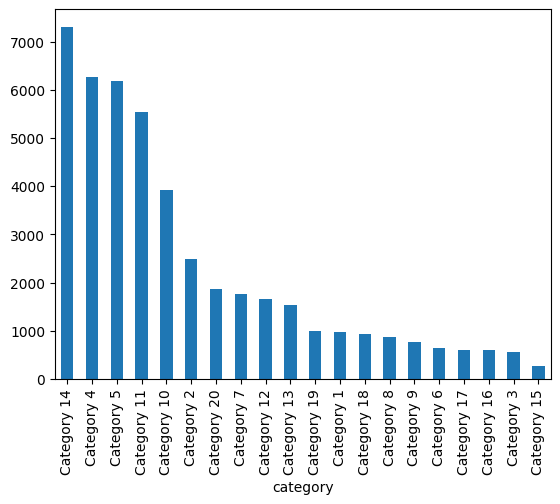

In [5]:
df['category'].value_counts().plot(kind='bar')

<Axes: xlabel='business_level'>

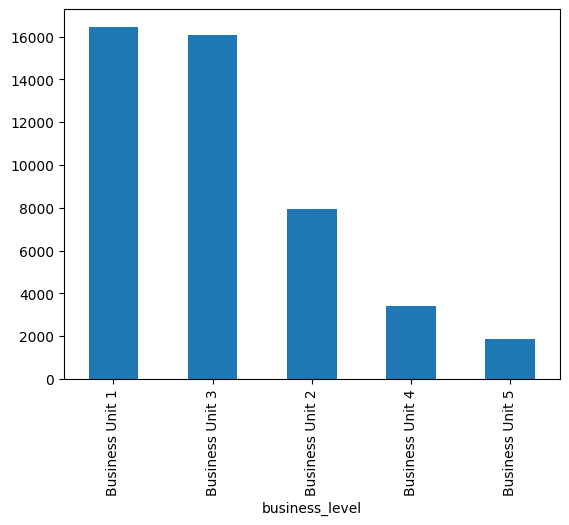

In [6]:
df['business_level'].value_counts().plot(kind='bar')

<Axes: xlabel='variable'>

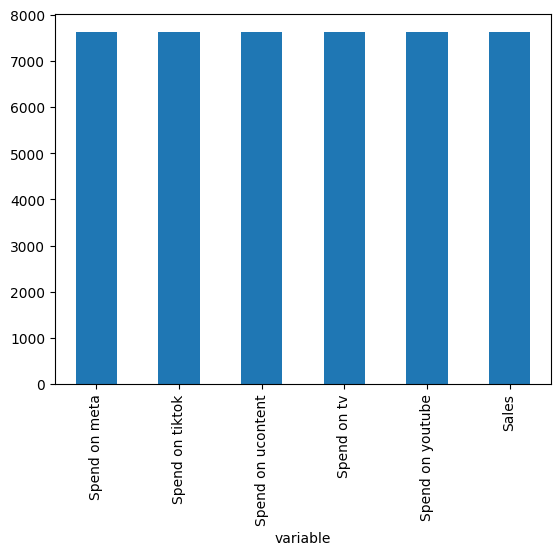

In [7]:
df['variable'].value_counts().plot(kind='bar')

In [8]:
df['variable'].value_counts()

variable
Spend on meta        7624
Spend on tiktok      7624
Spend on ucontent    7624
Spend on tv          7624
Spend on youtube     7624
Sales                7624
Name: count, dtype: int64

# Preprocessing

## Datetime Conversion

In [9]:
df['monthyear'] = pd.to_datetime(df['monthyear'])

## Duplicate Row Checks

In [10]:
df.duplicated(subset=['monthyear', 'business_level', 'category', 'brand', 'variable']).sum()

np.int64(18540)

In [11]:
subset_cols = ['monthyear', 'business_level', 'category', 'brand', 'variable']

duplicate_mask = df.duplicated(subset=subset_cols, keep=False)

In [12]:
df[(duplicate_mask)].sort_values(by=subset_cols)

monthyear   business_level     category     brand          variable  \
10576 2020-01-01  Business Unit 1   Category 5  Brand 16             Sales   
10577 2020-01-01  Business Unit 1   Category 5  Brand 16             Sales   
10566 2020-01-01  Business Unit 1   Category 5  Brand 16     Spend on meta   
10567 2020-01-01  Business Unit 1   Category 5  Brand 16     Spend on meta   
10568 2020-01-01  Business Unit 1   Category 5  Brand 16   Spend on tiktok   
...          ...              ...          ...       ...               ...   
39310 2025-05-01  Business Unit 3  Category 14  Brand 58  Spend on youtube   
39311 2025-05-01  Business Unit 3  Category 14  Brand 58  Spend on youtube   
39312 2025-05-01  Business Unit 3  Category 14  Brand 58  Spend on youtube   
39313 2025-05-01  Business Unit 3  Category 14  Brand 58  Spend on youtube   
39314 2025-05-01  Business Unit 3  Category 14  Brand 58  Spend on youtube   

             Amount  
10576  0.000000e+00  
10577  0.000000e+00  
10566           NaN  
10567           NaN  
10568  7.253130e+08  
...             ...  
39310           NaN  
39311           NaN  
39312           NaN  
39313           NaN  
39314           NaN  

[20388 rows x 6 columns]

In [13]:
# drop duplicates

df_non_dup = df.drop_duplicates()

In [14]:
df_non_dup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27204 entries, 0 to 45743
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   monthyear       27204 non-null  datetime64[ns]
 1   business_level  27204 non-null  object        
 2   category        27204 non-null  object        
 3   brand           27204 non-null  object        
 4   variable        27204 non-null  object        
 5   Amount          15133 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 1.5+ MB


In [15]:
df_non_dup.duplicated(subset=['monthyear', 'business_level', 'category', 'brand', 'variable']).sum()

np.int64(0)

<Axes: xlabel='category'>

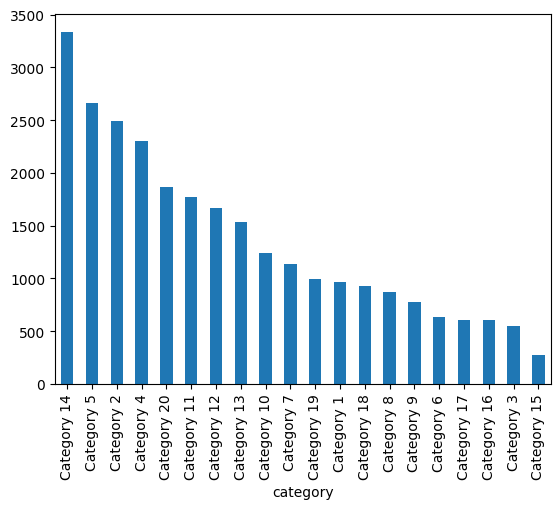

In [16]:
df_non_dup['category'].value_counts().plot(kind='bar')

<Axes: xlabel='brand'>

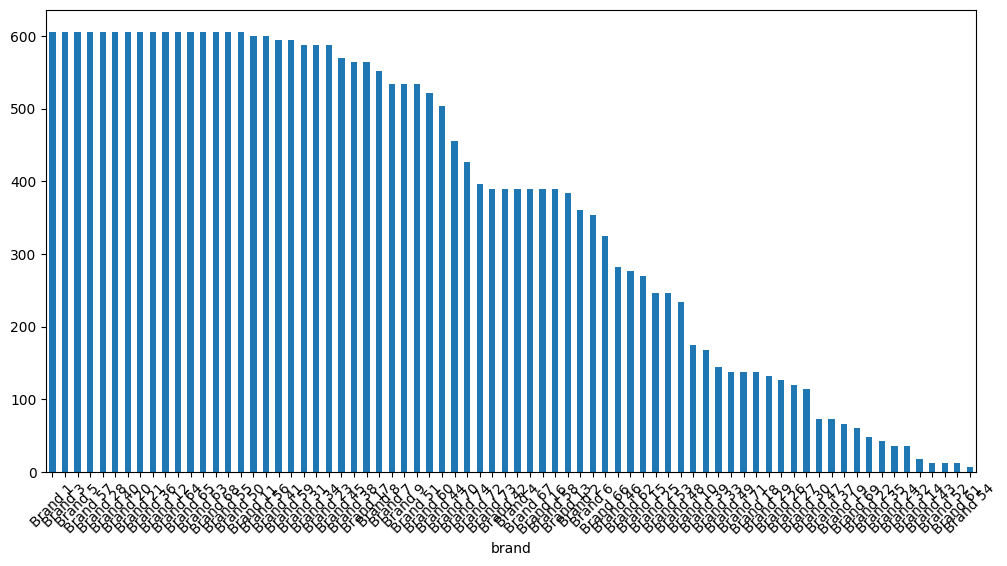

In [17]:
df_non_dup['brand'].value_counts().plot(kind='bar',rot=45, figsize=(12,6))

# Engineering
## filling

In [18]:
df['Amount_nonnull'] = df['Amount'].fillna(0)

# Analysis
## Spend Analysis: Analyze media spending patterns over the time period covered in the dataset.


In [19]:
df_non_dup['Quarter'] = df_non_dup['monthyear'].dt.to_period('Q').astype(str)
spend_df = df_non_dup[df_non_dup['variable'].str.startswith('Spend')]

spend_df['Channel'] = spend_df['variable'].str.replace('Spend on ', '').str.title()

quarterly_spend = spend_df.groupby(['brand', 'Quarter', 'Channel'])['Amount'].sum().reset_index()

C:\Users\Dell\AppData\Local\Temp\ipykernel_17680\3746539127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_dup['Quarter'] = df_non_dup['monthyear'].dt.to_period('Q').astype(str)
C:\Users\Dell\AppData\Local\Temp\ipykernel_17680\3746539127.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spend_df['Channel'] = spend_df['variable'].str.replace('Spend on ', '').str.title()


In [20]:
spend_df = df_non_dup[df_non_dup['variable'].str.startswith('Spend')]

spend_df['Channel'] = spend_df['variable'].str.replace('Spend on ', '').str.title()
spend_df.groupby(['brand'])['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False).head(10)

C:\Users\Dell\AppData\Local\Temp\ipykernel_17680\1408640574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spend_df['Channel'] = spend_df['variable'].str.replace('Spend on ', '').str.title()


brand        Amount
50  Brand 55  2.833078e+12
52  Brand 57  2.788202e+12
59  Brand 63  2.248626e+12
60  Brand 64  2.226767e+12
73   Brand 9  2.112347e+12
54  Brand 59  1.982042e+12
12  Brand 20  1.914719e+12
44   Brand 5  1.838864e+12
20  Brand 28  1.488376e+12
34  Brand 40  1.371512e+12

In [21]:
chart_data = quarterly_spend.pivot_table(index='Quarter', columns='Channel', values='Amount', aggfunc='sum')

chart_data_100 = chart_data.div(chart_data.sum(axis=1), axis=0) * 100

heatmap_data = quarterly_spend.pivot_table(index='Channel', columns='Quarter', values='Amount', aggfunc='sum')

In [22]:
plot_area_data = chart_data / 1_000_000_000_000
plot_heat_data = heatmap_data / 1_000_000_000_000

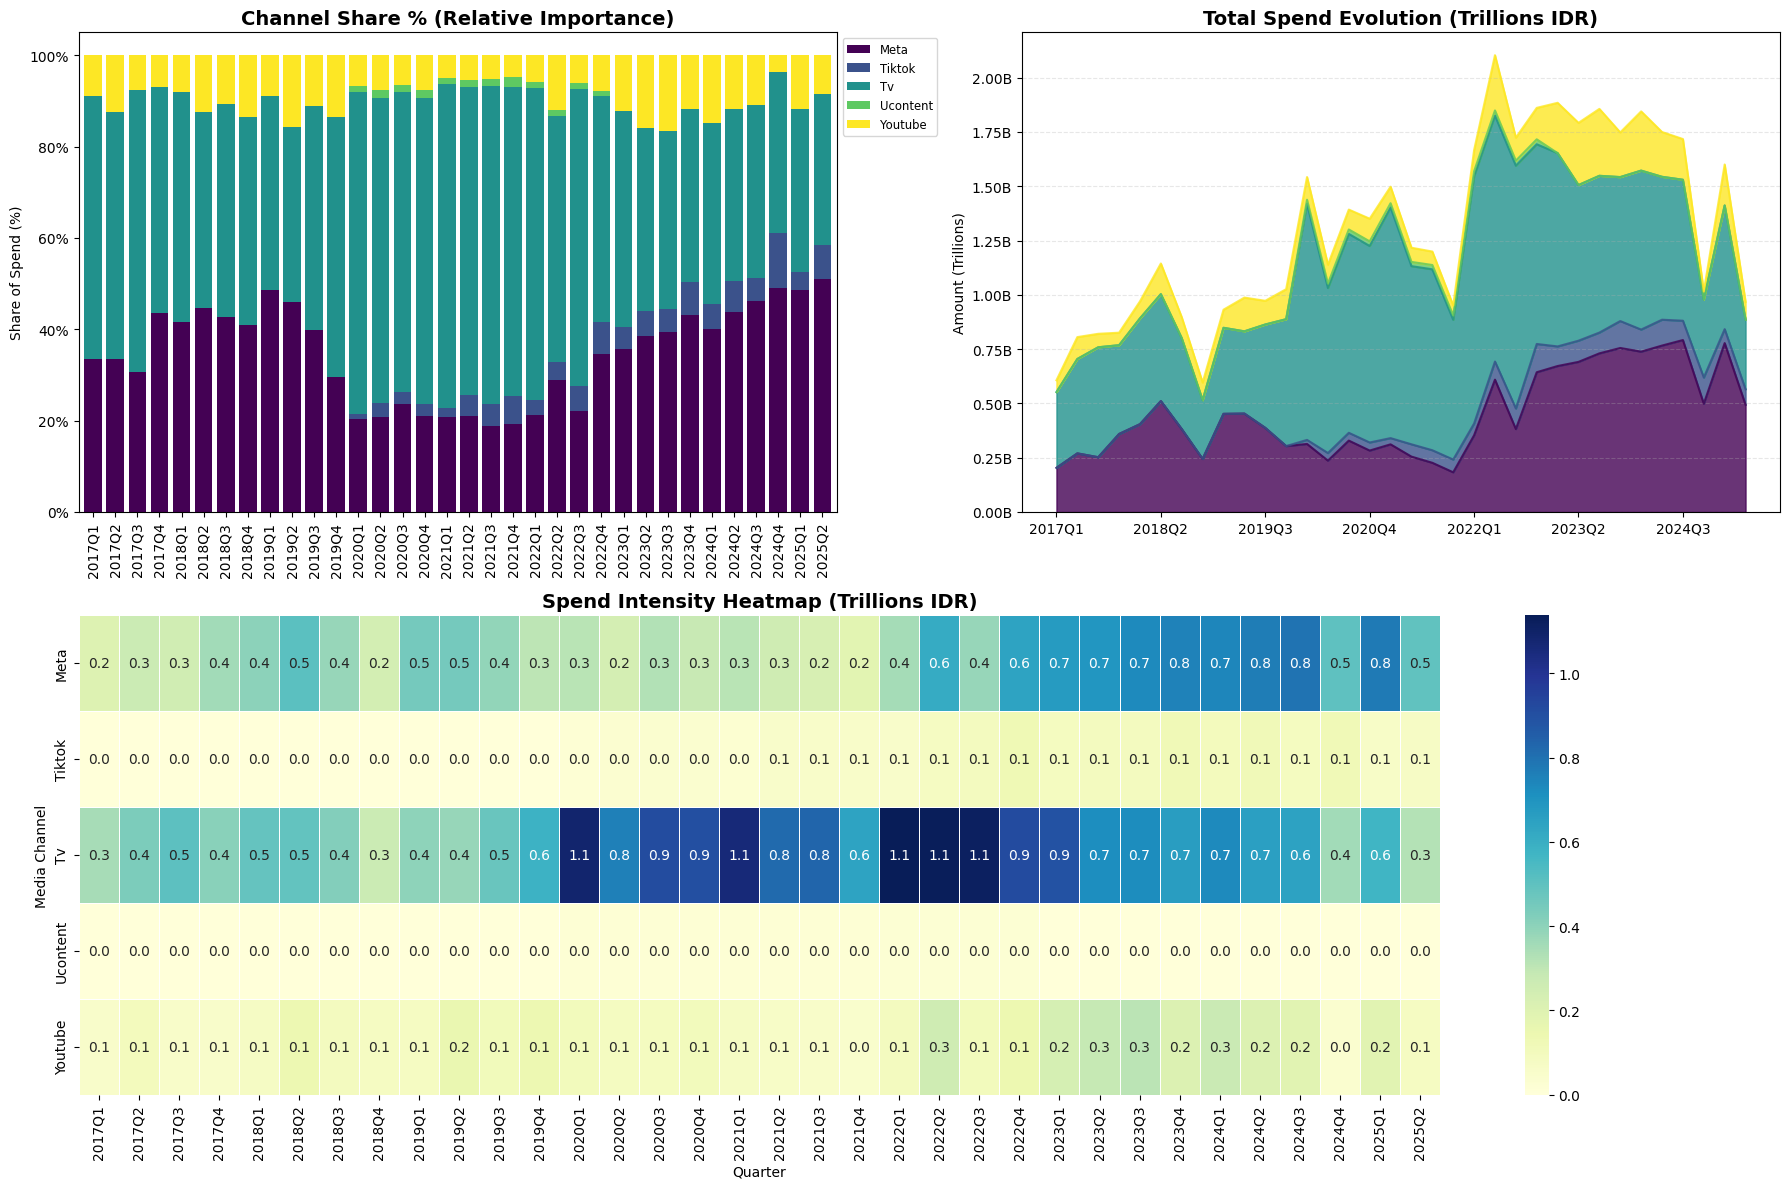

In [23]:
fig = plt.figure(figsize=(18, 12))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1]) 

ax1 = plt.subplot(gs[0, 0])
chart_data_100.plot(kind='bar', stacked=True, ax=ax1, colormap='viridis', width=0.8)
ax1.set_title('Channel Share % (Relative Importance)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Share of Spend (%)')
ax1.set_xlabel('')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize='small')

ax2 = plt.subplot(gs[0, 1])
plot_area_data.plot(kind='area', stacked=True, ax=ax2, colormap='viridis', alpha=0.8)
ax2.set_title('Total Spend Evolution (Trillions IDR)', fontsize=14, fontweight='bold')
ax2.set_xlabel('')
ax2.set_ylabel('Amount (Trillions)')
ax2.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'{x:,.2f}B'))
ax2.legend().set_visible(False)
ax2.grid(axis='y', linestyle='--', alpha=0.3)

ax3 = plt.subplot(gs[1, :]) 
sns.heatmap(plot_heat_data, annot=True, cmap='YlGnBu', ax=ax3, linewidths=.5, fmt='.1f')
ax3.set_title('Spend Intensity Heatmap (Trillions IDR)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Quarter')
ax3.set_ylabel('Media Channel')

plt.tight_layout()
plt.show()

### Per Brand Analysis

<Axes: title={'center': 'Number of Unique Categories per Business Level'}, xlabel='business_level'>

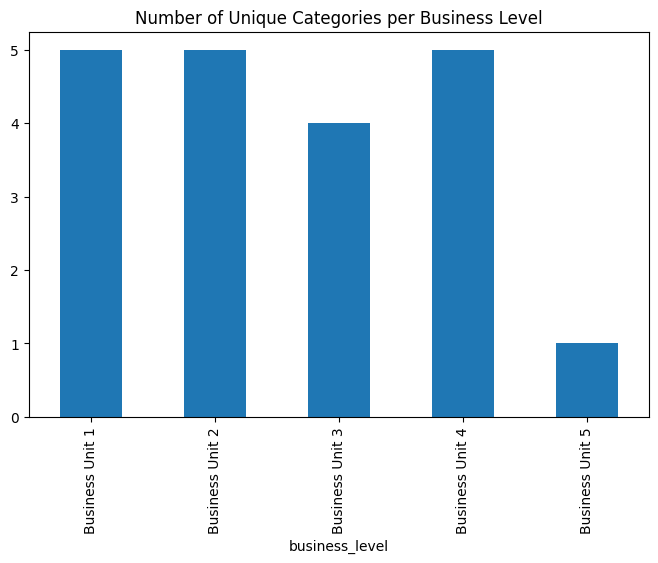

In [24]:
# number of category per bu
num_categories_per_bu = spend_df.groupby('business_level')['category'].nunique()
num_categories_per_bu.plot(kind='bar', figsize=(8,5), title='Number of Unique Categories per Business Level')

<Axes: title={'center': 'Number of Unique Brands per Business Level'}, xlabel='business_level'>

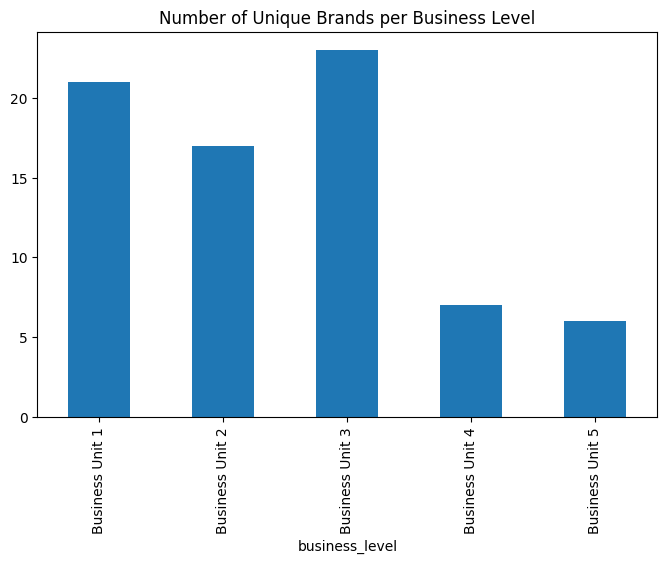

In [25]:
# number of brand per bu
num_brands_per_bu = spend_df.groupby('business_level')['brand'].nunique()
num_brands_per_bu.plot(kind='bar', figsize=(8,5), title='Number of Unique Brands per Business Level')

<Axes: title={'center': 'Number of Unique Brands per Category'}, xlabel='category'>

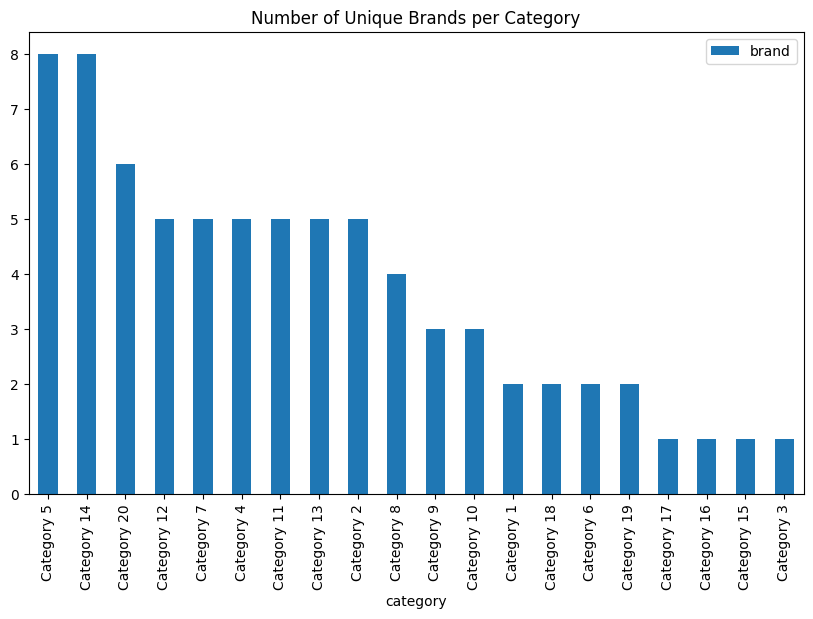

In [26]:
# brand per category 
brand_per_category = spend_df.groupby('category').agg({'brand':'nunique'}).sort_values(by='brand', ascending=False)
brand_per_category.plot(kind='bar', figsize=(10,6), title='Number of Unique Brands per Category')

<Axes: xlabel='business_level'>

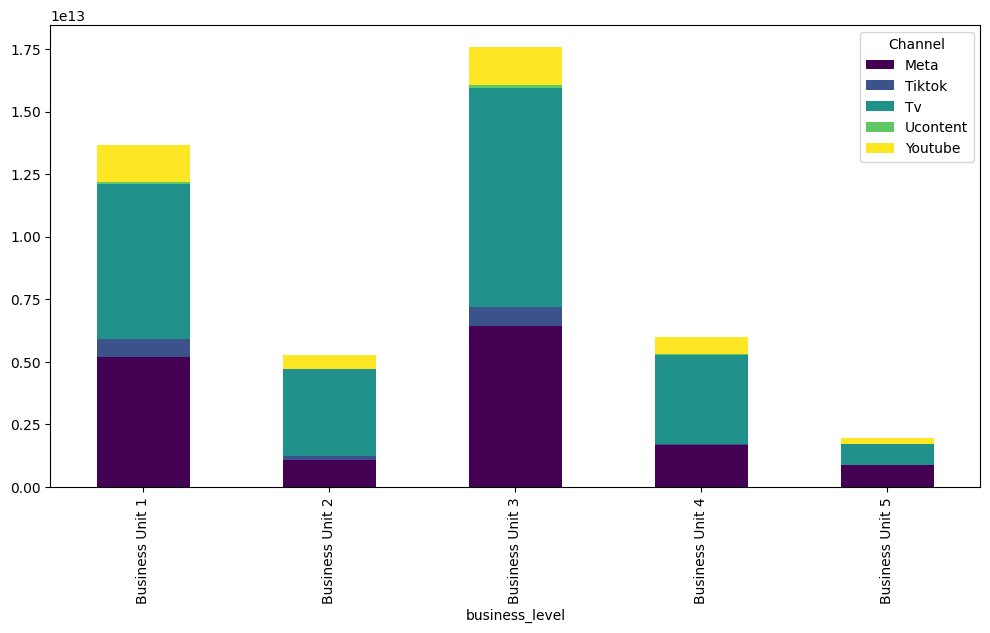

In [27]:
#  bar chart spending per business level
business_level_spend = spend_df.groupby(['business_level', 'Channel'])['Amount'].sum().reset_index()
business_level_chart = business_level_spend.pivot_table(index='business_level', columns='Channel', values='Amount', aggfunc='sum')
business_level_chart.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))

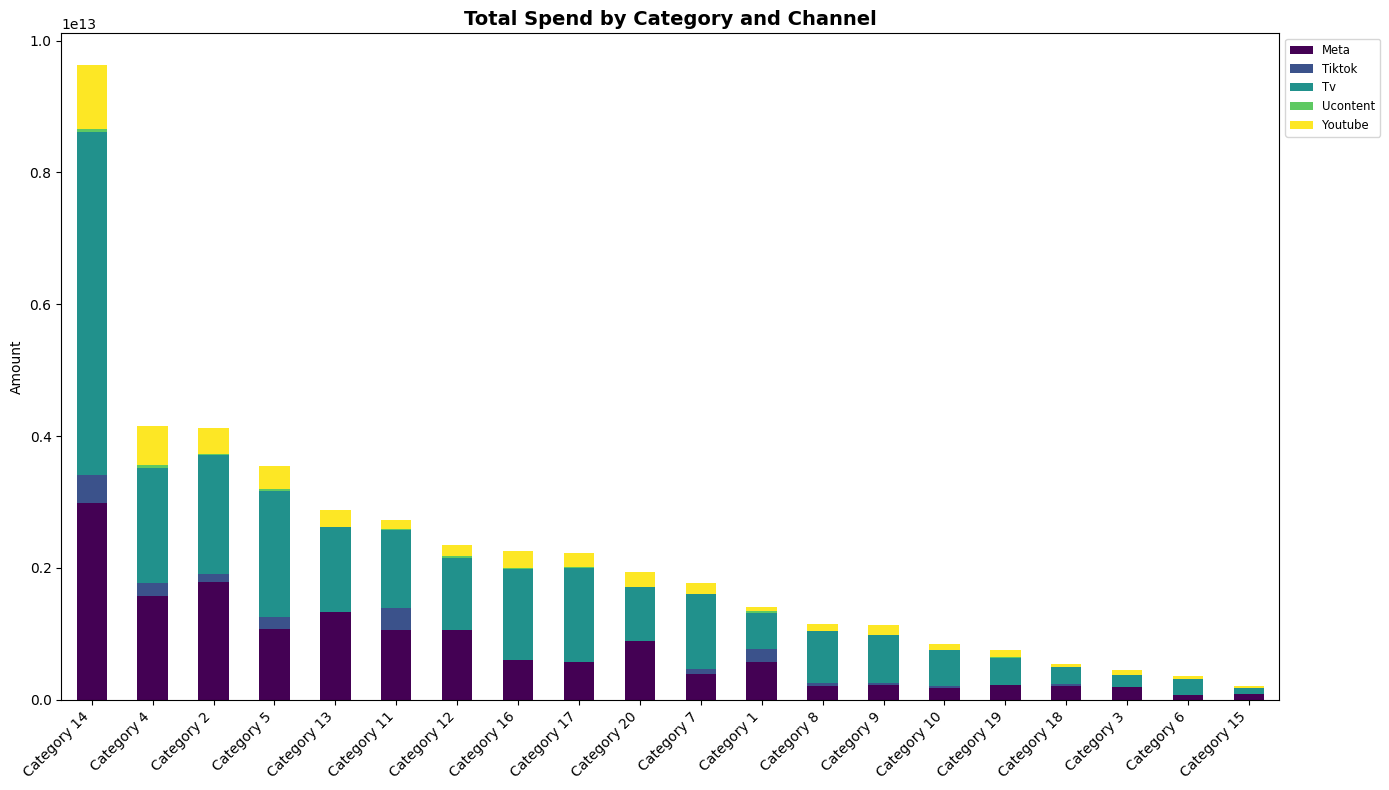

In [28]:
category_spend = spend_df.groupby(['category', 'Channel'])['Amount'].sum().reset_index()
category_chart = category_spend.pivot_table(index='category', columns='Channel', values='Amount', aggfunc='sum').fillna(0)

category_chart = category_chart.loc[category_chart.sum(axis=1).sort_values(ascending=False).index]

ax = category_chart.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 8))
ax.set_title('Total Spend by Category and Channel', fontsize=14, fontweight='bold')
ax.set_ylabel('Amount')
ax.set_xlabel('')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [29]:
# top spender brands
top_sp = spend_df.groupby(['business_level','category','brand'])['Amount'].sum().sort_values(ascending=False) / 1_000_000_000_000
top_sp.head(5)

business_level   category     brand   
Business Unit 3  Category 14  Brand 55    2.833078
                              Brand 57    2.788202
Business Unit 4  Category 16  Brand 63    2.248626
                 Category 17  Brand 64    2.226767
Business Unit 1  Category 4   Brand 9     2.112347
Name: Amount, dtype: float64

In [30]:
spend_df.groupby(['business_level', 'category'])['Amount'].sum().sort_values(ascending=False).head(10)

business_level   category   
Business Unit 3  Category 14    9.628140e+12
Business Unit 1  Category 4     4.146269e+12
                 Category 2     4.125529e+12
                 Category 5     3.540642e+12
Business Unit 3  Category 13    2.878546e+12
                 Category 11    2.731702e+12
                 Category 12    2.346428e+12
Business Unit 4  Category 16    2.248626e+12
                 Category 17    2.226767e+12
Business Unit 5  Category 20    1.934897e+12
Name: Amount, dtype: float64

In [31]:
def spending_chart_generator(brand_name):
    print(f"Generating charts for: {brand_name}...")
    brand_df = spend_df[spend_df['brand'] == brand_name]
    
    chart_data_billions = brand_df.pivot_table(index='Quarter', columns='Channel', values='Amount', aggfunc='sum').fillna(0)/1000_000_000
    row_sums = chart_data_billions.sum(axis=1)
    chart_data_pct = chart_data_billions.div(row_sums.replace(0, np.nan), axis=0) * 100
    

    heatmap_data_billions = brand_df.pivot_table(index='Channel', columns='Quarter', values='Amount', aggfunc='sum').fillna(0)/1000_000_000
    

    fig = plt.figure(figsize=(18, 12))
    fig.suptitle(f'Media Spend Dashboard: {brand_name}', fontsize=20, fontweight='bold', y=1.02)
    
    gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])

    ax1 = plt.subplot(gs[0, 0])
    chart_data_pct.plot(kind='bar', stacked=True, ax=ax1, colormap='viridis', width=0.8)
    ax1.set_title('Channel Share % (Strategy Mix)', fontsize=14, fontweight='bold')
    ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax1.set_xlabel('')
    ax1.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
    ax1.grid(axis='y', linestyle='--', alpha=0.3)

    ax2 = plt.subplot(gs[0, 1])
    chart_data_billions.plot(kind='area', stacked=True, ax=ax2, colormap='viridis', alpha=0.8)
    ax2.set_title('Total Spend Evolution (Volume)', fontsize=14, fontweight='bold')
    ax2.set_xlabel('')
    ax2.set_ylabel('Amount (B IDR)')
    ax2.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'{x:,.0f}'))
    ax2.legend().set_visible(False)
    ax2.grid(axis='y', linestyle='--', alpha=0.3)
    
    ax3 = plt.subplot(gs[1, :])
    sns.heatmap(heatmap_data_billions, cmap='YlGnBu', ax=ax3, linewidths=.5, annot=True, fmt=',.0f')
        
    ax3.set_title('Spend Intensity Heatmap', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Quarter')
    ax3.set_ylabel('Media Channel')
    
    plt.tight_layout()
    plt.show()
    print("-" * 80)

Generating charts for: Brand 55...


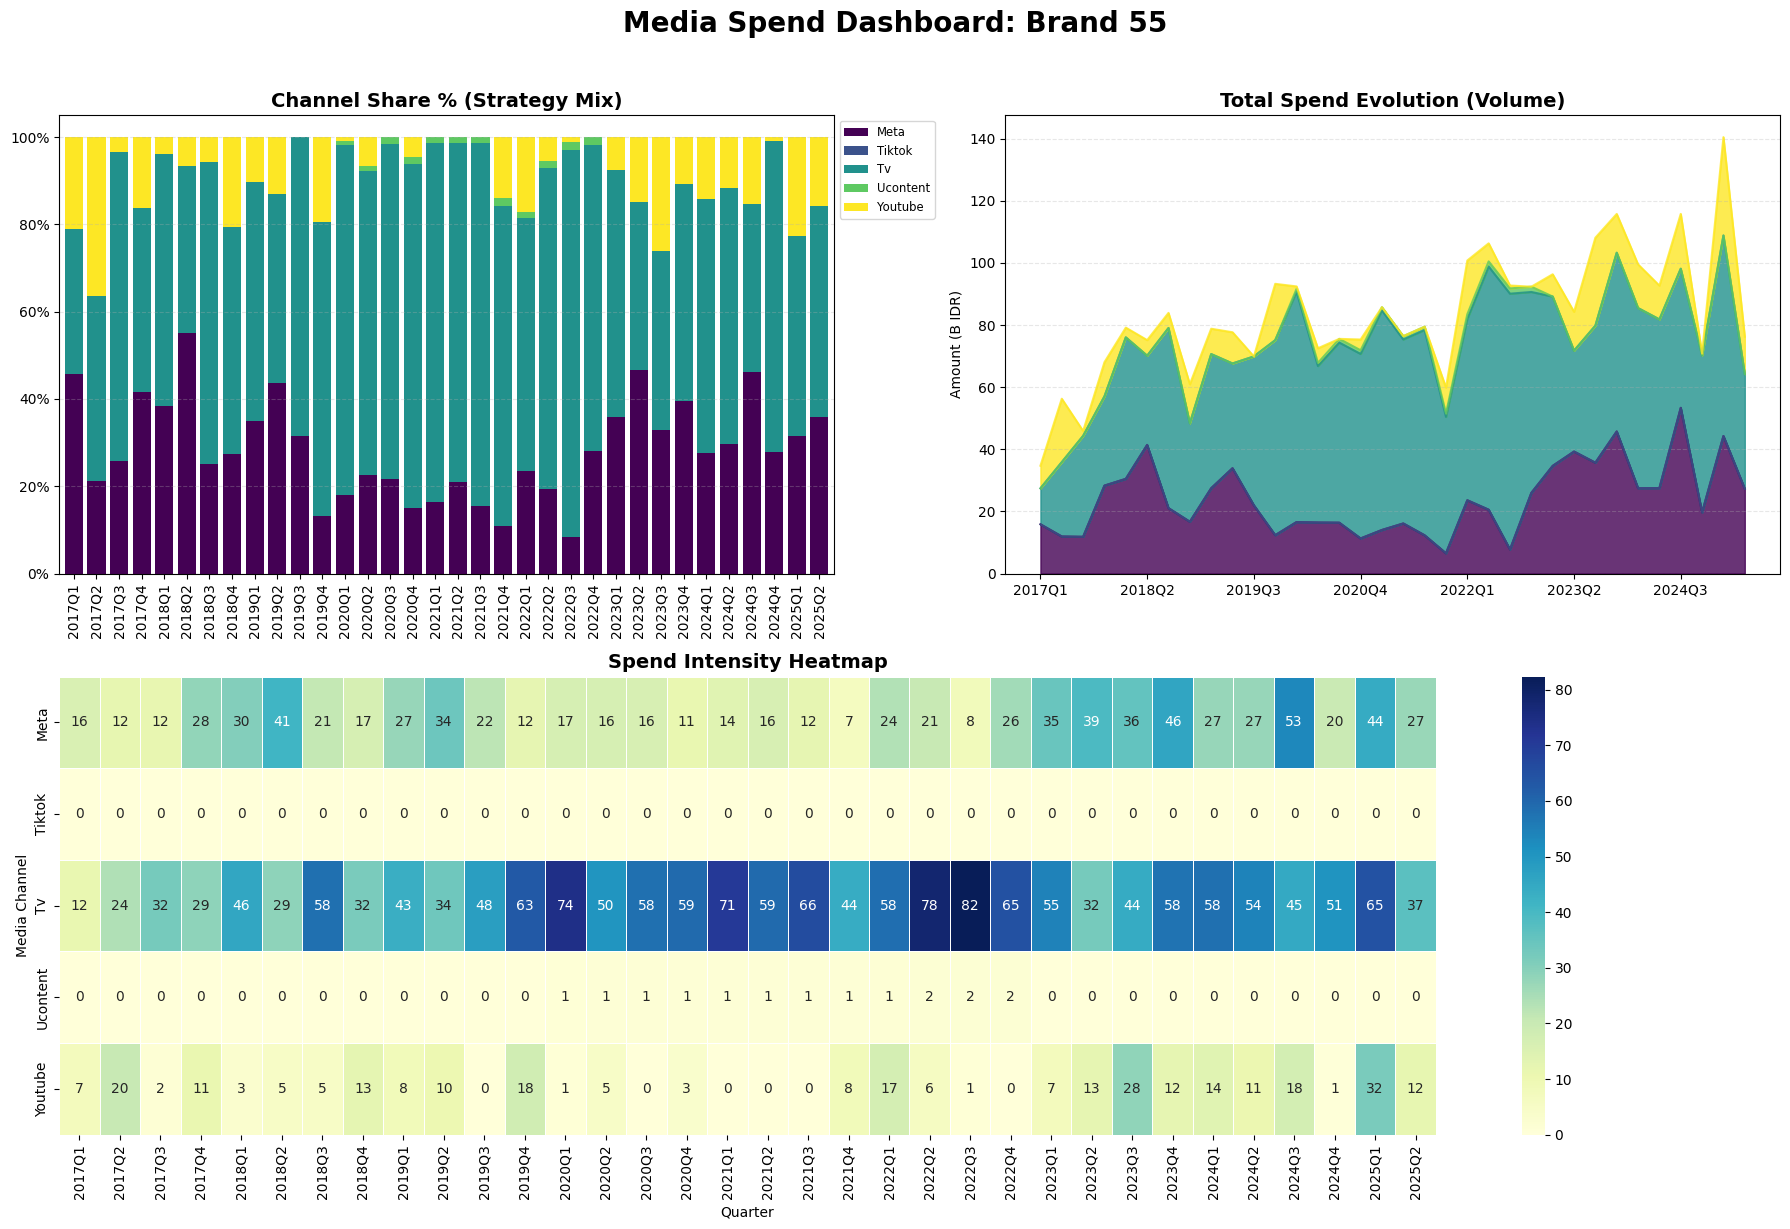

--------------------------------------------------------------------------------
Generating charts for: Brand 57...


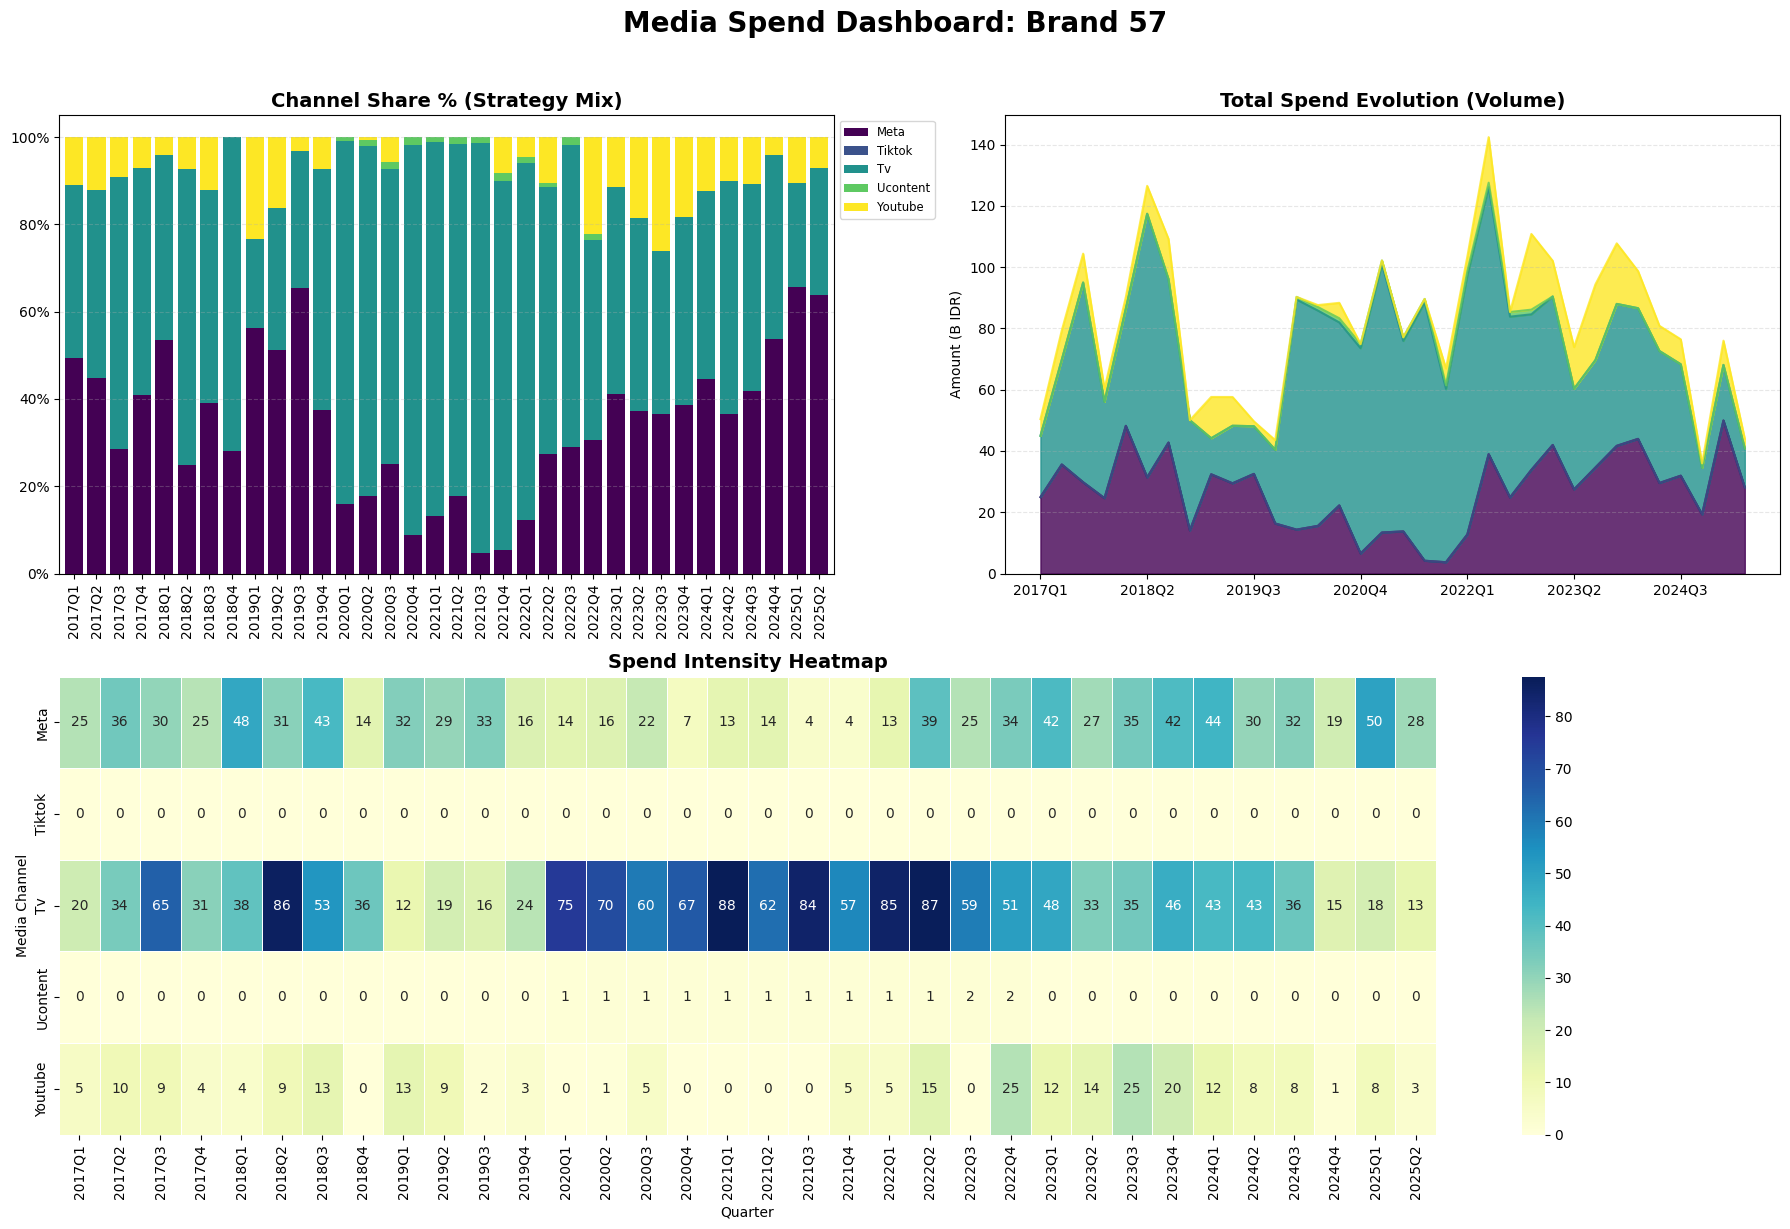

--------------------------------------------------------------------------------
Generating charts for: Brand 63...


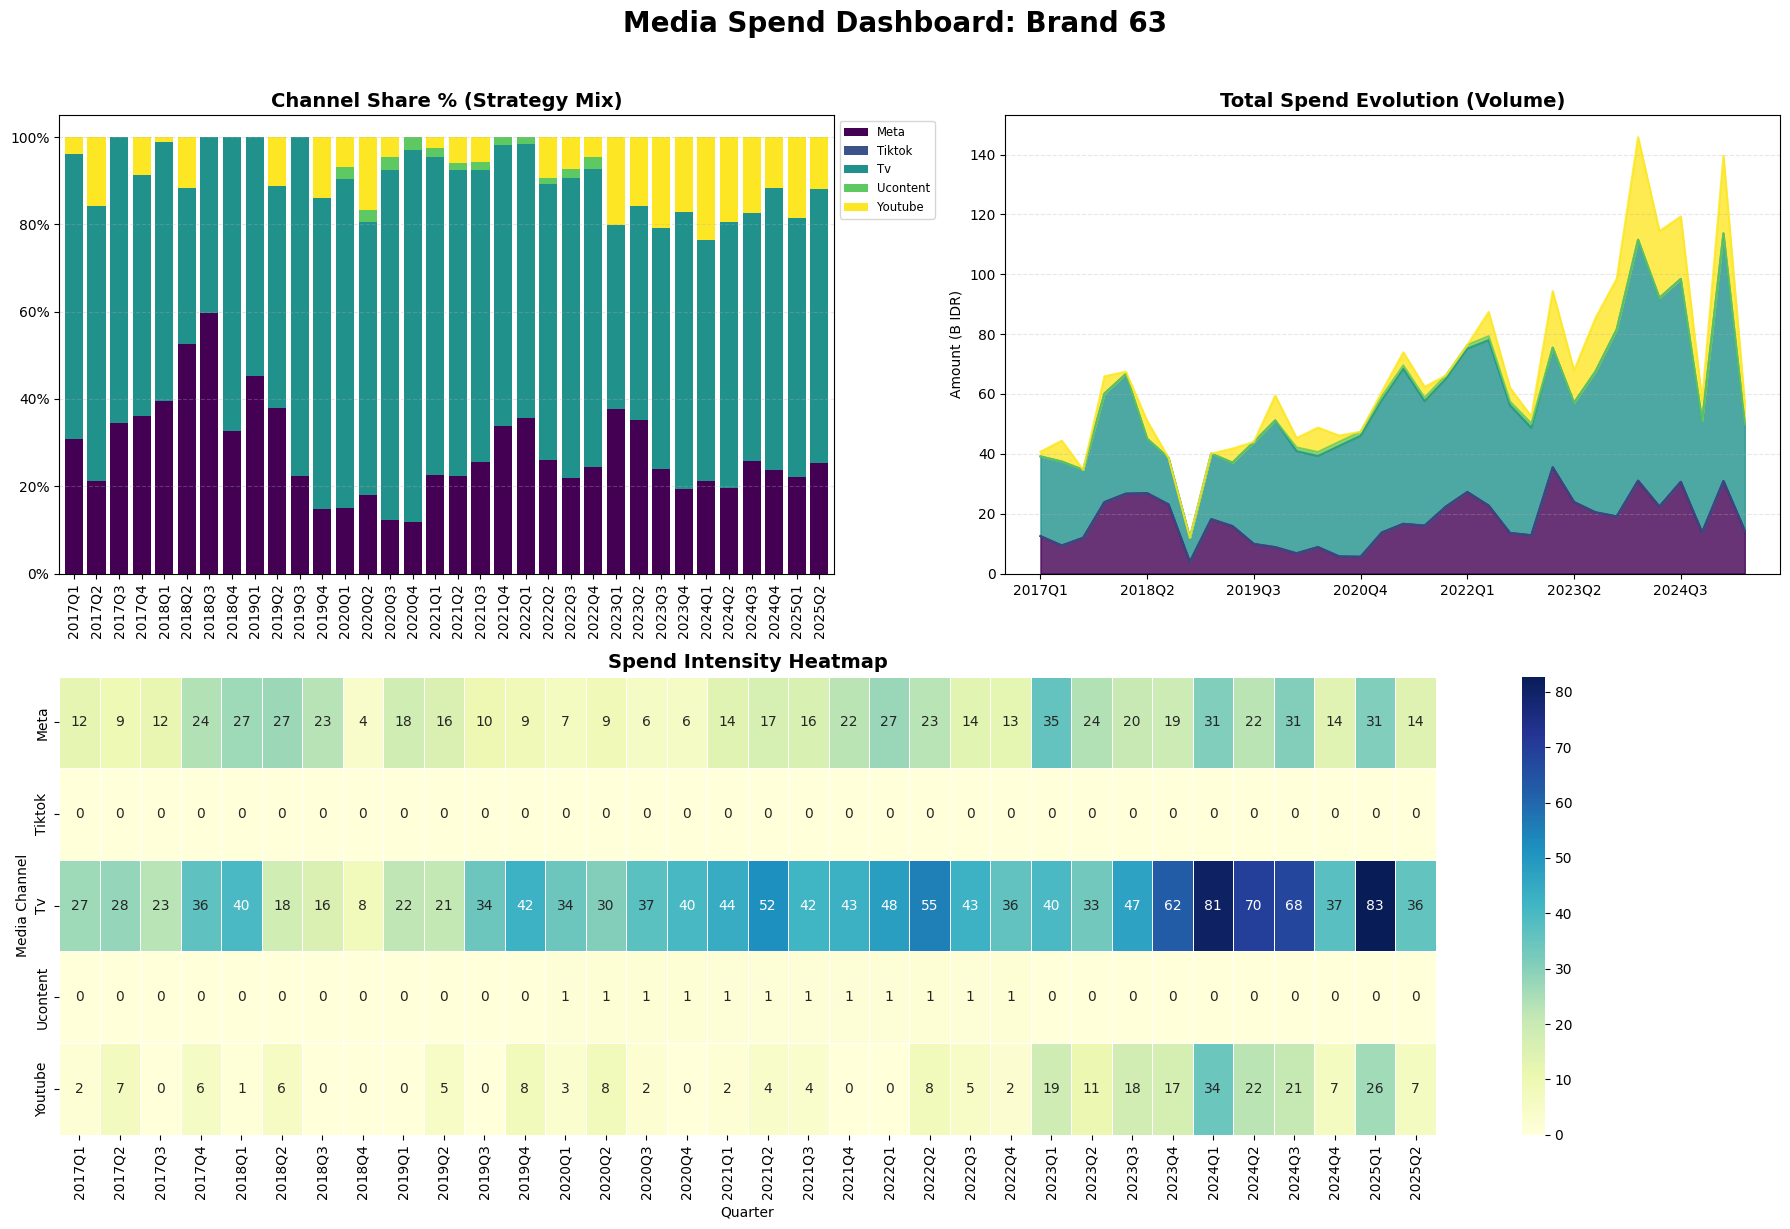

--------------------------------------------------------------------------------
Generating charts for: Brand 64...


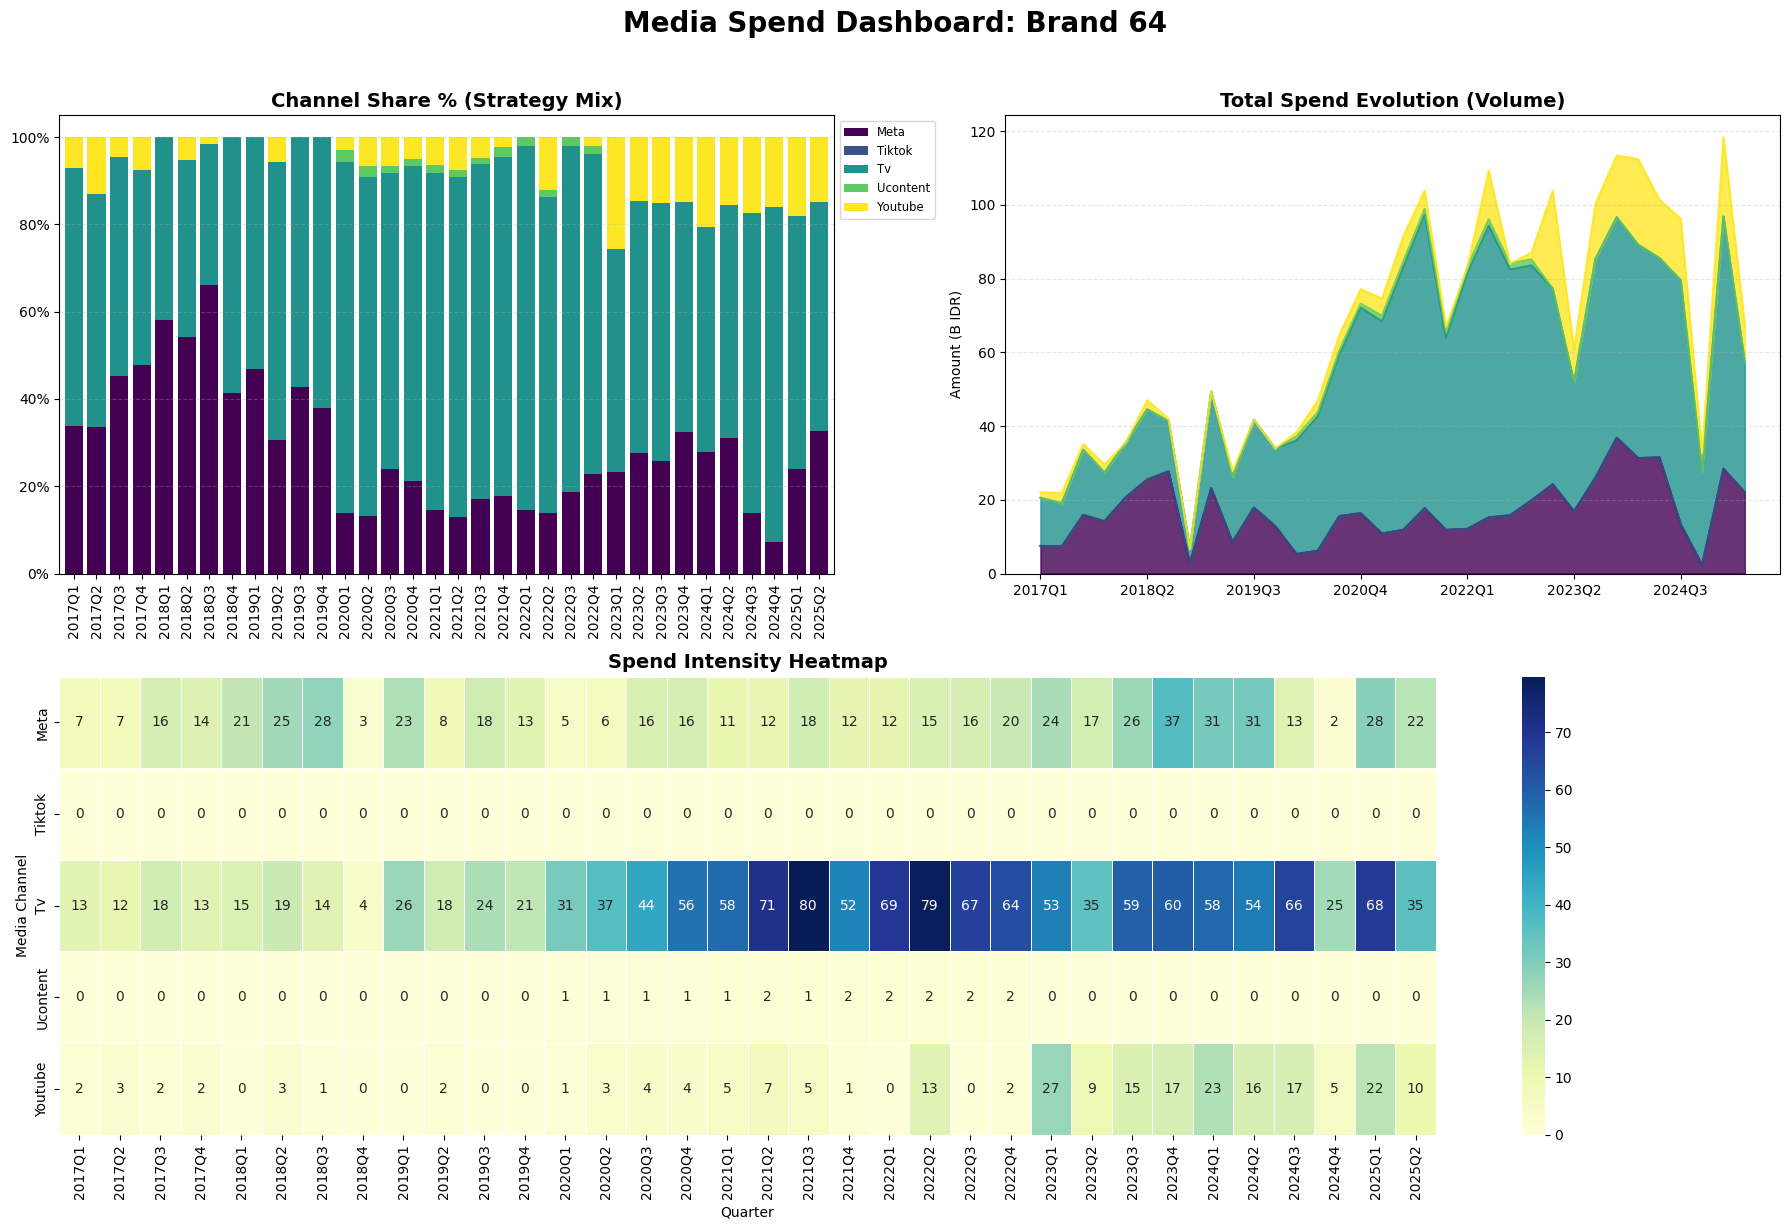

--------------------------------------------------------------------------------
Generating charts for: Brand 9...


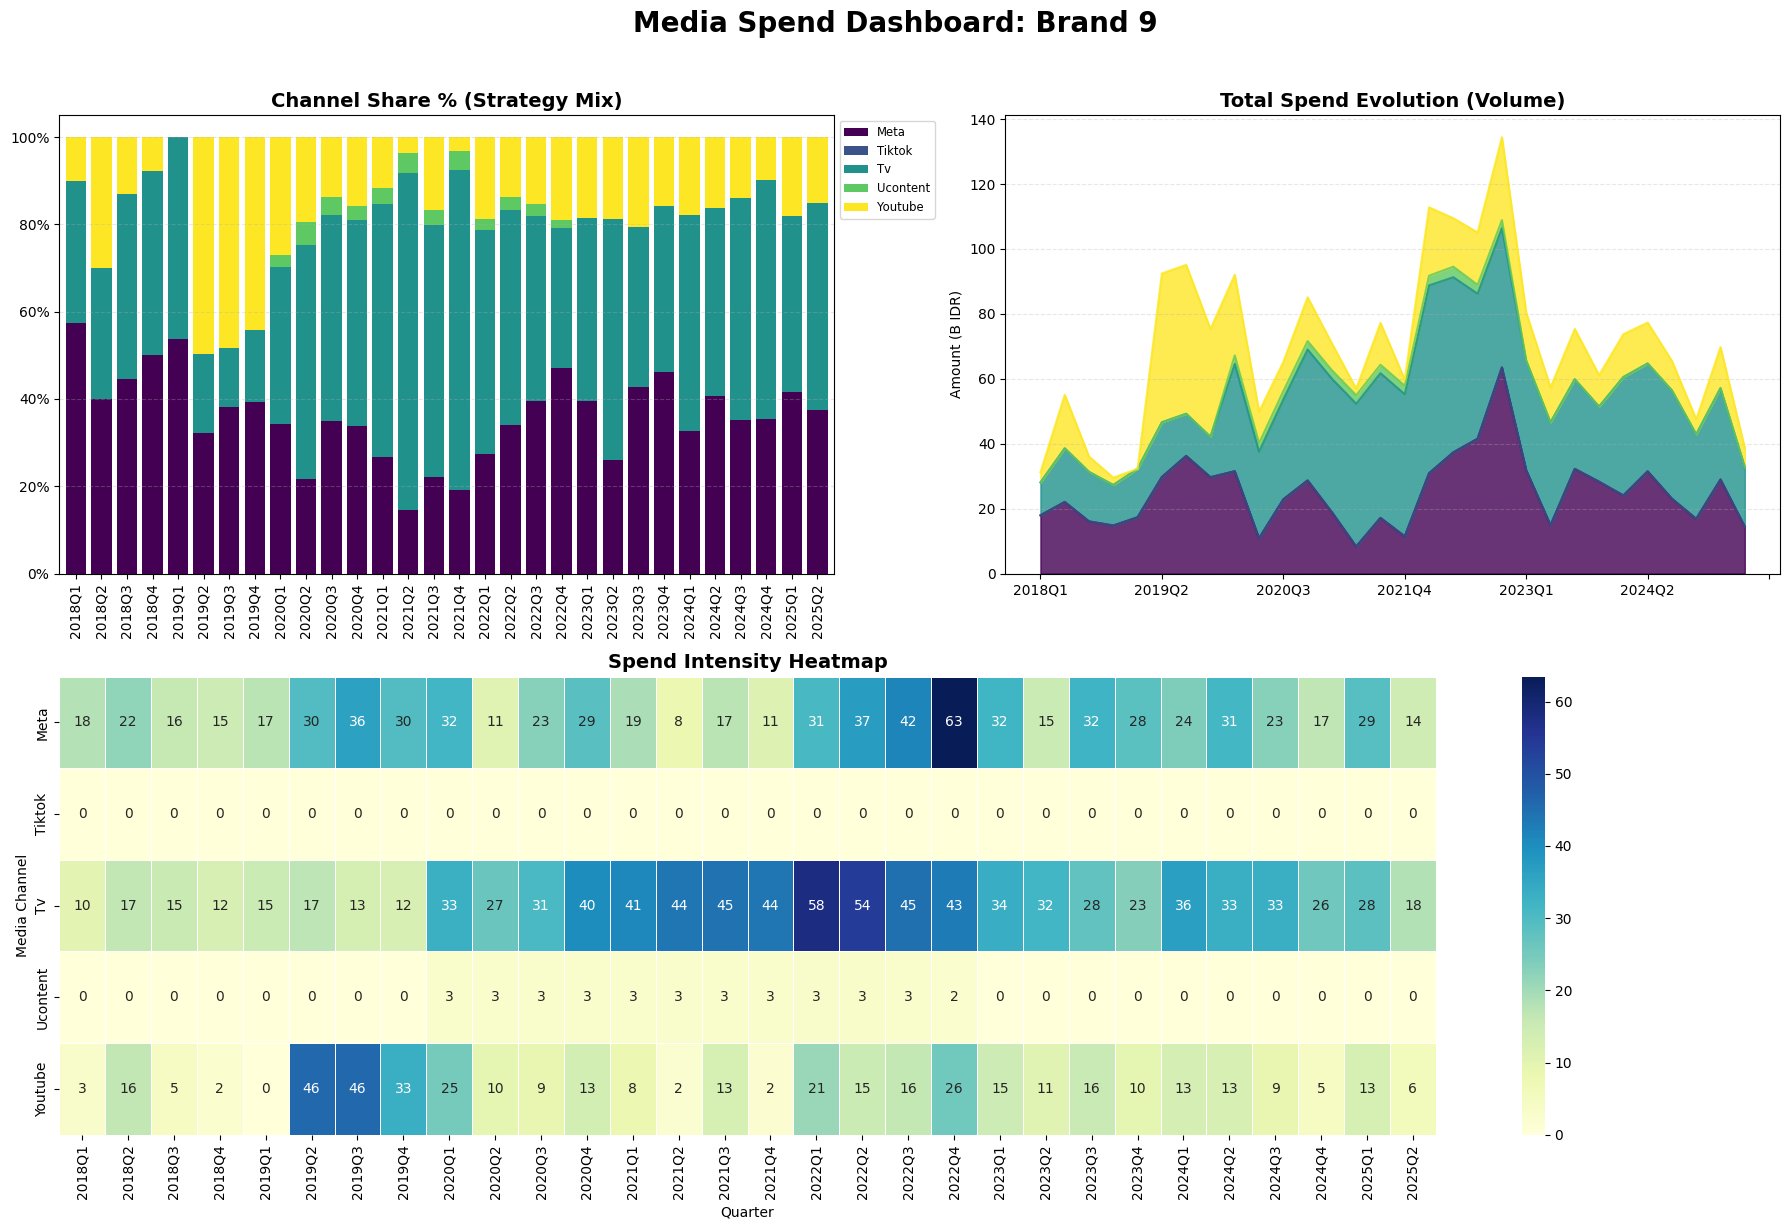

--------------------------------------------------------------------------------
Generating charts for: Brand 61...


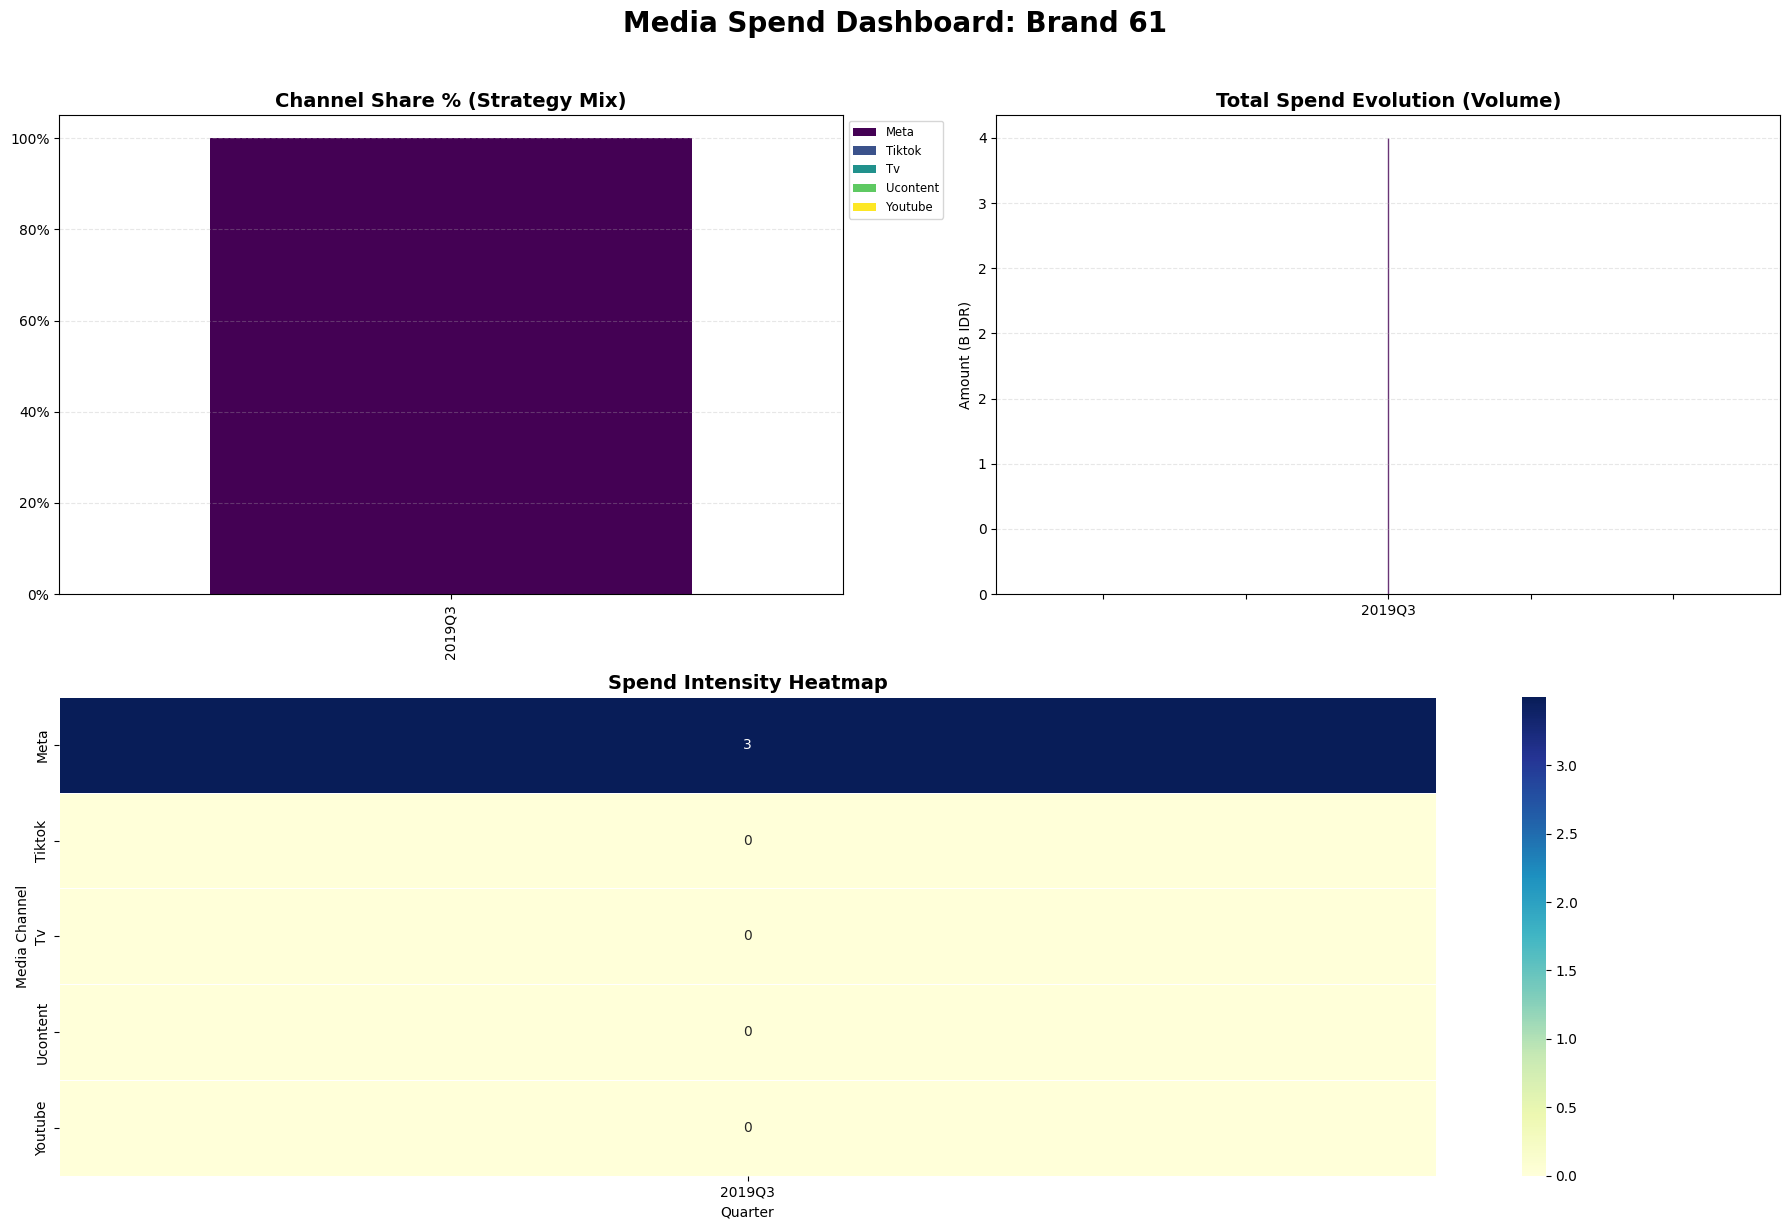

--------------------------------------------------------------------------------
Generating charts for: Brand 43...


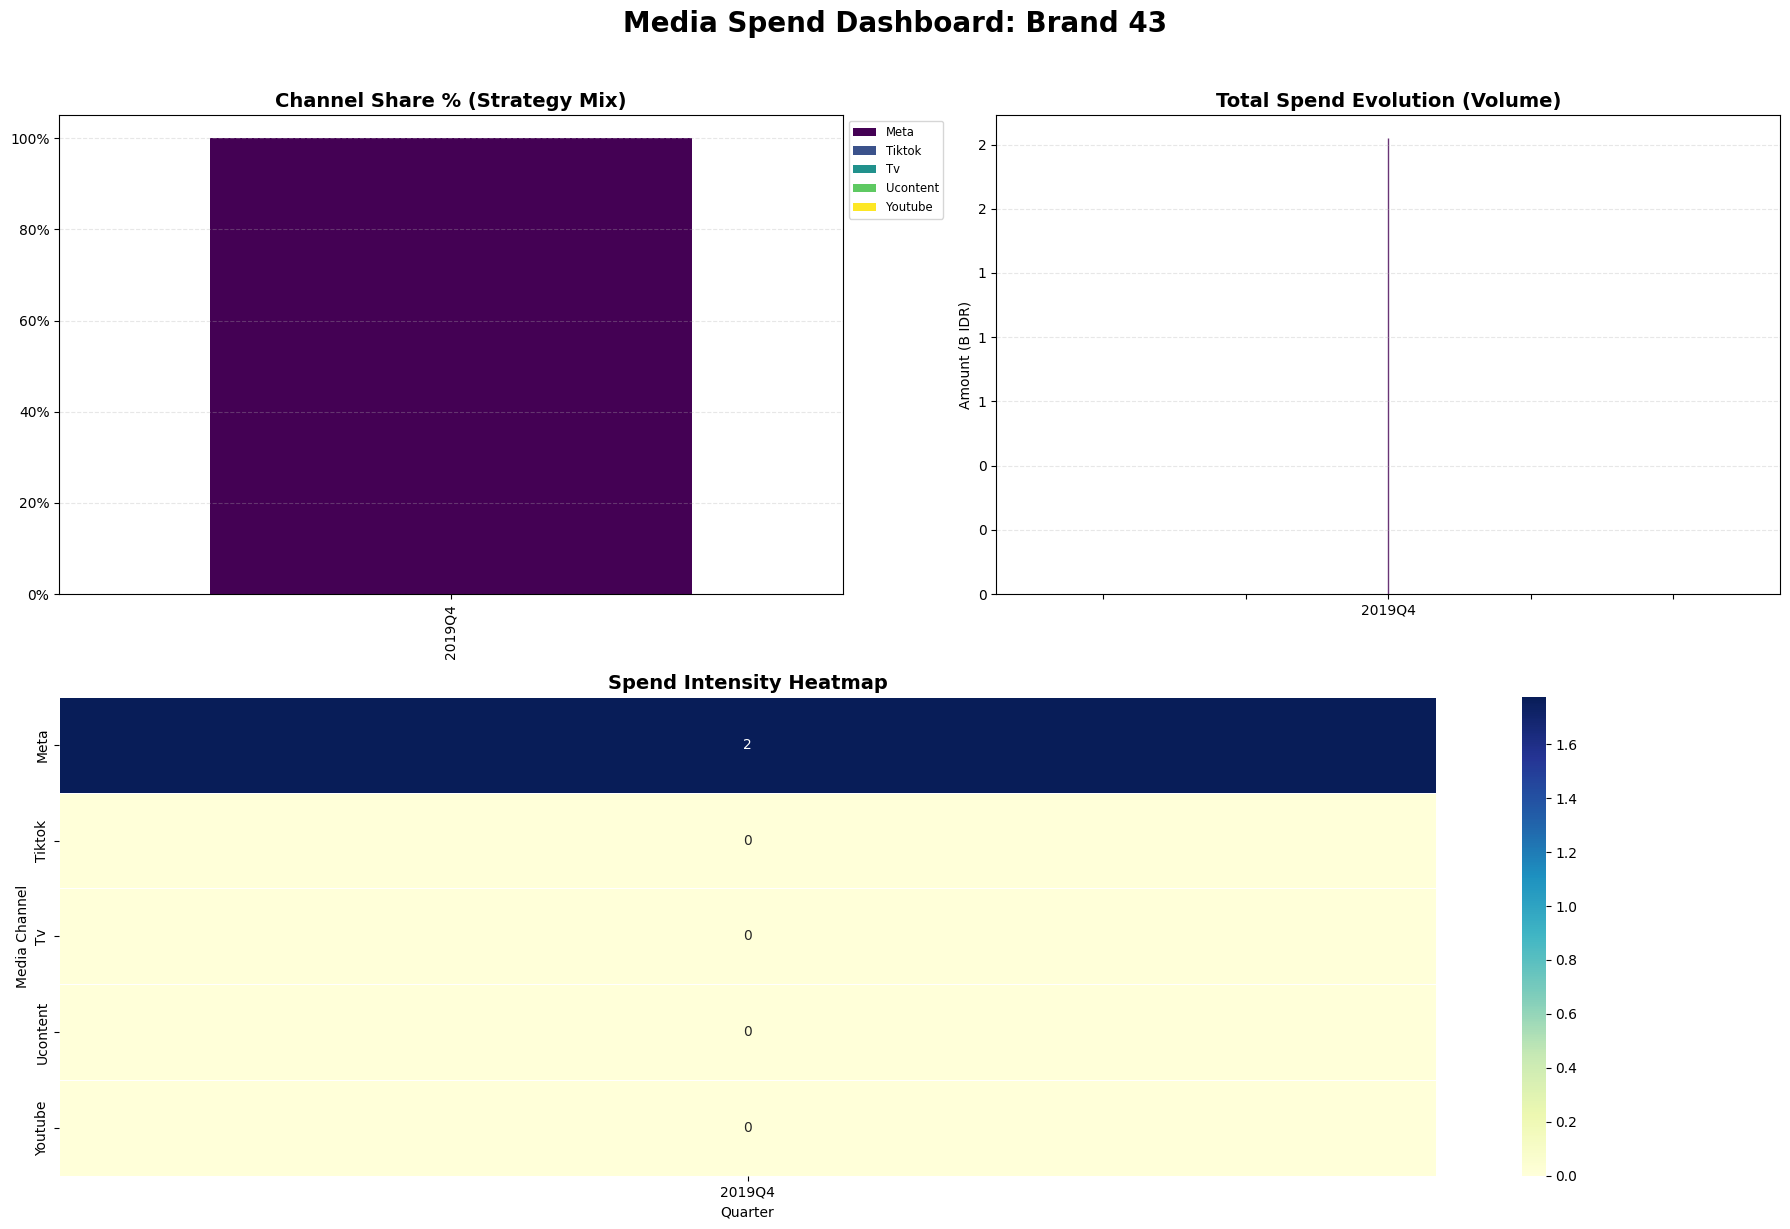

--------------------------------------------------------------------------------
Generating charts for: Brand 69...


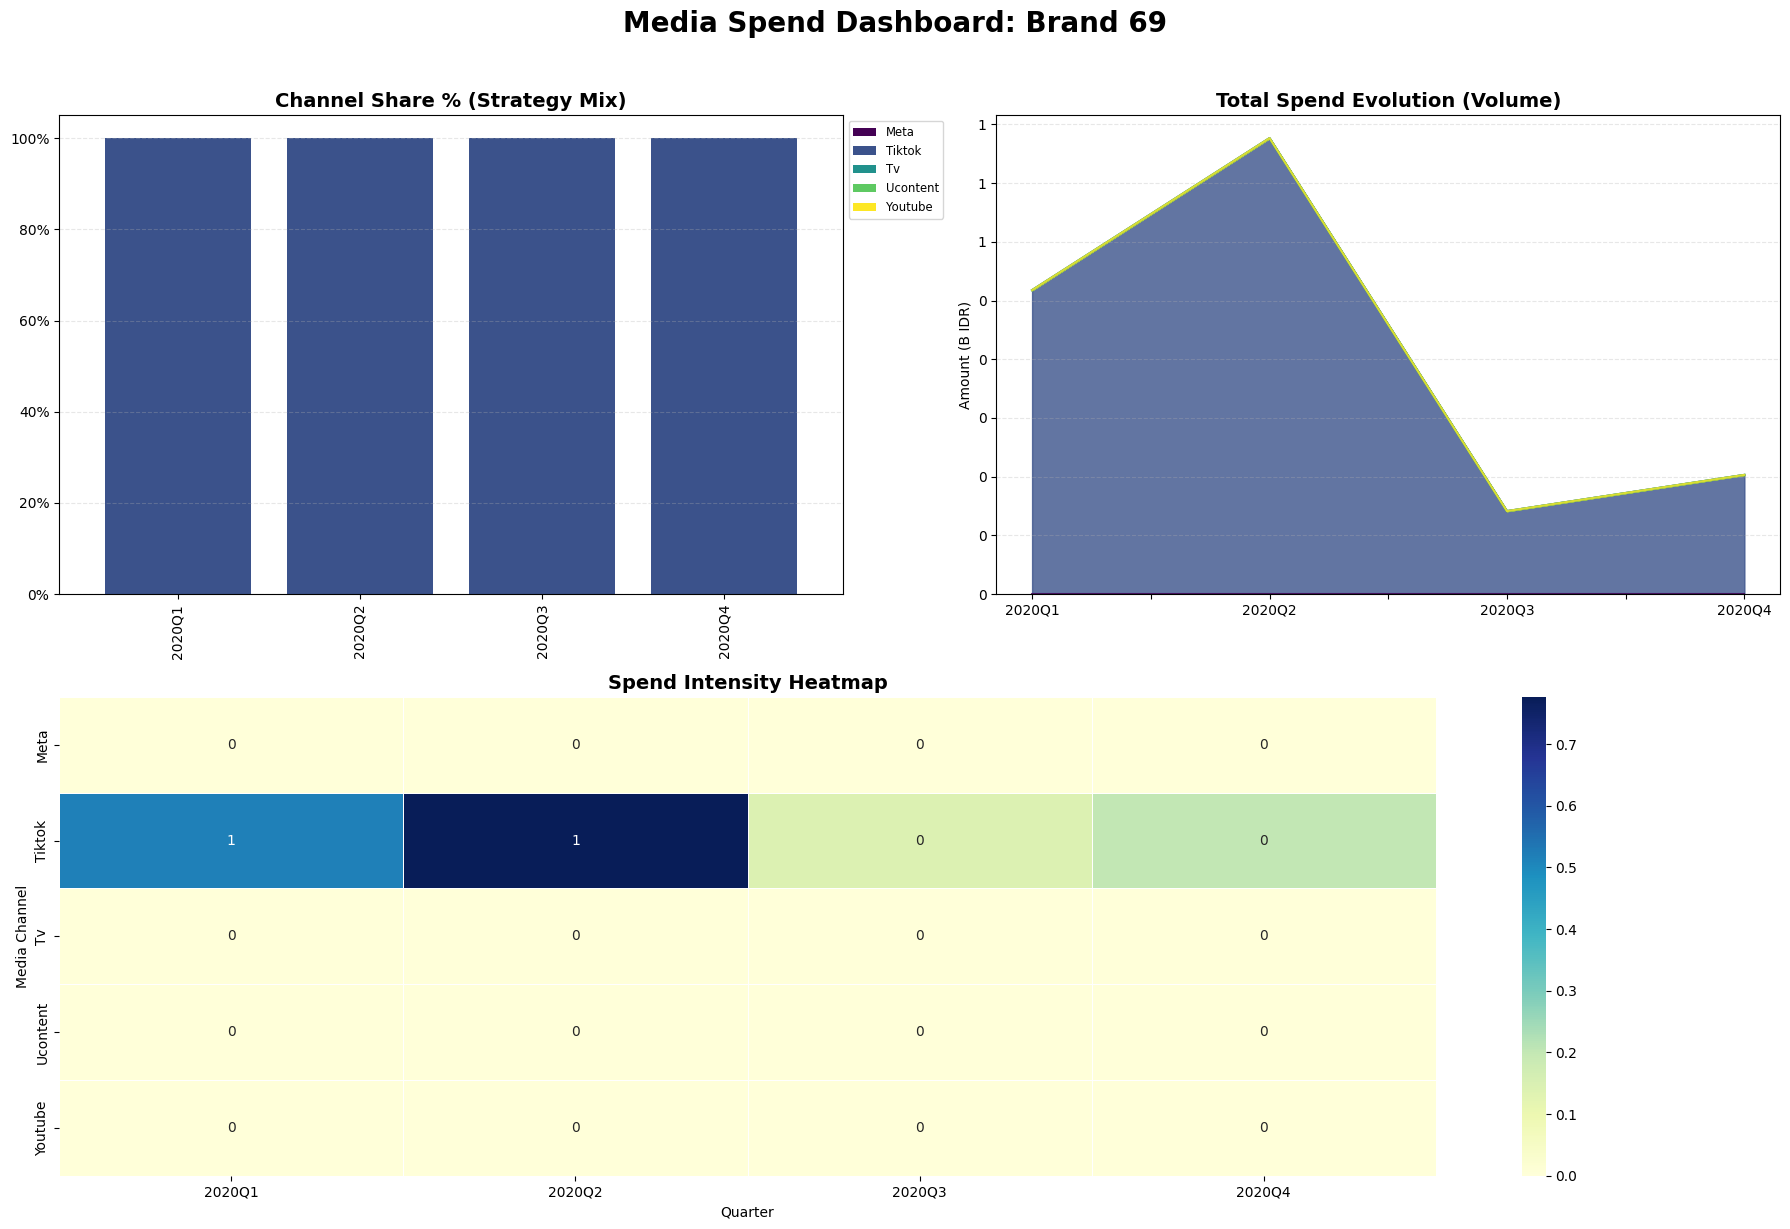

--------------------------------------------------------------------------------
Generating charts for: Brand 22...


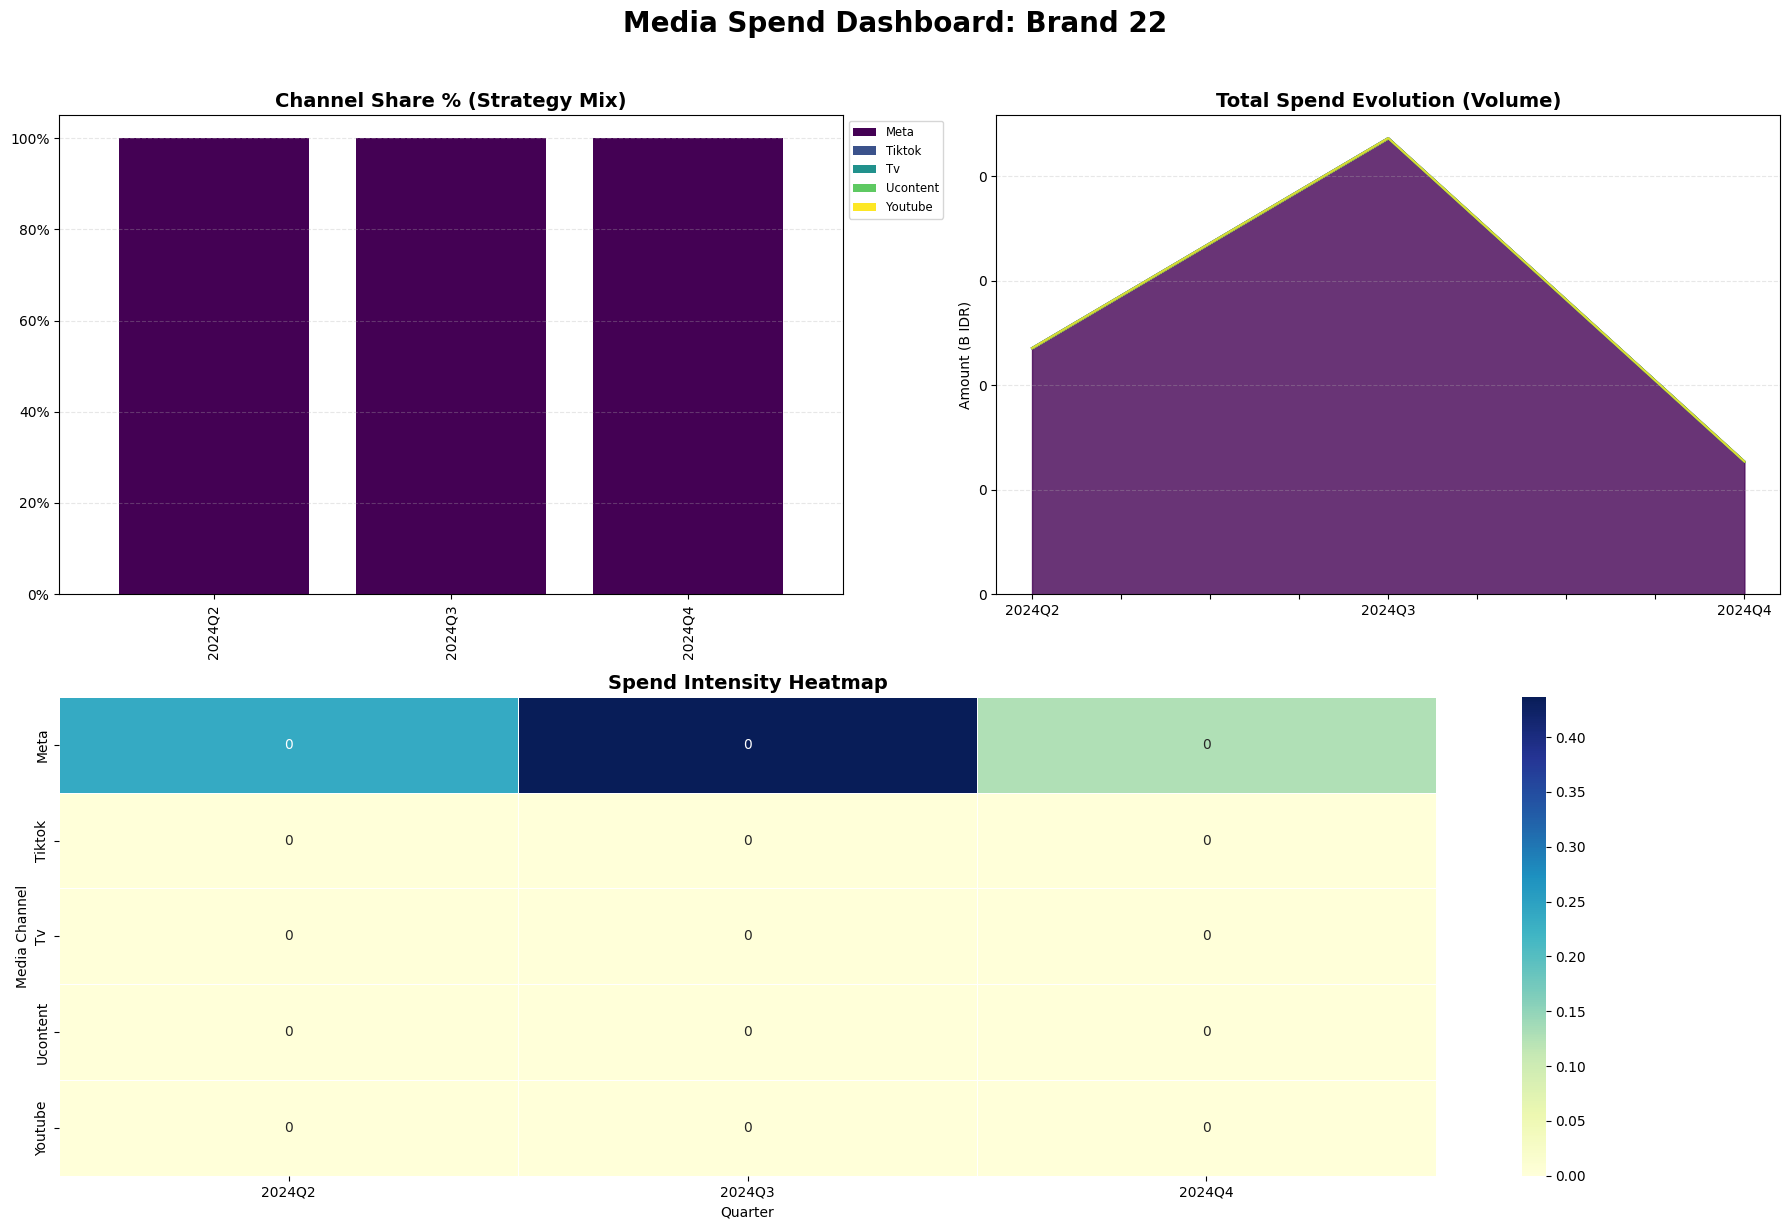

--------------------------------------------------------------------------------
Generating charts for: Brand 54...


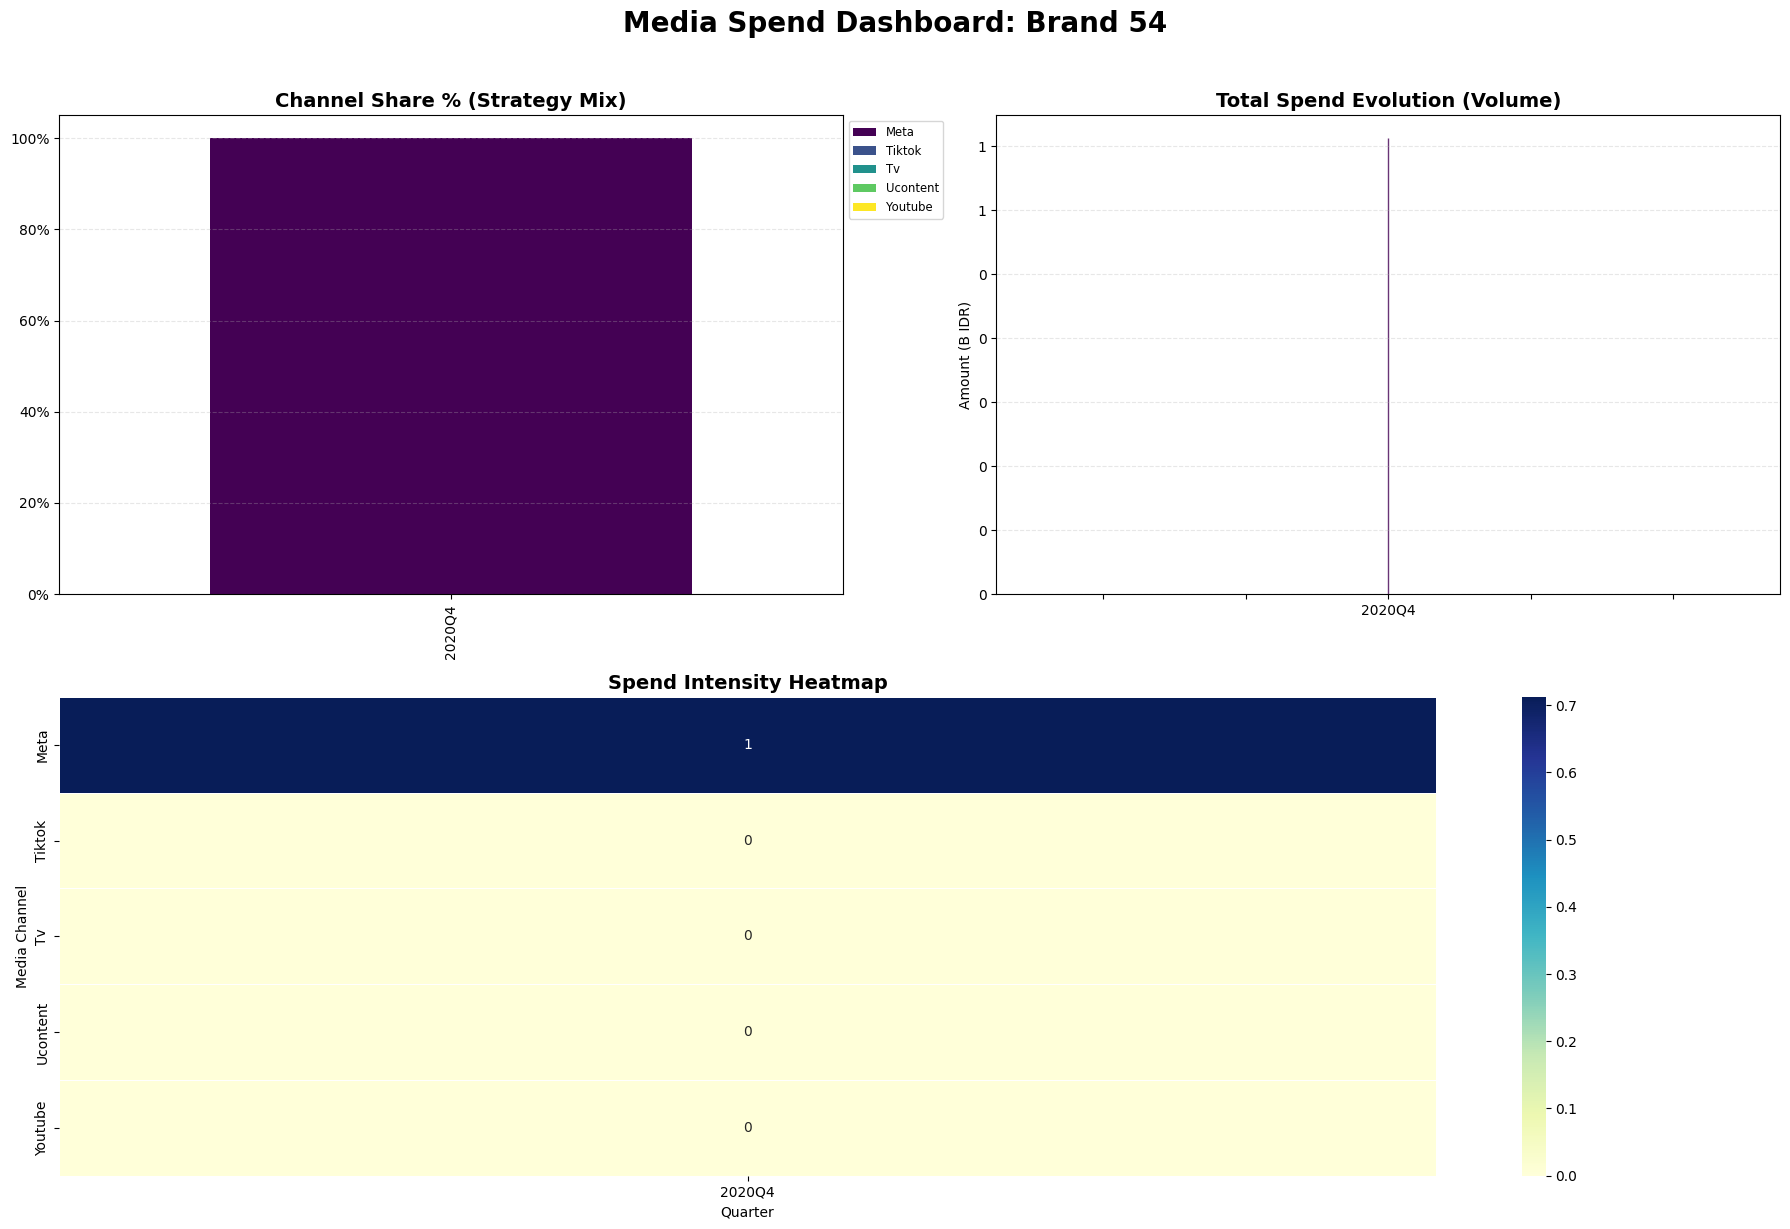

--------------------------------------------------------------------------------


In [32]:
unique_brands = spend_df['brand'].unique()
top_brands = [brand for _, _, brand in top_sp.index.to_list()]
for brand in top_brands[:5]+top_brands[-5:]:
    spending_chart_generator(brand)

Brands that heavily rely on a single channel (>50%):
        brand Channel  Share_Pct   Total
21   Brand 13  Tiktok      100.0   198.4
27   Brand 14      Tv      100.0     7.5
36   Brand 16  Tiktok      100.0   175.8
56    Brand 2  Tiktok      100.0   200.1
131  Brand 33  Tiktok      100.0    27.1
106  Brand 29  Tiktok      100.0    33.2
86   Brand 25  Tiktok      100.0    78.4
70   Brand 22    Meta      100.0     0.8
151  Brand 37  Tiktok      100.0    31.1
276   Brand 6  Tiktok      100.0   124.7
285  Brand 61    Meta      100.0     3.5
311  Brand 66  Tiktok      100.0    26.9
326  Brand 69  Tiktok      100.0     1.6
245  Brand 54    Meta      100.0     0.7
181  Brand 42  Tiktok      100.0   336.1
185  Brand 43    Meta      100.0     1.8
266  Brand 58  Tiktok      100.0   431.3
82   Brand 24      Tv       95.3     8.4
142  Brand 35      Tv       88.1    20.5
127  Brand 32      Tv       83.0    26.4
97   Brand 27      Tv       72.4    79.5
157  Brand 38      Tv       71.8   299.3
122 

C:\Users\Dell\AppData\Local\Temp\ipykernel_17680\1696674570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spend_df['Amount_Billions'] = spend_df['Amount'] / 1_000_000_000


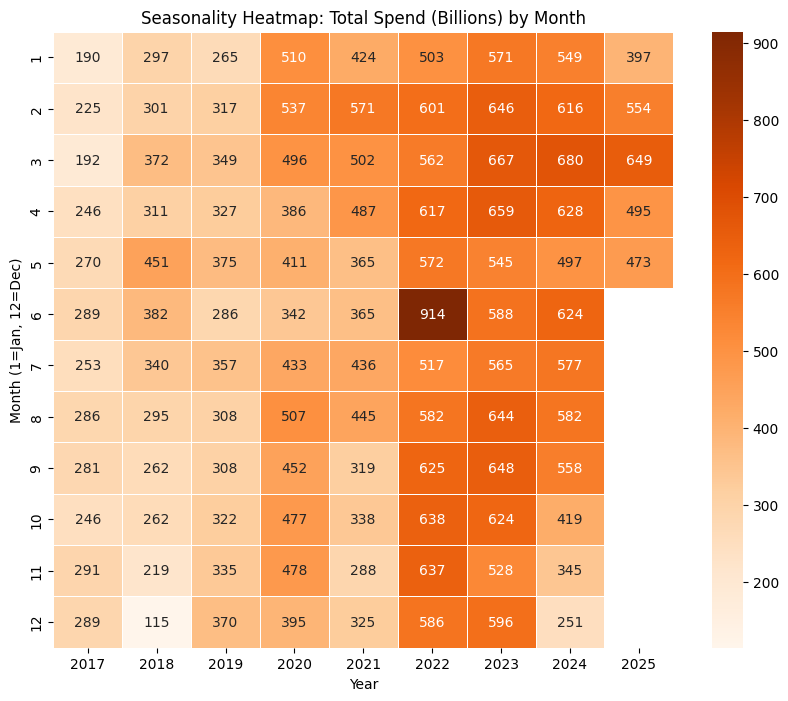

Average Q4 Monthly Spend: 378B
Average Q1 Monthly Spend: 481B
-> No significant Q4 seasonality detected.

=== 3. Anomaly Detection (Z-Score) ===
Top Spending Anomalies (Unusual Spikes/Drops):
         brand  monthyear  Amount_Billions   Z_Score
2690  Brand 51 2022-06-01        44.997845  5.085231
4421   Brand 8 2023-06-01        21.796387  5.015193
2601  Brand 50 2022-06-01        32.490078  5.002113
817   Brand 21 2018-09-01        29.763717  4.749302
951   Brand 23 2020-10-01        14.017489  4.733404


In [33]:
spend_df['Amount_Billions'] = spend_df['Amount'] / 1_000_000_000
brand_channel_spend = spend_df.groupby(['brand', 'Channel'])['Amount_Billions'].sum().reset_index()

# Calculate Total Spend per Brand to get percentages
brand_total_spend = spend_df.groupby('brand')['Amount_Billions'].sum().reset_index().rename(columns={'Amount_Billions': 'Total'})
merged = brand_channel_spend.merge(brand_total_spend, on='brand')
merged['Share_Pct'] = (merged['Amount_Billions'] / merged['Total']) * 100

# Find the dominant channel for each brand
dominant_channels = merged.loc[merged.groupby('brand')['Share_Pct'].idxmax()]

# Filter for "Heavy Favoritism" (e.g., > 50% share)
heavy_favorites = dominant_channels[dominant_channels['Share_Pct'] > 50].sort_values('Share_Pct', ascending=False)

print("Brands that heavily rely on a single channel (>50%):")
display_cols = ['brand', 'Channel', 'Share_Pct', 'Total']
print(heavy_favorites[display_cols].round(1))


# ==========================================
# ANALYSIS 2: Seasonal Trends (Heatmap)
# ==========================================
print("\n=== 2. Seasonal Variation Analysis ===")

# Create a pivot of Month vs Year to spot recurring patterns
# We sum all brands together to see the "Market Trend"
seasonal_data = spend_df.groupby([
    spend_df['monthyear'].dt.year.rename('Year'), 
    spend_df['monthyear'].dt.month.rename('Month')
])['Amount_Billions'].sum().reset_index()
seasonal_data.columns = ['Year', 'Month', 'Amount']

# Pivot for Heatmap: Index=Month, Columns=Year
seasonality_pivot = seasonal_data.pivot(index='Month', columns='Year', values='Amount')

plt.figure(figsize=(10, 8))
sns.heatmap(seasonality_pivot, cmap='Oranges', annot=True, fmt='.0f', linewidths=.5)
plt.title('Seasonality Heatmap: Total Spend (Billions) by Month')
plt.ylabel('Month (1=Jan, 12=Dec)')
plt.show()

# Insight Calculation:
# Check if Q4 (Oct, Nov, Dec) is significantly higher than Q1 (Jan, Feb, Mar)
avg_monthly = seasonal_data.groupby('Month')['Amount'].mean()
q4_avg = avg_monthly[10:13].mean()
q1_avg = avg_monthly[1:4].mean()
print(f"Average Q4 Monthly Spend: {q4_avg:.0f}B")
print(f"Average Q1 Monthly Spend: {q1_avg:.0f}B")
if q4_avg > q1_avg * 1.2:
    print("-> TREND DETECTED: Significant spending spike in Q4.")
else:
    print("-> No significant Q4 seasonality detected.")


# ==========================================
# ANALYSIS 3: Anomaly Detection (Spikes)
# ==========================================
print("\n=== 3. Anomaly Detection (Z-Score) ===")

# Calculate quarterly spend per brand
q_spend = spend_df.groupby(['brand', 'monthyear'])['Amount_Billions'].sum().reset_index()

# Calculate Mean and Std Dev for each brand
brand_stats = q_spend.groupby('brand')['Amount_Billions'].agg(['mean', 'std']).reset_index()
q_spend = q_spend.merge(brand_stats, on='brand')

# Calculate Z-Score: (Value - Mean) / StdDev
# Z-Score > 2 means the value is 2 standard deviations away (Very Unusual)
q_spend['Z_Score'] = (q_spend['Amount_Billions'] - q_spend['mean']) / q_spend['std']

# Filter for Anomalies (Z-Score > 1.5 or < -1.5 for moderate sensitivity)
anomalies = q_spend[abs(q_spend['Z_Score']) > 1.5].sort_values('Z_Score', ascending=False)

print("Top Spending Anomalies (Unusual Spikes/Drops):")
print(anomalies[['brand', 'monthyear', 'Amount_Billions', 'Z_Score']].head(5))

C:\Users\Dell\AppData\Local\Temp\ipykernel_17680\1088315952.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=specialist_counts, x='Channel', y='Brand_Count', palette='viridis')


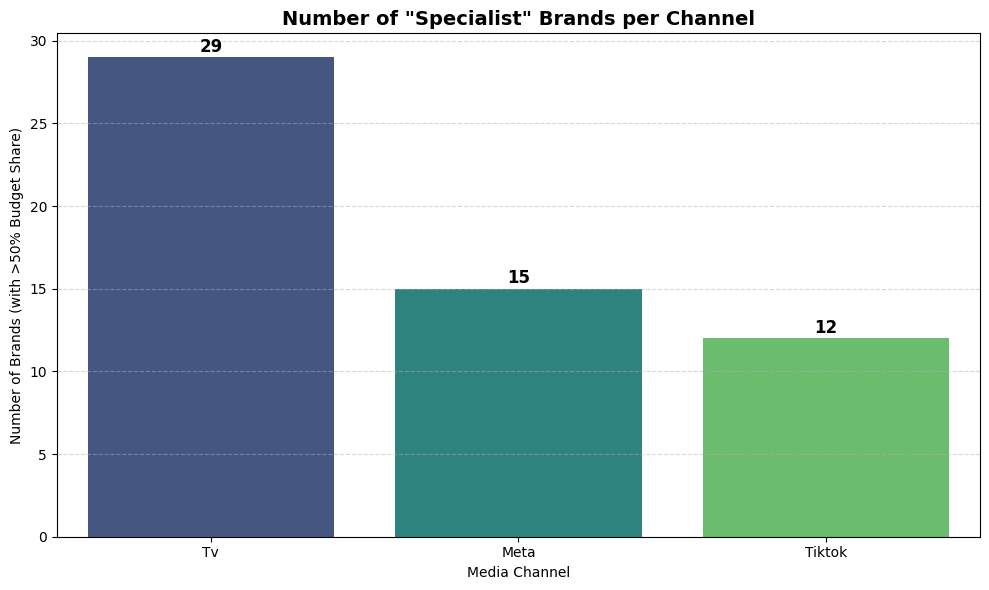

In [34]:
# ==========================================
# 4. VISUALIZATION: Single-Channel Specialists (Count per Channel)
# ==========================================

# 1. Aggregate: Count number of brands per dominant channel
specialist_counts = heavy_favorites.groupby('Channel')['brand'].count().reset_index()
specialist_counts.columns = ['Channel', 'Brand_Count']
specialist_counts = specialist_counts.sort_values('Brand_Count', ascending=False)

plt.figure(figsize=(10, 6))

# 2. Plot: Bar Chart
ax = sns.barplot(data=specialist_counts, x='Channel', y='Brand_Count', palette='viridis')

plt.title('Number of "Specialist" Brands per Channel', fontsize=14, fontweight='bold')
plt.xlabel('Media Channel')
plt.ylabel('Number of Brands (with >50% Budget Share)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 3. Add Labels: Show the exact count on top of each bar
for i, v in enumerate(specialist_counts['Brand_Count']):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


=== Generating Seasonality Heatmaps Per Channel ===


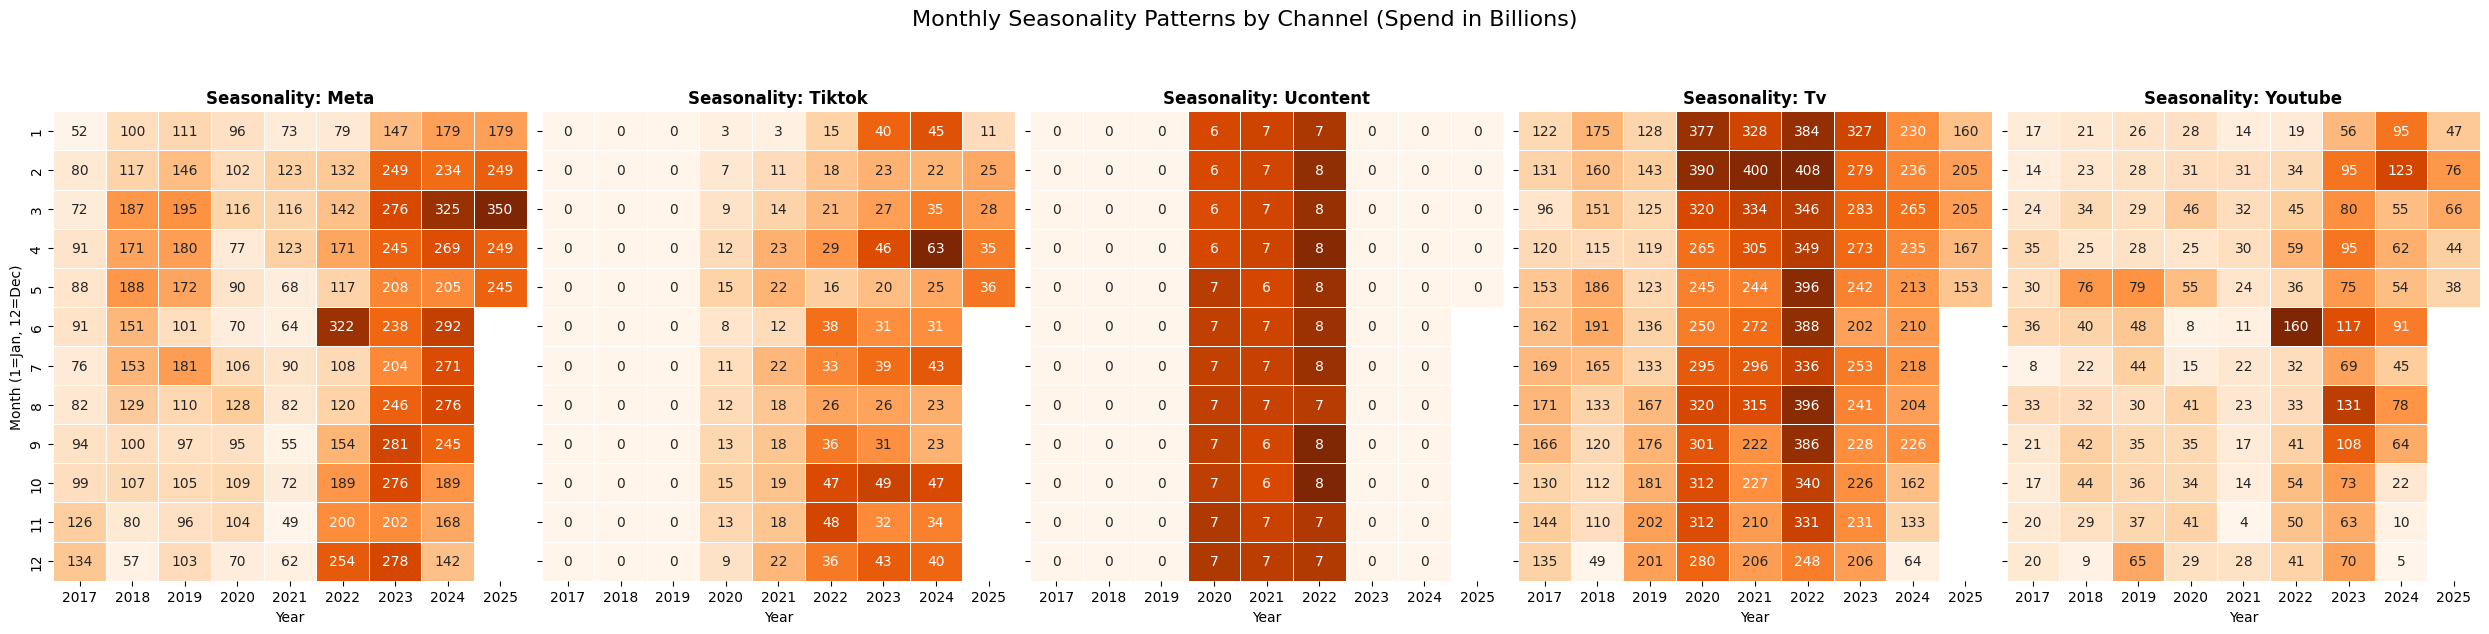

In [35]:
unique_channels = spend_df['Channel'].unique()
n_channels = len(unique_channels)

# Create subplots (1 row, N columns)
# sharey=True aligns the Month rows (1-12) across all charts
fig, axes = plt.subplots(1, n_channels, figsize=(5 * n_channels, 6), sharey=True)

# Handle edge case if there is only 1 channel
if n_channels == 1: 
    axes = [axes] 

print("\n=== Generating Seasonality Heatmaps Per Channel ===")

for i, channel in enumerate(unique_channels):
    # 1. Filter data for JUST this channel
    channel_data = spend_df[spend_df['Channel'] == channel].copy()
    
    # 2. Extract Year and Month
    # We sum across ALL brands to find the "Channel's Natural Seasonality"
    seasonal_data = channel_data.groupby([
        channel_data['monthyear'].dt.year.rename('Year'), 
        channel_data['monthyear'].dt.month.rename('Month')
    ])['Amount_Billions'].sum().reset_index()
    
    # 3. Pivot: Index=Month (1-12), Columns=Year
    heatmap_matrix = seasonal_data.pivot(index='Month', columns='Year', values='Amount_Billions')
    
    # 4. Plot
    sns.heatmap(heatmap_matrix, 
                ax=axes[i], 
                cmap='Oranges',   # Orange/Red helps visualize "Hot" periods
                cbar=False,       # Keep it clean
                annot=True,       # Show the numbers
                fmt='.0f',        # Format as whole numbers (change to '.1f' for decimals)
                linewidths=0.5)
    
    axes[i].set_title(f'Seasonality: {channel}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Year')
    
    # Only show Y-axis labels (Month numbers) on the first chart
    if i == 0:
        axes[i].set_ylabel('Month (1=Jan, 12=Dec)')
    else:
        axes[i].set_ylabel('')

plt.suptitle('Monthly Seasonality Patterns by Channel (Spend in Billions)', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

# KPI

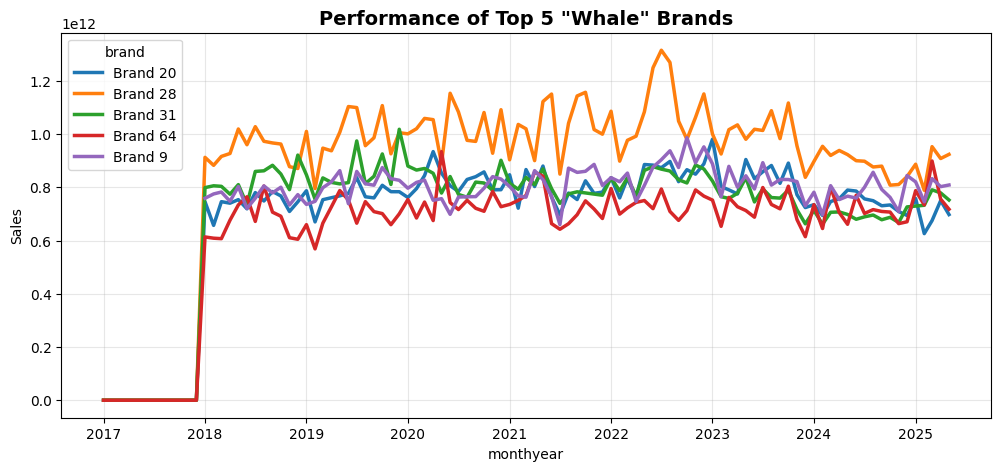

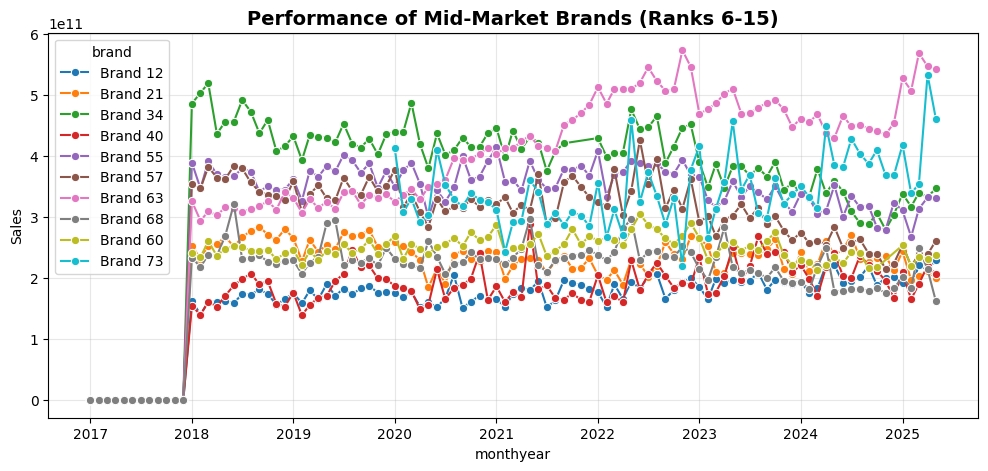

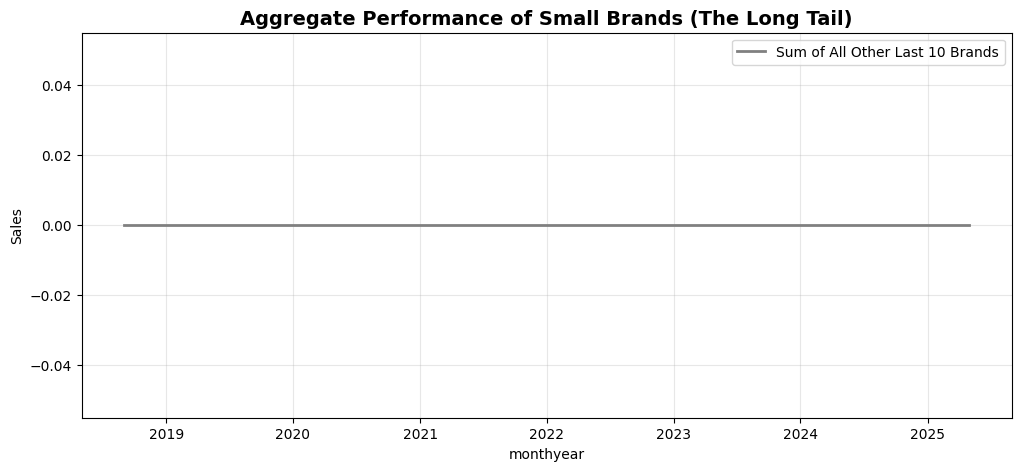

In [36]:
df_wide = df_non_dup.pivot_table(index=['monthyear', 'brand'], 
                         columns='variable', 
                         values='Amount').reset_index()

# Handle NaNs (e.g., if a channel didn't exist in 2017) by filling with 0
df_wide = df_wide.fillna(0)

# Clean up column names (remove "Spend on ") for cleaner charts
df_wide.columns = [c.replace('Spend on ', '').title() if 'Spend' in c else c for c in df_wide.columns]
# Rename 'Sales' to ensure consistent casing if needed
# (Check if your column is 'Sales' or 'sales')


# ==========================================
# 2. TREND VISUALIZATION: Sales Over Time
# ==========================================
brand_totals = df_wide.groupby('brand')['Sales'].sum().sort_values(ascending=False)

# Get the names of the Top 5
top_5_brands = brand_totals.head(5).index.tolist()

# Get the names of the "Mid Tier" (Rank 6 to 15)
mid_tier_brands = brand_totals.iloc[5:15].index.tolist()

# -------------------------------------------------------
# CHART 1: The Giants (Top 5 Only)
# -------------------------------------------------------
plt.figure(figsize=(12, 5))
# Filter data for only top 5
df_top = df_wide[df_wide['brand'].isin(top_5_brands)]

sns.lineplot(data=df_top, x='monthyear', y='Sales', hue='brand', linewidth=2.5)
plt.title('Performance of Top 5 "Whale" Brands', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

# -------------------------------------------------------
# CHART 2: The Mid-Market (Next 10)
# -------------------------------------------------------
plt.figure(figsize=(12, 5))
df_mid = df_wide[df_wide['brand'].isin(mid_tier_brands)]

sns.lineplot(data=df_mid, x='monthyear', y='Sales', hue='brand', marker='o')
plt.title('Performance of Mid-Market Brands (Ranks 6-15)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

# -------------------------------------------------------
# CHART 3: The "Long Tail" Aggregate
# -------------------------------------------------------
# For the remaining 45 brands, sum them up into one line called "Others"
rest_brands = brand_totals.iloc[-10:].index.tolist()
df_rest = df_wide[df_wide['brand'].isin(rest_brands)].groupby('monthyear')['Sales'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=df_rest, x='monthyear', y='Sales', color='grey', linewidth=2, label='Sum of All Other Last 10 Brands')
plt.title('Aggregate Performance of Small Brands (The Long Tail)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

Total Brands: 74
Active Brands (Sales > 0): 51
Inactive Brands (Sales = 0): 23


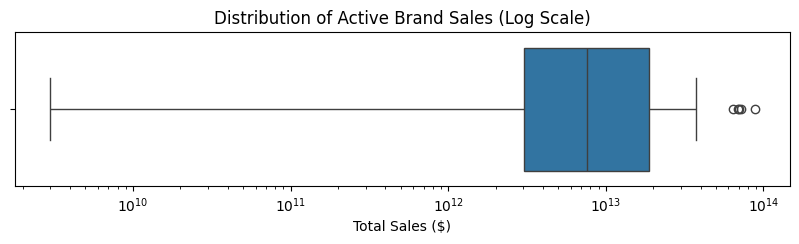

In [37]:
# 1. Ensure the totals are sorted descending (Highest to Lowest)
brand_totals_sorted = brand_totals.sort_values(ascending=False)
active_brands = brand_totals_sorted[brand_totals_sorted > 0]
# 2. Find the count of brands that actually have sales > 0
active_brands_count = (brand_totals_sorted > 0).sum()
print(f"Total Brands: {len(brand_totals_sorted)}")
print(f"Active Brands (Sales > 0): {active_brands_count}")

# 3. Identify the 'Dead' brands
dead_brands_count = len(brand_totals_sorted) - active_brands_count
print(f"Inactive Brands (Sales = 0): {dead_brands_count}")

# A. Boxplot
plt.figure(figsize=(10, 2))
# Use log scale because typically sales data has massive outliers (Whales)
sns.boxplot(x=active_brands)
plt.xscale('log')
plt.title('Distribution of Active Brand Sales (Log Scale)')
plt.xlabel('Total Sales ($)')
plt.savefig('boxplot_sales.png')

In [38]:
brand_totals_sorted[brand_totals_sorted > 0]

brand
Brand 28    8.803601e+13
Brand 9     7.182164e+13
Brand 20    7.012401e+13
Brand 31    6.876682e+13
Brand 64    6.407374e+13
Brand 63    3.745158e+13
Brand 34    3.470968e+13
Brand 55    3.153239e+13
Brand 57    2.818450e+13
Brand 73    2.244482e+13
Brand 60    2.176846e+13
Brand 21    2.113144e+13
Brand 68    2.022834e+13
Brand 40    1.722432e+13
Brand 12    1.619350e+13
Brand 59    1.426099e+13
Brand 41    1.397881e+13
Brand 70    1.351547e+13
Brand 1     1.298278e+13
Brand 36    1.279921e+13
Brand 74    1.198134e+13
Brand 5     1.187399e+13
Brand 65    1.132874e+13
Brand 8     8.838273e+12
Brand 72    8.165064e+12
Brand 4     7.590765e+12
Brand 53    6.657843e+12
Brand 56    5.761024e+12
Brand 48    5.638997e+12
Brand 38    5.227132e+12
Brand 23    5.019112e+12
Brand 3     4.920993e+12
Brand 51    4.279864e+12
Brand 45    4.186779e+12
Brand 50    4.029249e+12
Brand 10    3.967381e+12
Brand 7     3.276804e+12
Brand 67    3.134368e+12
Brand 11    2.918955e+12
Brand 15    2.62335


--- Cluster Thresholds (Derived from Data) ---
                  min           max  count          mean
Cluster                                                 
0        2.982719e+09  1.426099e+13     36  5.362102e+12
2        1.619350e+13  3.745158e+13     10  2.508690e+13
1        6.407374e+13  8.803601e+13      5  7.256444e+13


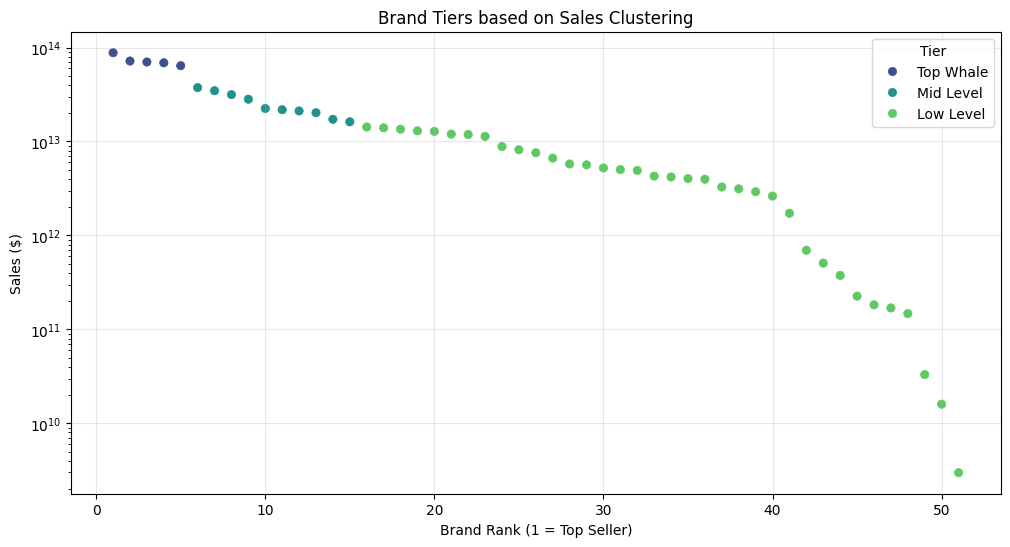

In [39]:
X = active_brands.values.reshape(-1, 1)

# We use k=3 to find "Low", "Mid", "Whale" tiers
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
active_brands_df = active_brands.to_frame()
active_brands_df['Cluster'] = kmeans.fit_predict(X)

# Determine which cluster is which (0,1,2 are arbitrary, we need to sort them)
cluster_stats = active_brands_df.groupby('Cluster')['Sales'].agg(['min', 'max', 'count', 'mean']).sort_values('min')

# Map cluster IDs to names
cluster_map = {
    cluster_stats.index[0]: 'Low Level',
    cluster_stats.index[1]: 'Mid Level',
    cluster_stats.index[2]: 'Top Whale'
}
active_brands_df['Tier'] = active_brands_df['Cluster'].map(cluster_map)

print("\n--- Cluster Thresholds (Derived from Data) ---")
print(cluster_stats)

# C. Visualize the Clusters (The "Elbow" View)
plt.figure(figsize=(12, 6))
# Create a scatter plot of Rank vs Sales, colored by Tier
active_brands_df['Rank'] = range(1, len(active_brands_df) + 1)

sns.scatterplot(data=active_brands_df, x='Rank', y='Sales', hue='Tier', palette='viridis', edgecolor=None)
plt.title('Brand Tiers based on Sales Clustering')
plt.xlabel('Brand Rank (1 = Top Seller)')
plt.ylabel('Sales ($)')
plt.yscale('log') # Log scale to see the separation better
plt.grid(True, alpha=0.3)
plt.savefig('cluster_plot.png')

In [40]:
brand_meta = df_non_dup[['brand', 'business_level', 'category']].drop_duplicates().set_index('brand')
df_analysis = active_brands_df.join(brand_meta, how='left')

# Check the result - you should now see Sales, Cluster, Tier, BU, and Category
print(df_analysis.head())

                 Sales  Cluster       Tier  Rank   business_level     category
brand                                                                         
Brand 28  8.803601e+13        1  Top Whale     1  Business Unit 2   Category 7
Brand 9   7.182164e+13        1  Top Whale     2  Business Unit 1   Category 4
Brand 20  7.012401e+13        1  Top Whale     3  Business Unit 1   Category 5
Brand 31  6.876682e+13        1  Top Whale     4  Business Unit 2   Category 8
Brand 64  6.407374e+13        1  Top Whale     5  Business Unit 4  Category 17


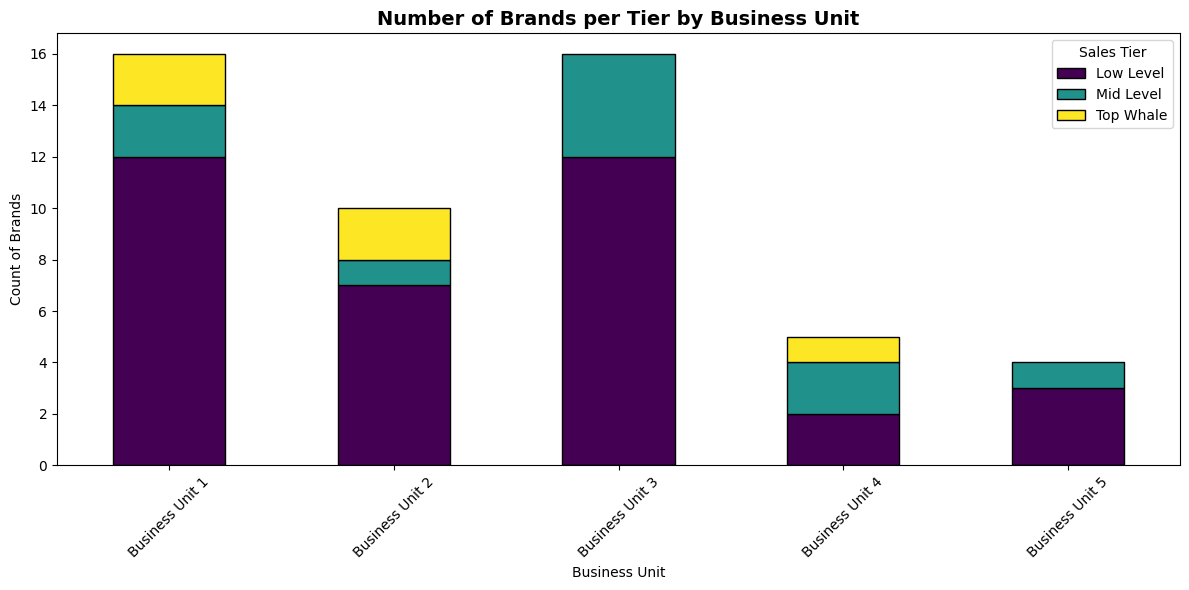

In [41]:
# 1. Crosstab: Count how many brands of each Tier are in each BU
bu_cross = pd.crosstab(df_analysis['business_level'], df_analysis['Tier'])

# 2. Reorder columns logic (Low -> Mid -> Whale)
cols_order = ['Low Level', 'Mid Level', 'Top Whale']
bu_cross = bu_cross.reindex(columns=[c for c in cols_order if c in bu_cross.columns], fill_value=0)

# 3. Plot
bu_cross.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black', figsize=(12, 6))
plt.title('Number of Brands per Tier by Business Unit', fontsize=14, fontweight='bold')
plt.xlabel('Business Unit')
plt.ylabel('Count of Brands')
plt.legend(title='Sales Tier')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

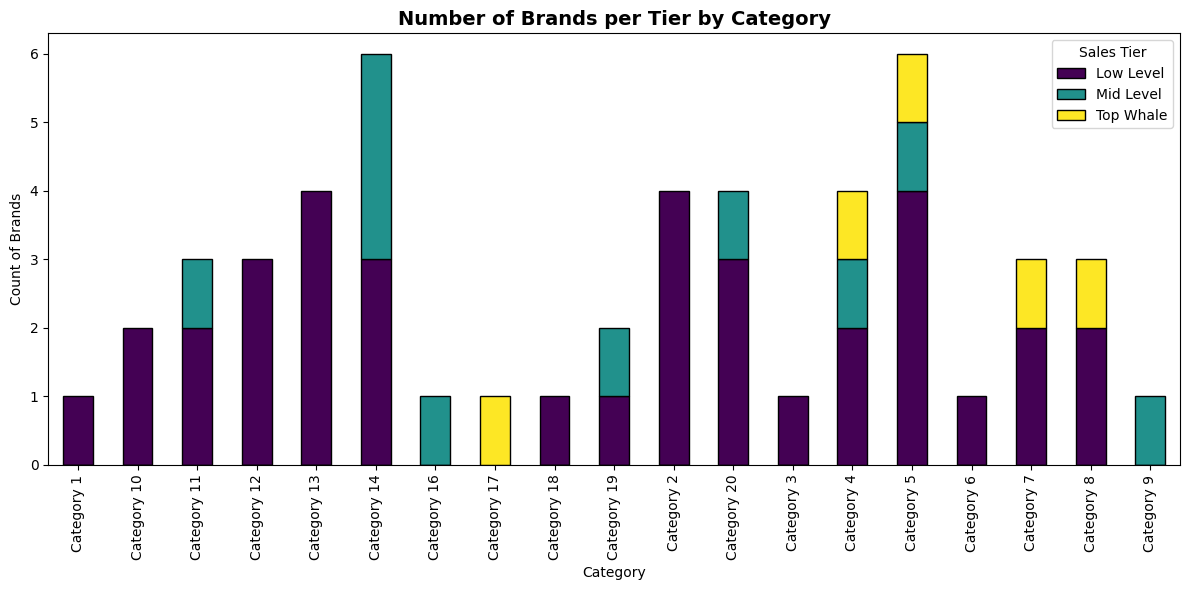

In [42]:
# 1. Crosstab
cat_cross = pd.crosstab(df_analysis['category'], df_analysis['Tier'])

# 2. Reorder
cat_cross = cat_cross.reindex(columns=[c for c in cols_order if c in cat_cross.columns], fill_value=0)

# 3. Plot
cat_cross.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black', figsize=(12, 6))
plt.title('Number of Brands per Tier by Category', fontsize=14, fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Count of Brands')
plt.legend(title='Sales Tier')
plt.xticks()
plt.tight_layout()
plt.show()

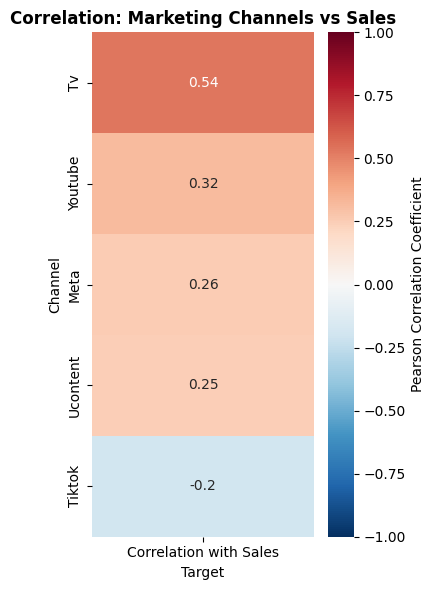

In [43]:
df_pivot = df_non_dup.pivot_table(index=['monthyear', 'brand', 'business_level', 'category'], 
                          columns='variable', 
                          values='Amount', 
                          aggfunc='sum').reset_index()

# 2. Fill NaNs (assuming NaN spend = 0)
df_pivot = df_pivot.fillna(0)

# 3. Identify Channel Columns and Sales Column
sales_col = 'Sales'
channel_cols = [c for c in df_pivot.columns if 'Spend on' in c]

# 4. Clean Channel Names for Display (Remove "Spend on ")
rename_map = {c: c.replace('Spend on ', '').capitalize() for c in channel_cols}
df_pivot.rename(columns=rename_map, inplace=True)
clean_channel_cols = list(rename_map.values())

# 5. Calculate Correlation Matrix
# We only care about the correlation of Channels vs Sales
correlation_series = df_pivot[clean_channel_cols + [sales_col]].corr()[sales_col].drop(sales_col)
correlation_df = correlation_series.to_frame(name='Correlation with Sales')

# Sort for better visualization
correlation_df = correlation_df.sort_values('Correlation with Sales', ascending=False)

# 6. Plot Heatmap
plt.figure(figsize=(4, 6))
sns.heatmap(correlation_df, 
            annot=True, 
            cmap='RdBu_r', # Red = Positive, Blue = Negative
            vmin=-1, vmax=1, 
            cbar_kws={'label': 'Pearson Correlation Coefficient'})

plt.title('Correlation: Marketing Channels vs Sales', fontsize=12, fontweight='bold')
plt.ylabel('Channel')
plt.xlabel('Target')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

In [44]:
!pip install statsmodels

In [45]:
df_pivot = df_non_dup.pivot_table(
    index=['monthyear', 'brand'], 
    columns='variable', 
    values='Amount', 
    aggfunc='sum'
).reset_index().fillna(0)

# Clean column names (remove spaces/special chars for the formula)
df_pivot.columns = [c.replace('Spend on ', '').replace(' ', '_') for c in df_pivot.columns]
# Example columns now: ['monthyear', 'brand', 'Sales', 'meta', 'tiktok', 'tv'...]

# 2. Log-Transform the Data
# We add +1 to avoid log(0) errors
model_cols = ['Sales', 'meta', 'tiktok', 'tv', 'youtube'] # Add all your channels here
for col in model_cols:
    if col in df_pivot.columns:
        df_pivot[f'ln_{col}'] = np.log1p(df_pivot[col])

# 3. Define the Regression Formula
# "ln_Sales depends on ln_meta + ln_tv... AND the specific Brand (C(brand))"
formula = "ln_Sales ~ ln_meta + ln_tiktok + ln_tv + ln_youtube + C(brand)"

# 4. Run the Model
model = smf.ols(formula=formula, data=df_pivot).fit()

# 5. Get the Results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_Sales   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     97.30
Date:                Thu, 18 Dec 2025   Prob (F-statistic):               0.00
Time:                        18:14:23   Log-Likelihood:                -15206.
No. Observations:                4534   AIC:                         3.057e+04
Df Residuals:                    4456   BIC:                         3.107e+04
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               22.7316 

In [46]:
# 1. Extract Coefficients and P-values directly from the model
results_df = pd.DataFrame({
    'Impact': model.params,
    'P_Value': model.pvalues
})

# 2. Filter for Marketing Channels only
# We only want rows that start with "ln_" (ignoring Intercept and Brands)
marketing_df = results_df[results_df.index.str.startswith('ln_')].copy()

# 3. Clean up the names for the chart
# Remove "ln_" prefix and Capitalize (e.g., "ln_meta" -> "Meta")
marketing_df.index = marketing_df.index.str.replace('ln_', '').str.capitalize()

# 4. Determine Significance (Standard cutoff is 0.05)
marketing_df['Significance'] = marketing_df['P_Value'] < 0.05

# 5. Assign Colors automatically
# Green = Significant & Positive
# Red = Significant & Negative
# Grey = Not Significant (Noise)
def get_color(row):
    if not row['Significance']:
        return '#95a5a6' # Grey
    elif row['Impact'] > 0:
        return '#2ecc71' # Green
    else:
        return '#e74c3c' # Red

marketing_df['Color'] = marketing_df.apply(get_color, axis=1)

# Sort by Impact so the chart looks organized
marketing_df = marketing_df.sort_values('Impact', ascending=True)

print(marketing_df) # Check the data before plotting

               Impact       P_Value  Significance    Color
Tv      -1.660718e-01  2.535918e-21          True  #e74c3c
Tiktok   2.954183e-13  1.000000e+00         False  #95a5a6
Youtube  5.197913e-02  1.107053e-05          True  #2ecc71
Meta     1.413183e-01  1.716048e-09          True  #2ecc71


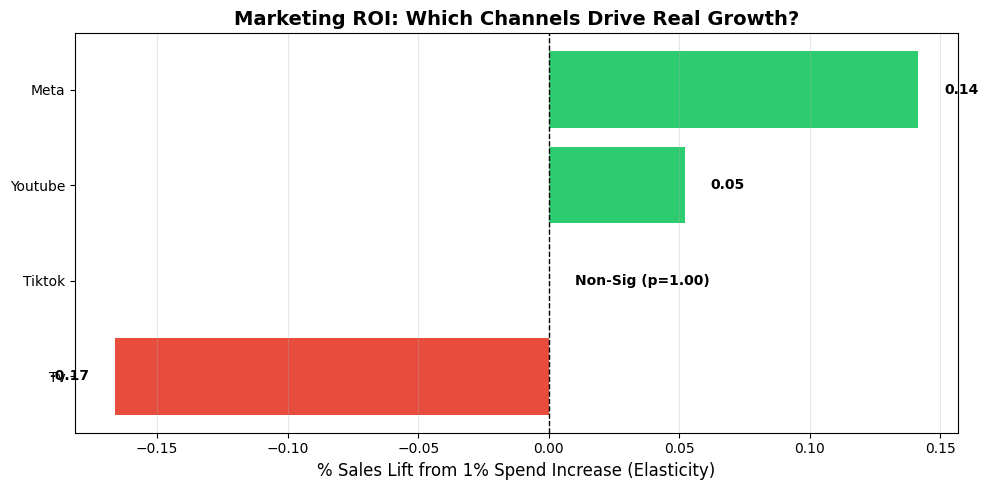

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Draw the Horizontal Bars
bars = plt.barh(marketing_df.index, marketing_df['Impact'], color=marketing_df['Color'])

# Add "Zero" line
plt.axvline(0, color='black', linewidth=1, linestyle='--')

# Decoration
plt.title('Marketing ROI: Which Channels Drive Real Growth?', fontsize=14, fontweight='bold')
plt.xlabel('% Sales Lift from 1% Spend Increase (Elasticity)', fontsize=12)
plt.grid(axis='x', alpha=0.3)

# Add Smart Annotations
for bar, row in zip(bars, marketing_df.itertuples()):
    width = bar.get_width()
    # Position text slightly to the right/left of the bar
    label_x_pos = width + (0.01 if width >= 0 else -0.01)
    
    # Text logic
    if not row.Significance:
        label_text = f"Non-Sig (p={row.P_Value:.2f})"
    else:
        label_text = f"{row.Impact:.2f}"
        
    ha_alignment = 'left' if width >= 0 else 'right'
    
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, 
             label_text, 
             va='center', ha=ha_alignment, fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

In [48]:
top_brands = df_pivot.groupby('brand')['Sales'].sum().sort_values(ascending=False).head(20).index.tolist()

# 2. Initialize a dictionary to store results
brand_results = []

# 3. Loop through each brand and run its own regression
for brand in top_brands:
    # Filter data for just this brand
    brand_data = df_pivot[df_pivot['brand'] == brand].copy()
    
    # Skip if too little data (needs at least 10 months to be somewhat reliable)
    if len(brand_data) < 10:
        continue
        
    try:
        # Run OLS for this specific brand
        # Note: We removed 'C(brand)' because we are already inside a specific brand
        formula = "ln_Sales ~ ln_meta + ln_tiktok + ln_tv + ln_youtube"
        model = smf.ols(formula=formula, data=brand_data).fit()
        
        # Extract Coefficients and P-values
        for channel in ['ln_meta', 'ln_tiktok', 'ln_tv', 'ln_youtube']:
            coef = model.params.get(channel, 0)
            pval = model.pvalues.get(channel, 1.0)
            
            # Logic: If P-Value > 0.1 (not significant), set Coefficient to 0 for the heatmap
            # This cleans up "noise" so you only see what actually works
            final_val = coef if pval < 0.1 else 0 
            
            brand_results.append({
                'Brand': brand,
                'Channel': channel.replace('ln_', '').capitalize(),
                'ROI_Coef': final_val
            })
            
    except Exception as e:
        continue # Skip if model fails (e.g., constant sales/spend)

# 4. Convert to DataFrame for Heatmap
df_res = pd.DataFrame(brand_results)
heatmap_data = df_res.pivot(index='Brand', columns='Channel', values='ROI_Coef')

# Check results
print(heatmap_data.head())

Channel       Meta        Tiktok   Tv   Youtube
Brand                                          
Brand 1   0.000000  0.000000e+00  0.0  0.270187
Brand 12  1.099379  0.000000e+00  0.0 -0.207921
Brand 20  4.012645 -6.388404e-16  0.0  0.000000
Brand 21  0.697652  1.346777e-15  0.0 -0.152437
Brand 28  0.000000  0.000000e+00  0.0  0.000000


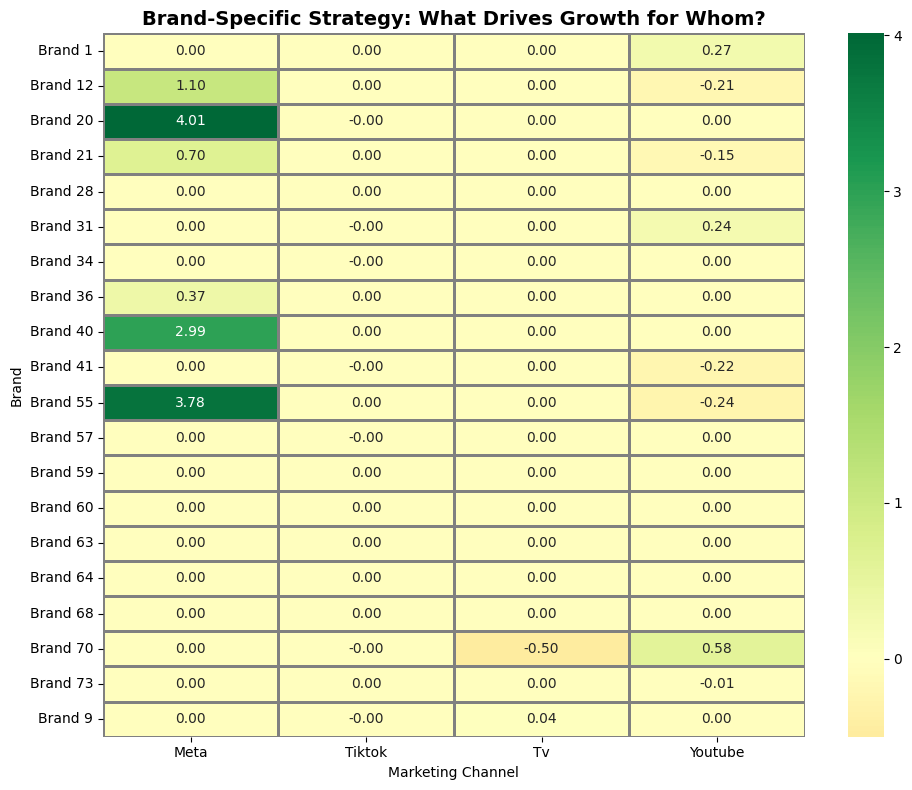

In [49]:
plt.figure(figsize=(10, 8))

# Draw Heatmap
sns.heatmap(heatmap_data, 
            annot=True,      # Show the numbers
            fmt='.2f',       # 2 decimal places
            cmap='RdYlGn',   # Red = Bad, Yellow = Neutral, Green = Good
            center=0,        # Make 0 be the middle color (Yellow/White)
            linewidths=1, 
            linecolor='gray')

plt.title('Brand-Specific Strategy: What Drives Growth for Whom?', fontsize=14, fontweight='bold')
plt.ylabel('Brand')
plt.xlabel('Marketing Channel')

plt.tight_layout()
plt.show()

--- Analysis for Top Spender: Brand 55 ---
Total Investment: $2,833,078,028,464
Generating charts for: Brand 55...


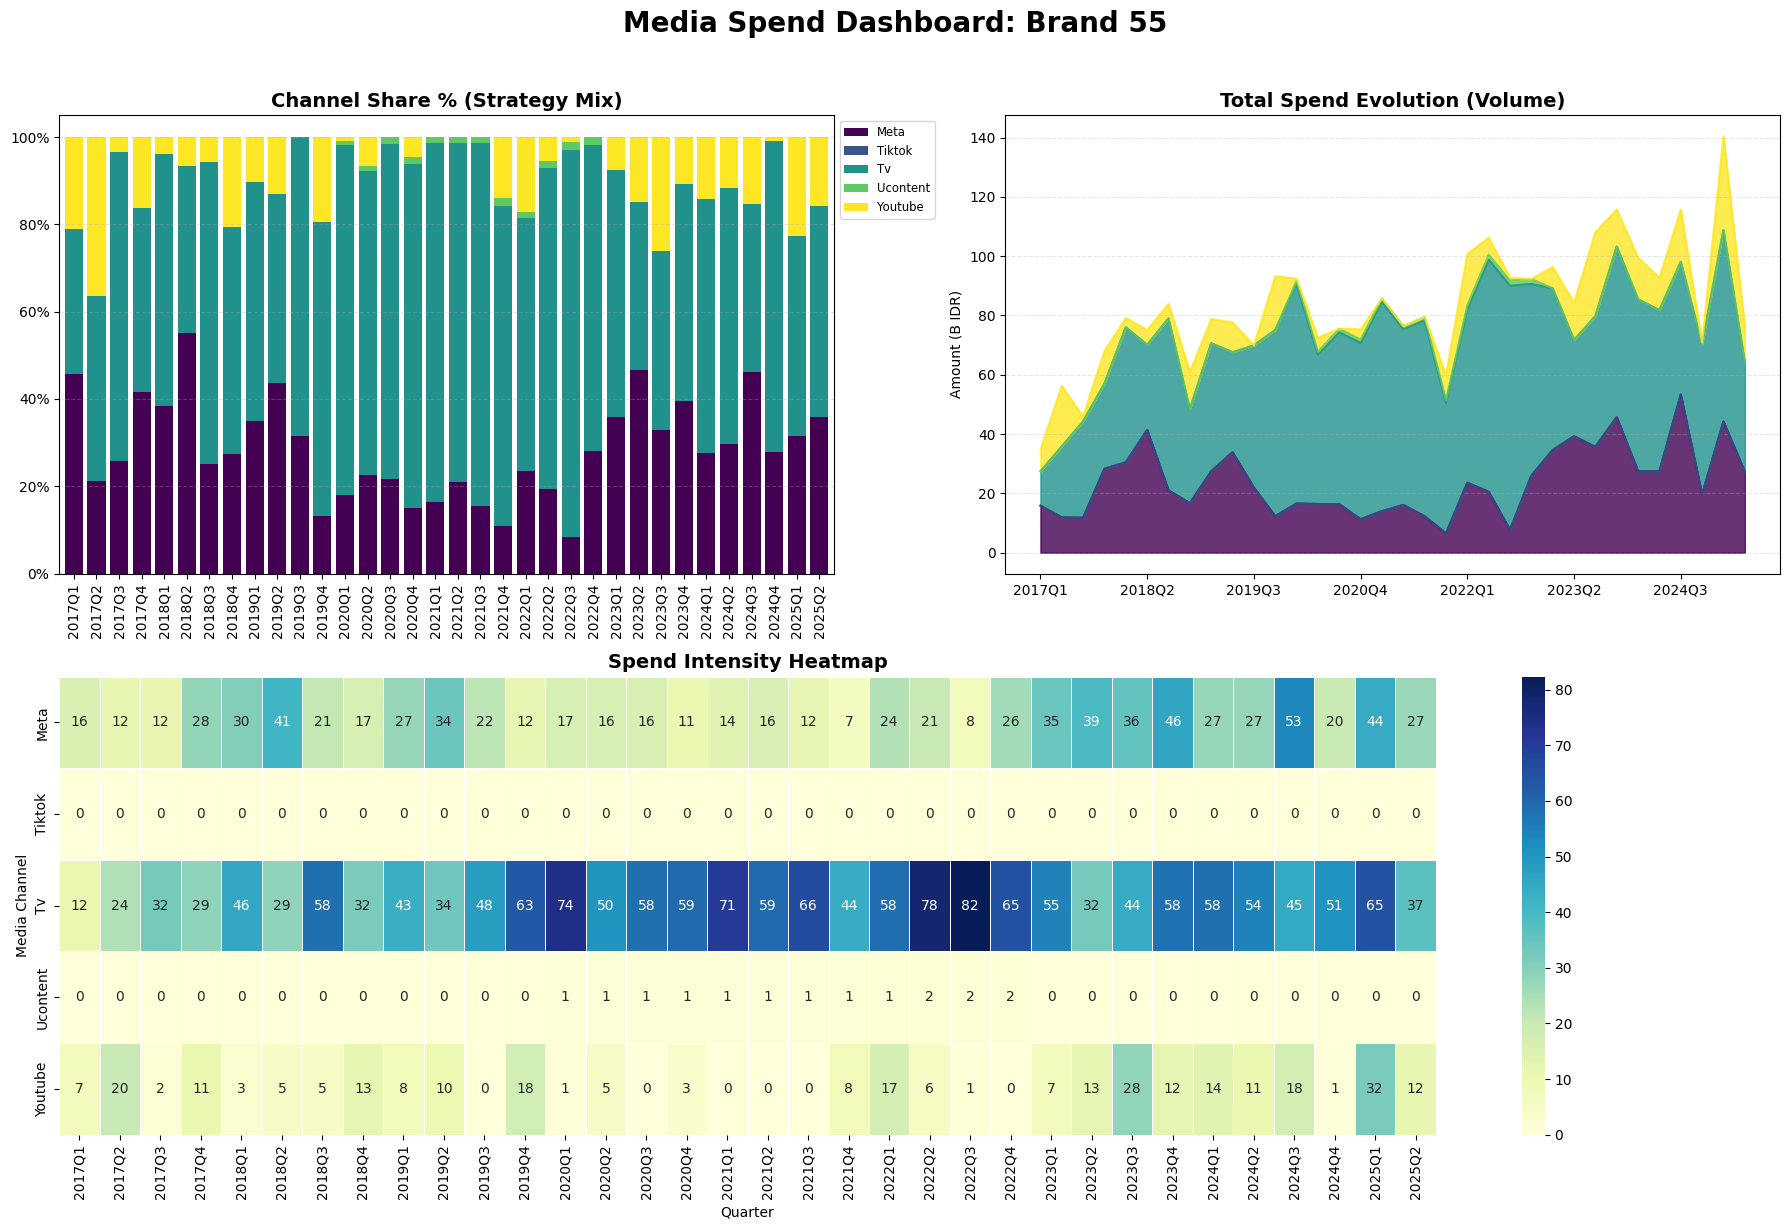

--------------------------------------------------------------------------------


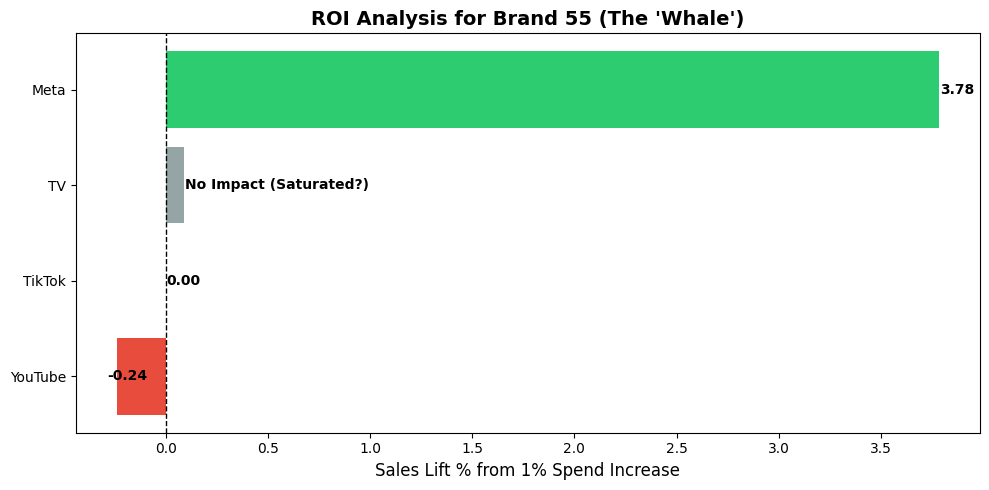

In [50]:
spend_cols = [c for c in df_pivot.columns if c in ['meta', 'tiktok', 'tv', 'ucontent','youtube']] # Ensure matches your column names

# Sum spend for each brand across all time
brand_totals = df_pivot.groupby('brand')[spend_cols].sum()
brand_totals['Total_Investment'] = brand_totals.sum(axis=1)

# Get the name of the #1 Spender
top_spender_name = brand_totals['Total_Investment'].idxmax()
top_spender_value = brand_totals['Total_Investment'].max()

print(f"--- Analysis for Top Spender: {top_spender_name} ---")
print(f"Total Investment: ${top_spender_value:,.0f}")
spending_chart_generator(top_spender_name)
# 2. Filter data for ONLY this brand
whale_df = df_pivot[df_pivot['brand'] == top_spender_name].copy()

# 3. Run the "Deep Dive" Regression
# We remove C(brand) because we are looking at only 1 brand now
formula = "ln_Sales ~ ln_meta + ln_tiktok + ln_tv + ln_youtube"
model_whale = smf.ols(formula=formula, data=whale_df).fit()

# 4. Extract Results
results = pd.DataFrame({
    'Channel': ['Meta', 'TikTok', 'TV', 'YouTube'],
    'Elasticity': [model_whale.params.get('ln_meta', 0), 
                   model_whale.params.get('ln_tiktok', 0),
                   model_whale.params.get('ln_tv', 0),
                   model_whale.params.get('ln_youtube', 0)],
    'P_Value': [model_whale.pvalues.get('ln_meta', 1), 
                model_whale.pvalues.get('ln_tiktok', 1),
                model_whale.pvalues.get('ln_tv', 1),
                model_whale.pvalues.get('ln_youtube', 1)]
})

# Add logic for coloring
results['Significance'] = results['P_Value'] < 0.10  # Using 90% confidence for single-brand models
results['Color'] = results.apply(lambda x: '#2ecc71' if (x['Significance'] and x['Elasticity'] > 0) 
                                 else ('#e74c3c' if (x['Significance'] and x['Elasticity'] < 0) 
                                 else '#95a5a6'), axis=1)

# Sort for plotting
results = results.sort_values('Elasticity', ascending=True)

# --- Visualization ---
plt.figure(figsize=(10, 5))

# Plot Bars
bars = plt.barh(results['Channel'], results['Elasticity'], color=results['Color'])

# Decorate
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.title(f"ROI Analysis for {top_spender_name} (The 'Whale')", fontsize=14, fontweight='bold')
plt.xlabel("Sales Lift % from 1% Spend Increase", fontsize=12)

# Add Labels
for bar, row in zip(bars, results.itertuples()):
    width = bar.get_width()
    label_x = width + 0.005 if width >= 0 else width - 0.05
    
    if not row.Significance:
        txt = "No Impact (Saturated?)"
    else:
        txt = f"{row.Elasticity:.2f}"
        
    plt.text(label_x, bar.get_y() + bar.get_height()/2, txt, 
             va='center', fontweight='bold', color='black')

plt.tight_layout()
plt.show()

# Print the warning if results are weak
if results['Significance'].sum() == 0:
    print("\n⚠️ WARNING: No channels are statistically significant.")
    print("This often means this brand has hit 'Saturation' (spending more adds no value).")
    print("Recommendation: REDUCE budget to test if sales stay flat.")

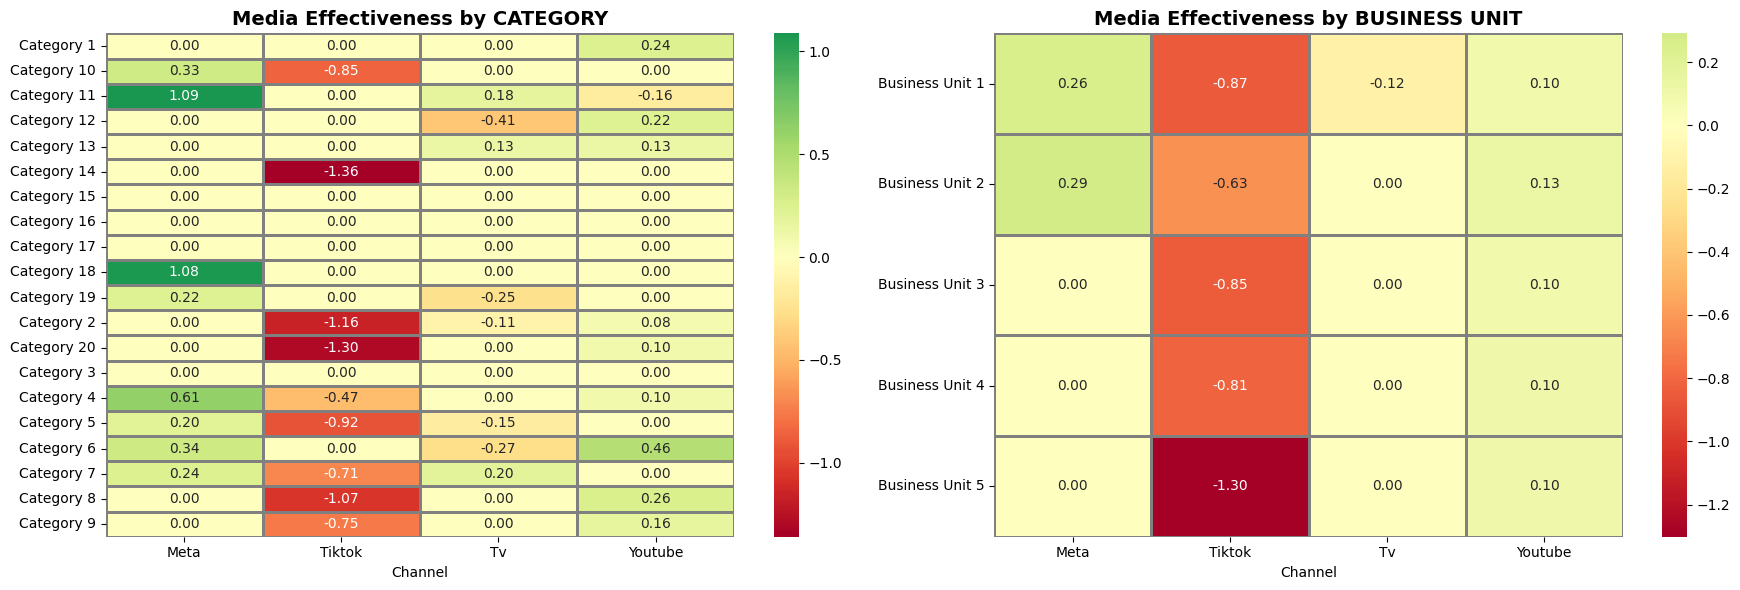

In [51]:
df_pivot = df_non_dup.pivot_table(
    index=['monthyear', 'brand', 'business_level', 'category'], 
    columns='variable', 
    values='Amount', 
    aggfunc='sum'
).reset_index().fillna(0)

# Clean column names
df_pivot.columns = [c.replace('Spend on ', '').replace(' ', '_') for c in df_pivot.columns]

# Log transform (adding +1 to avoid log(0))
channels = ['meta', 'tiktok', 'tv', 'youtube'] # Add 'ucontent' if present
for col in ['Sales'] + channels:
    if col in df_pivot.columns:
        df_pivot[f'ln_{col}'] = np.log1p(df_pivot[col])

# --- Function to Run Regression by Group ---
def get_roi_by_group(df, group_col):
    results = []
    groups = df[group_col].unique()
    
    for group in groups:
        group_data = df[df[group_col] == group].copy()
        
        # Need enough data points
        if len(group_data) < 10:
            continue
            
        try:
            # Formula: Sales ~ Channels (No Brand FE here, we want the Group's aggregate behavior)
            formula = "ln_Sales ~ " + " + ".join([f"ln_{c}" for c in channels])
            model = smf.ols(formula=formula, data=group_data).fit()
            
            for channel in channels:
                coef = model.params.get(f"ln_{channel}", 0)
                pval = model.pvalues.get(f"ln_{channel}", 1.0)
                
                # Filter: If P-value > 0.1, treat as Noise (0.0)
                roi = coef if pval < 0.1 else 0
                
                results.append({
                    group_col: group,
                    'Channel': channel.capitalize(),
                    'ROI': roi
                })
        except:
            continue
            
    return pd.DataFrame(results)

# 2. Run Analysis
df_category_roi = get_roi_by_group(df_pivot, 'category')
df_bu_roi = get_roi_by_group(df_pivot, 'business_level')

# 3. Visualization: Two Heatmaps
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Heatmap 1: Category Effectiveness
cat_pivot = df_category_roi.pivot(index='category', columns='Channel', values='ROI')
sns.heatmap(cat_pivot, annot=True, fmt='.2f', cmap='RdYlGn', center=0, ax=axes[0], linewidths=1, linecolor='gray')
axes[0].set_title('Media Effectiveness by CATEGORY', fontsize=14, fontweight='bold')
axes[0].set_ylabel('')

# Heatmap 2: BU Effectiveness
bu_pivot = df_bu_roi.pivot(index='business_level', columns='Channel', values='ROI')
sns.heatmap(bu_pivot, annot=True, fmt='.2f', cmap='RdYlGn', center=0, ax=axes[1], linewidths=1, linecolor='gray')
axes[1].set_title('Media Effectiveness by BUSINESS UNIT', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

--- Model Accuracy Report ---
R-Squared (Explained Variance): 12.91% (Target: >70%)
sMAPE (Error Rate):             138.15% (Target: <15-20%)


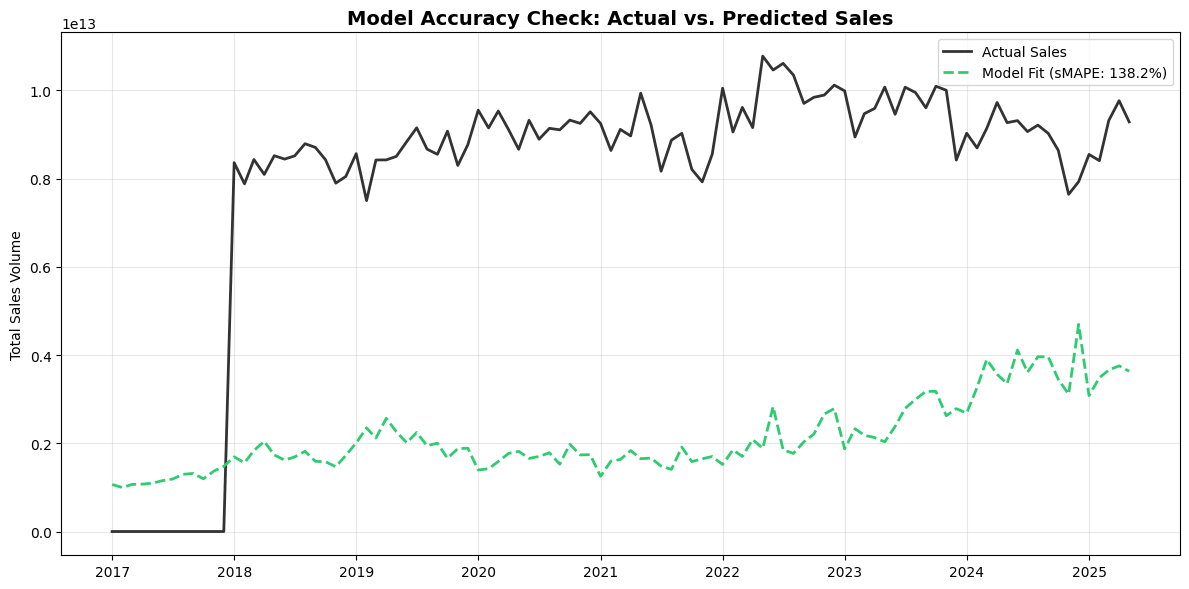

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Get Predictions & Reverse Log Transform
# (Assuming 'model' is your fitted OLS object from previous steps)
df_pivot['Predicted_Log_Sales'] = model.predict(df_pivot)

# Convert back from Log scale to Real numbers ($)
df_pivot['Predicted_Sales'] = np.expm1(df_pivot['Predicted_Log_Sales']) 
df_pivot['Actual_Sales'] = np.expm1(df_pivot['ln_Sales'])

# 2. Calculate sMAPE Manually
# Formula: |Actual - Pred| / ((|Actual| + |Pred|) / 2)
def calculate_smape(actual, predicted):
    numerator = np.abs(actual - predicted)
    denominator = (np.abs(actual) + np.abs(predicted)) / 2
    return np.mean(numerator / denominator) * 100

smape_score = calculate_smape(df_pivot['Actual_Sales'], df_pivot['Predicted_Sales'])
r_squared = model.rsquared

# 3. The Report Card
print(f"--- Model Accuracy Report ---")
print(f"R-Squared (Explained Variance): {r_squared:.2%} (Target: >70%)")
print(f"sMAPE (Error Rate):             {smape_score:.2f}% (Target: <15-20%)")

# 4. Visualization: Actual vs Predicted
plt.figure(figsize=(12, 6))

# Aggregate by Date to see the Global Trend
global_trend = df_pivot.groupby('monthyear')[['Actual_Sales', 'Predicted_Sales']].sum().reset_index()

plt.plot(global_trend['monthyear'], global_trend['Actual_Sales'], 
         label='Actual Sales', color='black', linewidth=2, alpha=0.8)
plt.plot(global_trend['monthyear'], global_trend['Predicted_Sales'], 
         label=f'Model Fit (sMAPE: {smape_score:.1f}%)', color='#2ecc71', linestyle='--', linewidth=2)

plt.title(f'Model Accuracy Check: Actual vs. Predicted Sales', fontsize=14, fontweight='bold')
plt.ylabel('Total Sales Volume')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

--- Model Health Check: Brand 55 ---
1. R-Squared (Fit):      10.75%  (Target: >75%)
2. sMAPE (Error):        157.10% (Target: <20%)
3. Durbin-Watson:        0.26   (Target: 1.5 - 2.5)
   ⚠️  Warning: Positive Autocorrelation. (Model is missing 'Momentum/Lag')


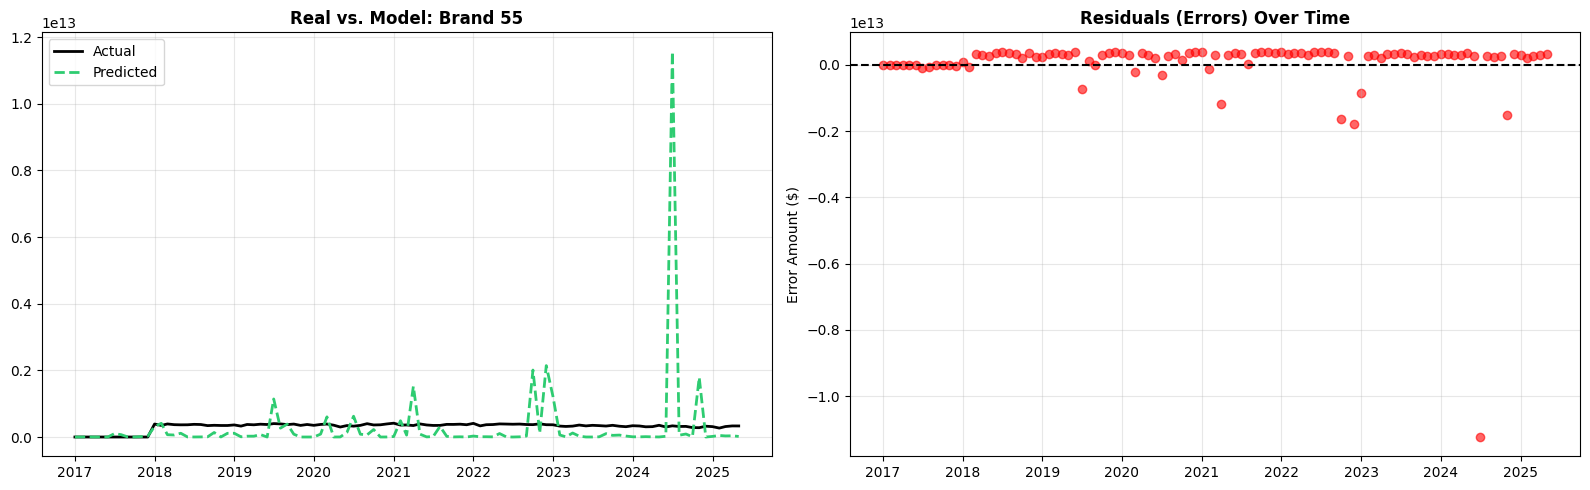

In [53]:
from statsmodels.stats.stattools import durbin_watson
whale_df['Predicted_Log'] = model_whale.predict(whale_df)
whale_df['Predicted_Sales'] = np.expm1(whale_df['Predicted_Log']) # Reverse Log
whale_df['Actual_Sales'] = np.expm1(whale_df['ln_Sales'])         # Reverse Log

# 2. Calculate sMAPE (Error Rate)
def calculate_smape(actual, predicted):
    return 100 * np.mean(2 * np.abs(actual - predicted) / (np.abs(actual) + np.abs(predicted)))

smape = calculate_smape(whale_df['Actual_Sales'], whale_df['Predicted_Sales'])
r2 = model_whale.rsquared
dw_score = durbin_watson(model_whale.resid)

# --- B. Print the Report Card ---
print(f"--- Model Health Check: {top_spender_name} ---")
print(f"1. R-Squared (Fit):      {r2:.2%}  (Target: >75%)")
print(f"2. sMAPE (Error):        {smape:.2f}% (Target: <20%)")
print(f"3. Durbin-Watson:        {dw_score:.2f}   (Target: 1.5 - 2.5)")

# Interpretation of DW
if dw_score < 1.5:
    print("   ⚠️  Warning: Positive Autocorrelation. (Model is missing 'Momentum/Lag')")
elif dw_score > 2.5:
    print("   ⚠️  Warning: Negative Autocorrelation. (Model is oscillating wildly)")
else:
    print("   ✅  Pass: Residuals look random.")

# --- C. Visual Evaluation ---
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Actual vs Predicted (Does it track reality?)
axes[0].plot(whale_df['monthyear'], whale_df['Actual_Sales'], label='Actual', color='black', linewidth=2)
axes[0].plot(whale_df['monthyear'], whale_df['Predicted_Sales'], label='Predicted', color='#2ecc71', linestyle='--', linewidth=2)
axes[0].set_title(f'Real vs. Model: {top_spender_name}', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Residuals vs Time (Are errors random?)
residuals = whale_df['Actual_Sales'] - whale_df['Predicted_Sales']
axes[1].scatter(whale_df['monthyear'], residuals, alpha=0.6, color='red')
axes[1].axhline(0, color='black', linestyle='--')
axes[1].set_title('Residuals (Errors) Over Time', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Error Amount ($)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

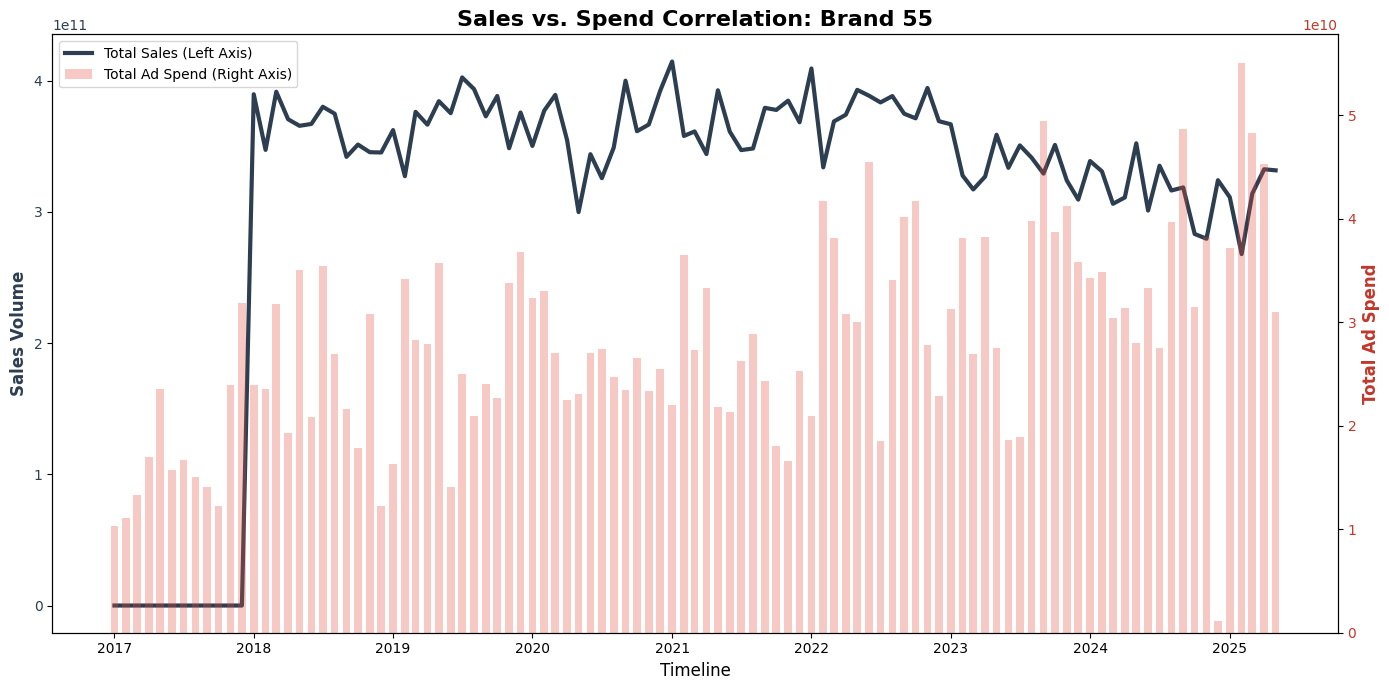

In [54]:
viz_data = whale_df.groupby('monthyear')[['Actual_Sales'] + spend_cols].sum().reset_index()

# Calculate Total Spend for the bar chart
viz_data['Total_Ad_Spend'] = viz_data[spend_cols].sum(axis=1)

# 2. Create Dual-Axis Plot
fig, ax1 = plt.subplots(figsize=(14, 7))

# --- Plot 1: Sales (The Target) ---
# We use a Line Plot on the Left Axis
sns.lineplot(data=viz_data, x='monthyear', y='Actual_Sales', 
             ax=ax1, color='#2c3e50', linewidth=3, label='Total Sales (Left Axis)')
ax1.set_ylabel('Sales Volume', fontsize=12, fontweight='bold', color='#2c3e50')
ax1.tick_params(axis='y', labelcolor='#2c3e50')
ax1.grid(False) # Turn off grid for cleanliness

# --- Plot 2: Ad Spend (The Driver) ---
# We use the Right Axis for Spend bars
ax2 = ax1.twinx()
ax2.bar(viz_data['monthyear'], viz_data['Total_Ad_Spend'], 
        color='#e74c3c', alpha=0.3, width=20, label='Total Ad Spend (Right Axis)')
ax2.set_ylabel('Total Ad Spend', fontsize=12, fontweight='bold', color='#c0392b')
ax2.tick_params(axis='y', labelcolor='#c0392b')

# 3. Add Titles and Legends
plt.title(f'Sales vs. Spend Correlation: {top_spender_name}', fontsize=16, fontweight='bold')
ax1.set_xlabel('Timeline', fontsize=12)

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
bars, bar_labels = ax2.get_legend_handles_labels()
ax1.legend(lines + bars, labels + bar_labels, loc='upper left')

plt.tight_layout()
plt.show()

c:\Users\Dell\miniconda3\envs\safe_mode\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Dell\miniconda3\envs\safe_mode\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\Dell\AppData\Local\Temp\ipykernel_17680\3100362360.py:45: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_point = subset.loc[subset['Correlation'].idxmax()]


KeyError: nan

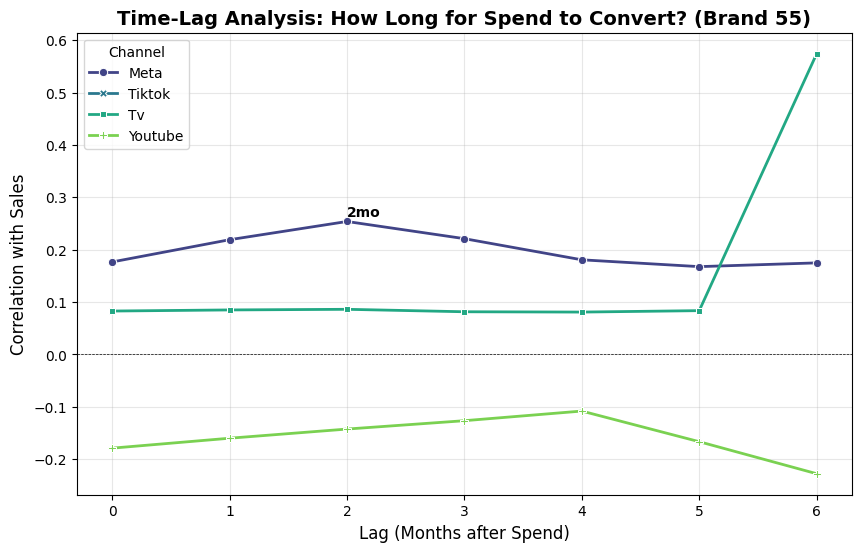

In [55]:
target_brand = top_spender_name 
max_lag = 6  # Test up to 6 months delay
channels_to_test = ['meta', 'tiktok', 'tv', 'youtube']

# 2. Calculate Cross-Correlation for each lag
lag_results = []

for lag in range(0, max_lag + 1):
    # Create a temporary dataframe to shift the spend
    temp_df = whale_df.copy()
    
    for channel in channels_to_test:
        col_name = f"ln_{channel}"
        if col_name in temp_df.columns:
            # Calculate correlation between Sales and the Shifted Spend
            # Shift(lag) means we move spend "forward" in time to match future sales
            corr = temp_df['ln_Sales'].corr(temp_df[col_name].shift(lag))
            
            lag_results.append({
                'Channel': channel.capitalize(),
                'Lag_Months': lag,
                'Correlation': corr
            })

# 3. Convert to DataFrame
df_lags = pd.DataFrame(lag_results)

# 4. Visualization: The "Lag Curve"
plt.figure(figsize=(10, 6))

# Plot lines for each channel
sns.lineplot(data=df_lags, x='Lag_Months', y='Correlation', hue='Channel', 
             style='Channel', markers=True, dashes=False, linewidth=2, palette='viridis')

plt.title(f'Time-Lag Analysis: How Long for Spend to Convert? ({target_brand})', fontsize=14, fontweight='bold')
plt.xlabel('Lag (Months after Spend)', fontsize=12)
plt.ylabel('Correlation with Sales', fontsize=12)
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.grid(True, alpha=0.3)
plt.xticks(range(0, max_lag + 1))

# Find the Peak for each channel to annotate
for channel in df_lags['Channel'].unique():
    subset = df_lags[df_lags['Channel'] == channel]
    max_point = subset.loc[subset['Correlation'].idxmax()]
    
    # Only annotate if correlation is meaningful (>0.1)
    if max_point['Correlation'] > 0.1:
        plt.text(max_point['Lag_Months'], max_point['Correlation'] + 0.01, 
                 f"{max_point['Lag_Months']}mo", 
                 fontweight='bold', color='black')

plt.tight_layout()
plt.show()

In [ ]:
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Apply the "Best Lags" discovered in your chart
# We shift the spend column 'down' by X rows to match future sales
whale_df_lagged = whale_df.copy().sort_values('monthyear')

# Meta peaks at 2 Months
whale_df_lagged['ln_meta_lag2'] = whale_df_lagged['ln_meta'].shift(2)

# TV peaks at 6 Months (Long-term brand building)
whale_df_lagged['ln_tv_lag6'] = whale_df_lagged['ln_tv'].shift(6)

# YouTube & TikTok (Keep at 0 or try 1, but chart showed low/neg correlation)
whale_df_lagged['ln_youtube_lag0'] = whale_df_lagged['ln_youtube'] 
whale_df_lagged['ln_tiktok_lag0'] = whale_df_lagged['ln_tiktok']

# 2. Drop the NaNs created by shifting (We lose the first 6 months of data)
whale_df_lagged = whale_df_lagged.dropna(subset=['ln_meta_lag2', 'ln_tv_lag6'])

# 3. Run the New "Time-Aware" Model
# Note: We use the LAGGED columns now
formula_lag = "ln_Sales ~ ln_meta_lag2 + ln_tv_lag6 + ln_youtube_lag0 + ln_tiktok_lag0"
model_lag = smf.ols(formula=formula_lag, data=whale_df_lagged).fit()

# 4. Check Accuracy (Did R-squared go up?)
print(f"--- Model V3 (Time-Lagged) Results ---")
print(f"New R-Squared: {model_lag.rsquared:.2%} (Compare to previous V2)")
print("\n--- New Coefficients (ROI) ---")
print(model_lag.params)

--- Model V3 (Time-Lagged) Results ---
New R-Squared: 39.12% (Compare to previous V2)

--- New Coefficients (ROI) ---
Intercept         -209.803811
ln_meta_lag2         2.539844
ln_tv_lag6           7.580782
ln_youtube_lag0     -0.041791
ln_tiktok_lag0       0.000000
dtype: float64


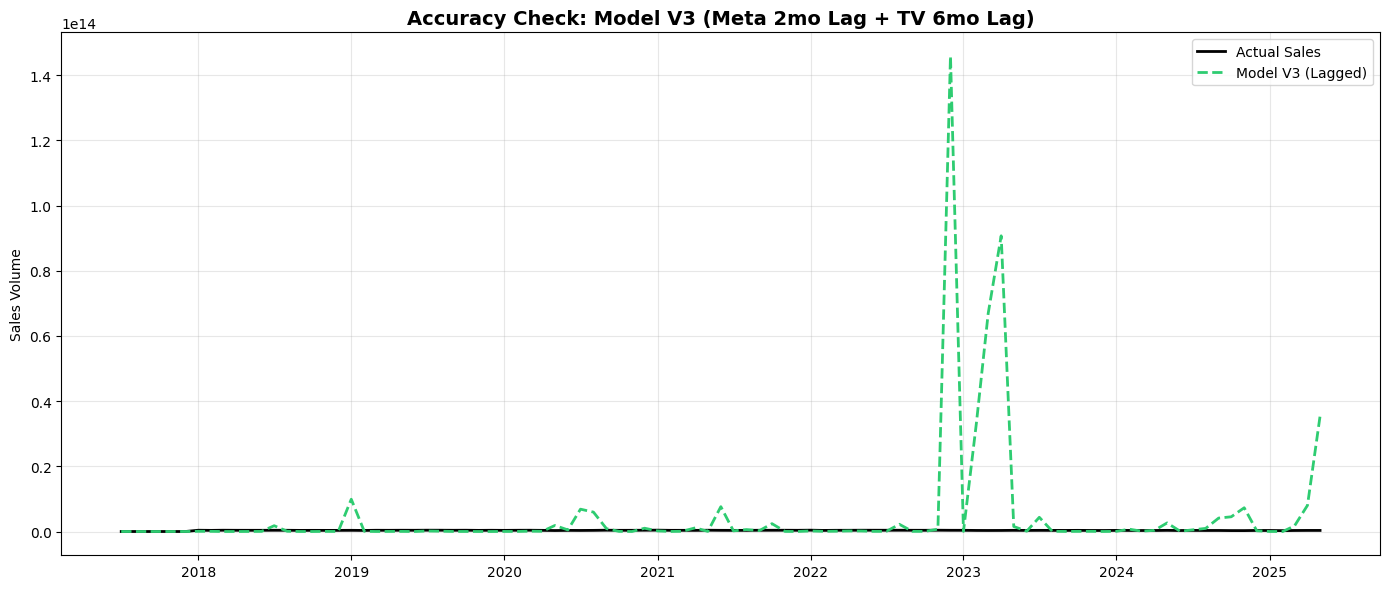

In [ ]:
# 1. Get New Predictions
whale_df_lagged['Predicted_Log_V3'] = model_lag.predict(whale_df_lagged)
whale_df_lagged['Pred_Sales_V3'] = np.expm1(whale_df_lagged['Predicted_Log_V3'])
whale_df_lagged['Act_Sales'] = np.expm1(whale_df_lagged['ln_Sales'])

# 2. Plot
plt.figure(figsize=(14, 6))

# Plot Actual Sales
plt.plot(whale_df_lagged['monthyear'], whale_df_lagged['Act_Sales'], 
         label='Actual Sales', color='black', linewidth=2)

# Plot NEW Lagged Prediction
plt.plot(whale_df_lagged['monthyear'], whale_df_lagged['Pred_Sales_V3'], 
         label='Model V3 (Lagged)', color='#2ecc71', linestyle='--', linewidth=2)

plt.title(f'Accuracy Check: Model V3 (Meta 2mo Lag + TV 6mo Lag)', fontsize=14, fontweight='bold')
plt.ylabel('Sales Volume')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

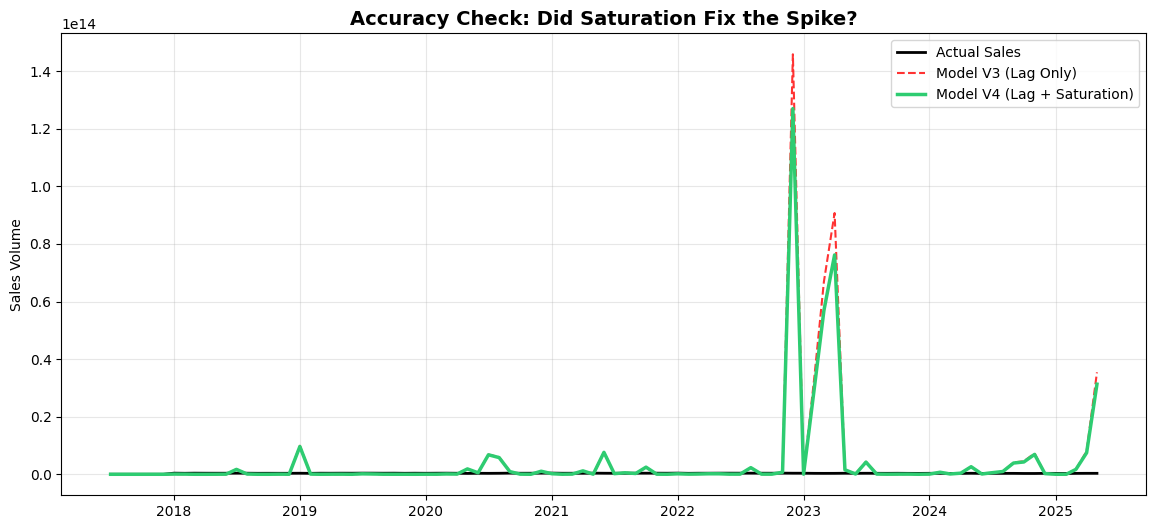

Model V4 R-Squared: 39.84%


In [ ]:
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# 1. Define a Saturation Function (Hyperbolic Tangent)
# It forces the curve to flatten out once it hits a certain "Cap"
def saturate(series, saturation_point):
    return np.tanh(series / saturation_point)

# 2. Prepare Data (Reuse the lagged data)
whale_saturated = whale_df_lagged.copy()

# 3. Apply Saturation to the High-Spend Channels
# We set the "Cap" at the 90th percentile of historical spend.
# This tells the model: "Any spend above the top 10% is probably wasted."
sat_level_meta = whale_saturated['ln_meta_lag2'].quantile(0.90)
sat_level_tv = whale_saturated['ln_tv_lag6'].quantile(0.90)

whale_saturated['meta_sat'] = saturate(whale_saturated['ln_meta_lag2'], sat_level_meta)
whale_saturated['tv_sat'] = saturate(whale_saturated['ln_tv_lag6'], sat_level_tv)

# Keep low-spend channels as is (or saturate them too if needed)
whale_saturated['yt_sat'] = whale_saturated['ln_youtube_lag0']
whale_saturated['tiktok_sat'] = whale_saturated['ln_tiktok_lag0']

# 4. Run Model V4 (Lagged + Saturated)
formula_sat = "ln_Sales ~ meta_sat + tv_sat + yt_sat + tiktok_sat"
model_sat = smf.ols(formula=formula_sat, data=whale_saturated).fit()

# 5. Visualize the Fix
whale_saturated['Pred_Log_V4'] = model_sat.predict(whale_saturated)
whale_saturated['Pred_Sales_V4'] = np.expm1(whale_saturated['Pred_Log_V4'])

plt.figure(figsize=(14, 6))
# Actual Sales
plt.plot(whale_saturated['monthyear'], whale_saturated['Act_Sales'], 
         label='Actual Sales', color='black', linewidth=2)
# Old "Stupid" Prediction (V3)
plt.plot(whale_saturated['monthyear'], whale_saturated['Pred_Sales_V3'], 
         label='Model V3 (Lag Only)', color='red', linestyle='--', alpha=0.8)
# New "Smart" Prediction (V4)
plt.plot(whale_saturated['monthyear'], whale_saturated['Pred_Sales_V4'], 
         label='Model V4 (Lag + Saturation)', color='#2ecc71', linewidth=2.5)

plt.title('Accuracy Check: Did Saturation Fix the Spike?', fontsize=14, fontweight='bold')
plt.ylabel('Sales Volume')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Model V4 R-Squared: {model_sat.rsquared:.2%}")

In [ ]:
df_pivot

variable           Sales  Spend on meta  Spend on tiktok   Spend on tv  \
monthyear                                                                
2017-01-01  0.000000e+00   1.741069e+09              0.0  3.924506e+09   
2017-02-01  0.000000e+00   5.595172e+09              0.0  4.072843e+09   
2017-03-01  0.000000e+00   8.504554e+09              0.0  3.573264e+09   
2017-04-01  0.000000e+00   3.998741e+09              0.0  5.116979e+09   
2017-05-01  0.000000e+00   3.372289e+09              0.0  1.392929e+10   
...                  ...            ...              ...           ...   
2025-01-01  3.111888e+11   1.234846e+10              0.0  1.931752e+10   
2025-02-01  2.678593e+11   1.680870e+10              0.0  2.353797e+10   
2025-03-01  3.139762e+11   1.510010e+10              0.0  2.170861e+10   
2025-04-01  3.324821e+11   1.502753e+10              0.0  2.278057e+10   
2025-05-01  3.316757e+11   1.225843e+10              0.0  1.415132e+10   

variable    Spend on ucontent  Spend on youtube  
monthyear                                        
2017-01-01                0.0      4.680969e+09  
2017-02-01                0.0      1.413716e+09  
2017-03-01                0.0      1.193804e+09  
2017-04-01                0.0      7.853975e+09  
2017-05-01                0.0      6.283180e+09  
...                       ...               ...  
2025-01-01                0.0      5.526057e+09  
2025-02-01                0.0      1.469636e+10  
2025-03-01                0.0      1.144638e+10  
2025-04-01                0.0      7.428918e+09  
2025-05-01                0.0      4.581661e+09  

[101 rows x 6 columns]

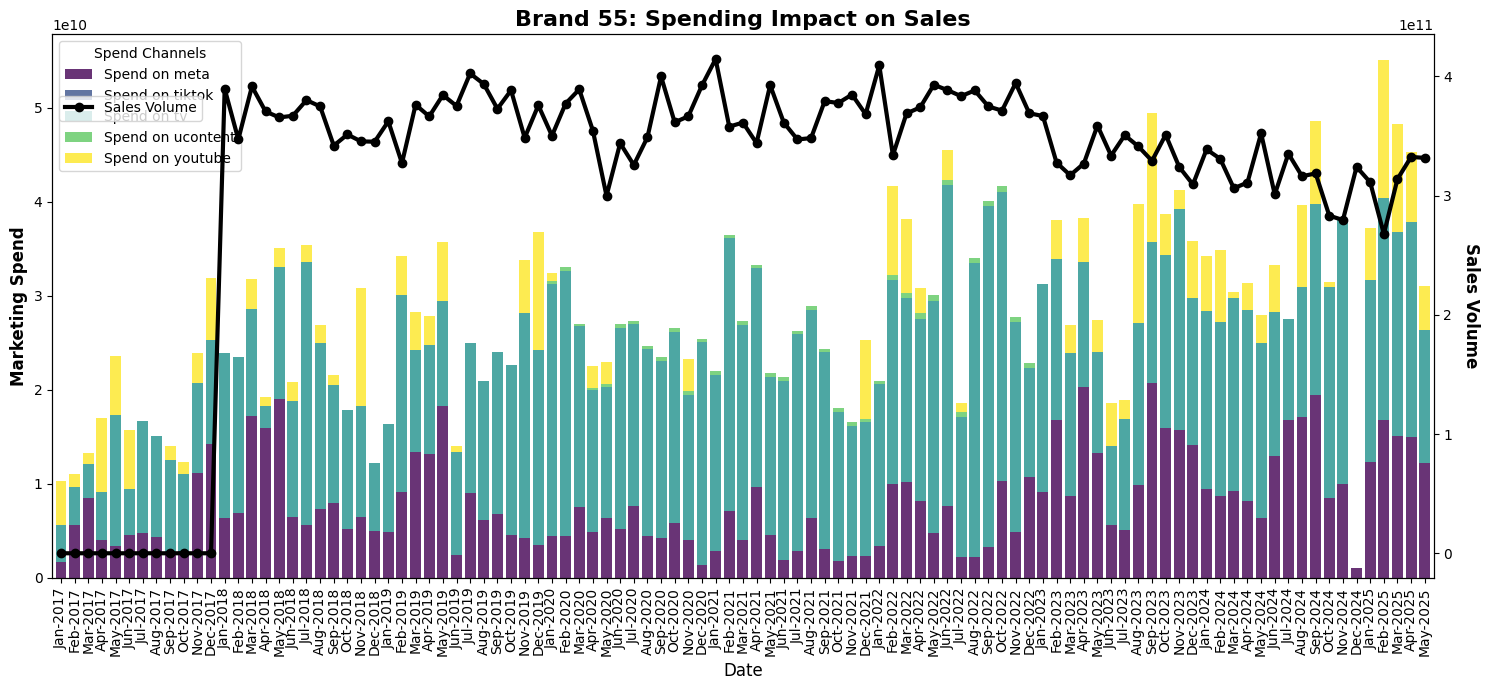

In [ ]:
brand_name = "Brand 55"

df_pivot = df_non_dup[df_non_dup['brand'] == brand_name].pivot_table(
    index='monthyear', 
    columns='variable', 
    values='Amount', 
    aggfunc='sum'
).fillna(0)
df_pivot.index = pd.to_datetime(df_pivot.index)
df_pivot = df_pivot.sort_index() # Sort by date
# Then format
df_pivot.index = df_pivot.index.strftime('%b-%Y')
# Ensure the index is treated as a string for cleaner x-axis labels if needed
# df_pivot.index = df_pivot.index.astype(str) 

# 3. Identify your columns automatically
sales_col = 'Sales'
# Grab all columns that start with "Spend"
spend_cols = [c for c in df_pivot.columns if 'Spend' in c]

# 4. Plotting
fig, ax1 = plt.subplots(figsize=(15, 7))

# --- Stacked Bar (Spending) ---
df_pivot[spend_cols].plot(
    kind='bar', 
    stacked=True, 
    ax=ax1, 
    colormap='viridis', 
    width=0.8,
    alpha=0.8
)
ax1.set_ylabel('Marketing Spend', fontsize=12, fontweight='bold')
ax1.set_xlabel('Date', fontsize=12)
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1), title="Spend Channels")

# --- Line Chart (Sales) ---
ax2 = ax1.twinx()
# We use range(len(df_pivot)) to align the line points with the bars
ax2.plot(
    range(len(df_pivot)), 
    df_pivot[sales_col], 
    color='black', 
    linewidth=3, 
    marker='o', 
    label='Sales Volume'
)
ax2.set_ylabel('Sales Volume', fontsize=12, fontweight='bold', rotation=270, labelpad=20)
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.9))

plt.title(f'{brand_name}: Spending Impact on Sales', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
import statsmodels.api as sm
df_model = df_non_dup.pivot_table(
    index='monthyear', 
    columns='variable', 
    values='Amount', 
    aggfunc='sum'
).fillna(0)

# Define Target (y) and Features (X)
target_col = 'Sales'
feature_cols = [c for c in df_model.columns if 'Spend' in c]

X = df_model[feature_cols]
y = df_model[target_col]

# 2. ADD CONSTANT (Crucial for Statsmodels OLS)
# unlike sklearn, statsmodels requires you to explicitly add the intercept
X = sm.add_constant(X)

# 3. FIT OLS MODEL
model_ols = sm.OLS(y, X).fit()

# 4. PRINT SUMMARY
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     11.64
Date:                Thu, 18 Dec 2025   Prob (F-statistic):           8.75e-09
Time:                        10:52:48   Log-Likelihood:                -3021.0
No. Observations:                 101   AIC:                             6054.
Df Residuals:                      95   BIC:                             6070.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               3.49e+12   9.66e+1

In [ ]:
import pandas as pd
import statsmodels.api as sm

# 1. Filter Data
target_brand = "Brand 55"
df = df_non_dup[df_non_dup['brand'] == target_brand].copy()

# 2. Pivot to Wide Format
df_model = df.pivot_table(
    index='monthyear', 
    columns='variable', 
    values='Amount', 
    aggfunc='sum'
).fillna(0)

# --- NEW STEP: ADD SEASONALITY ---
# Extract the month number (1=Jan, 2=Feb...) from the index
df_model.index = pd.to_datetime(df_model.index)
df_model['Month'] = df_model.index.month

# Create "Dummy Variables" for the months
# This creates columns like "Month_1", "Month_2", etc.
month_dummies = pd.get_dummies(df_model['Month'], prefix='Month', drop_first=True)
# drop_first=True prevents multicollinearity (if it's not Feb-Dec, it must be Jan)

# Join the spend data with the month flags
df_final = pd.concat([df_model, month_dummies], axis=1)

# 3. Define Features (Spend + Seasonality)
target_col = 'Sales'
# Grab spend columns AND the new Month columns
feature_cols = [c for c in df_final.columns if 'Spend' in c or 'Month_' in c]

X = df_final[feature_cols].astype(float)
y = df_final[target_col].astype(float)

# Add Constant for OLS
X = sm.add_constant(X)

# 4. Train & Print Summary
model_improved = sm.OLS(y, X).fit()

print(f"Old R-Squared: 0.380")
print(f"New R-Squared: {model_improved.rsquared:.3f}")
print("-" * 30)
print(model_improved.summary())

Old R-Squared: 0.380
New R-Squared: 0.310
------------------------------
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     2.540
Date:                Thu, 18 Dec 2025   Prob (F-statistic):            0.00366
Time:                        10:55:02   Log-Likelihood:                -2699.7
No. Observations:                 101   AIC:                             5431.
Df Residuals:                      85   BIC:                             5473.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [ ]:
df_model['Spend on tv_lag6'] = df_model['Spend on tv'].shift(6)

# Meta: Lag 2 (Shift data down 2 rows)
df_model['Spend on meta_lag2'] = df_model['Spend on meta'].shift(2)

# Other Channels: Keep them at Lag 0 (Immediate effect)
# (Assuming Tiktok, Youtube, etc. work instantly if not specified)

# 3. CLEAN UP
# We must drop the first 6 rows because 'Spend on tv_lag6' will be NaN 
# (we don't know what happened 6 months before the dataset started)
df_model.dropna(inplace=True)

# 4. SELECT FEATURES
target_col = 'Sales'

# We use the NEW lagged columns for TV/Meta, and the ORIGINAL columns for others
# Note: We exclude original 'Spend on tv' and 'Spend on meta' to avoid confusion (multicollinearity)
feature_cols = [
    'Spend on tv_lag6', 
    'Spend on meta_lag2'
]

# Add any other spend channels that exist (e.g., Tiktok, Youtube) at Lag 0
other_spends = [c for c in df_model.columns if 'Spend' in c 
                and c not in feature_cols 
                and c not in ['Spend on tv', 'Spend on meta']]
feature_cols.extend(other_spends)

X = df_model[feature_cols]
y = df_model[target_col]

# Ensure Numeric
X = X.astype(float)
y = y.astype(float)

# 5. RUN OLS
X = sm.add_constant(X)
model_custom_lag = sm.OLS(y, X).fit()

print(f"R-Squared with Custom Lags: {model_custom_lag.rsquared:.3f}")
print("-" * 30)
print(model_custom_lag.summary())

R-Squared with Custom Lags: 0.338
------------------------------
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     10.72
Date:                Thu, 18 Dec 2025   Prob (F-statistic):           4.58e-07
Time:                        11:00:02   Log-Likelihood:                -2256.8
No. Observations:                  89   AIC:                             4524.
Df Residuals:                      84   BIC:                             4536.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [ ]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/72.0 MB 5.6 MB/s eta 0:00:13
   - -------------------------------------- 1.8/72.0 MB 5.3 MB/s eta 0:00:14
   - -------------------------------------- 2.9/72.0 MB 5.2 MB/s eta 0:00:14
   -- ------------------------------------- 3.9/72.0 MB 5.2 MB/s eta 0:00:14
   -- ------------------------------------- 5.0/72.0 MB 5.0 MB/s eta 0:00:14
   --- ------------------------------------ 6.3/72.0 MB 5.1 MB/s eta 0:00:13
   ---- ----------------------------------- 7.3/72.0 MB 5.3 MB/s eta 0:00:13
   ---- ----------------------------------- 8.7/72.0 MB 5.3 MB/s eta 0:00:12
   ----- ---------------------------------- 10.0/72.0 MB 5.4 MB/s eta 0:00:12
   ------ --------------------------------- 11.0/72.0 MB 5.4 MB/s eta 0:00:12
   ------ --------------------------------- 12.3/72.0 MB 5.4 MB/s eta 0:00:11
   ------- -------------------------------- 13.6/72.0 MB 5.5 MB/s eta 0:00:11
  

XGBoost Performance:
R-Squared: -5.204
MAPE: 14.9%


<Figure size 1000x600 with 0 Axes>

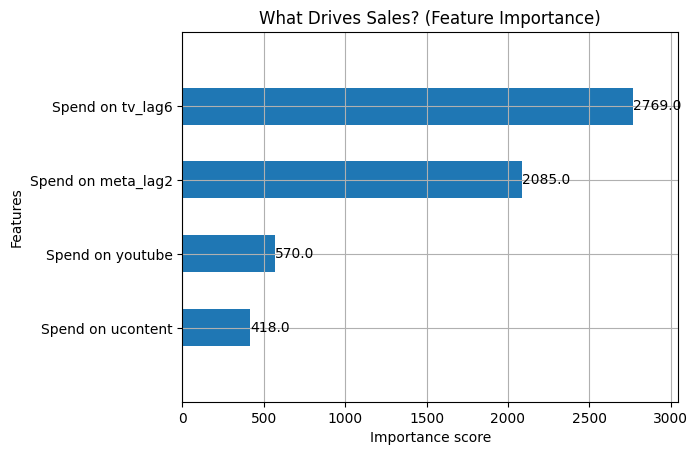

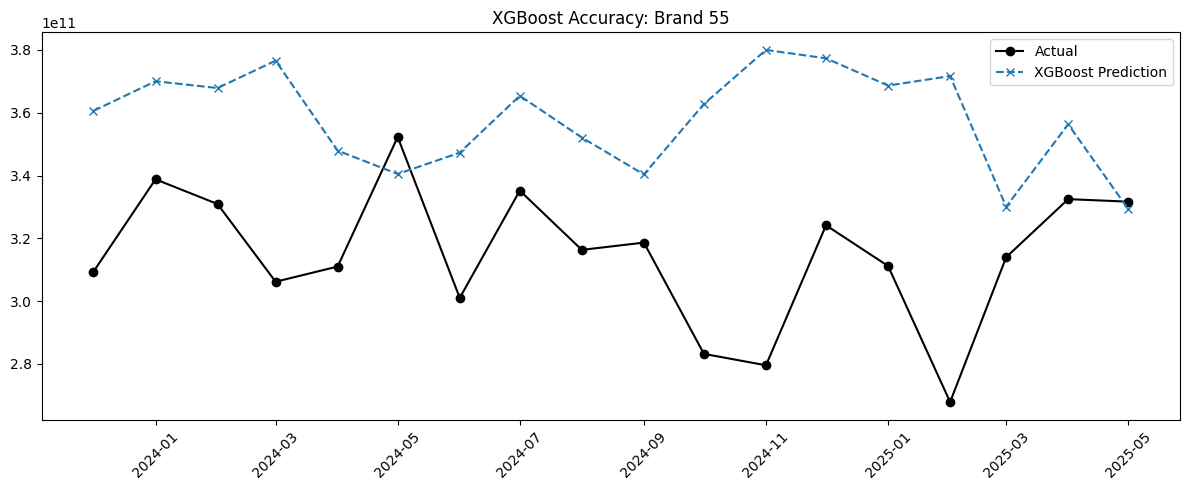

In [ ]:
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_percentage_error
target_col = 'Sales'
# using your specific lags + other current spends
feature_cols = [
    'Spend on tv_lag6', 
    'Spend on meta_lag2'
]
# Add other channels (e.g. Tiktok, Youtube) at Lag 0 if they exist
other_spends = [c for c in df_model.columns if 'Spend' in c 
                and c not in feature_cols 
                and c not in ['Spend on tv', 'Spend on meta']]
feature_cols.extend(other_spends)

X = df_model[feature_cols]
y = df_model[target_col]

# 3. TRAIN XGBOOST
# ----------------
# Split Data (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Initialize Model
# n_estimators=1000: Builds 1000 small trees
# learning_rate=0.05: Learns slowly to prevent overfitting
model_xgb = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

model_xgb.fit(X_train, y_train)

# 4. EVALUATE
# -----------
predictions = model_xgb.predict(X_test)
r2 = r2_score(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)

print(f"XGBoost Performance:")
print(f"R-Squared: {r2:.3f}")
print(f"MAPE: {mape:.1%}")

# 5. VISUALIZE FEATURE IMPORTANCE
# -------------------------------
# This replaces the "Coefficients" table from OLS.
# It shows which feature was most useful for splitting the data.
plt.figure(figsize=(10, 6))
plot_importance(model_xgb, height=0.5, importance_type='weight', title='What Drives Sales? (Feature Importance)')
plt.show()

# 6. ACTUAL VS PREDICTED PLOT
plt.figure(figsize=(12, 5))
plt.plot(y_test.index, y_test, label='Actual', color='black', marker='o')
plt.plot(y_test.index, predictions, label='XGBoost Prediction', color='#1f77b4', linestyle='--', marker='x')
plt.title(f'XGBoost Accuracy: {target_brand}')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Tuned XGBoost Performance:
R-Squared: -2.659
MAPE: 10.9%


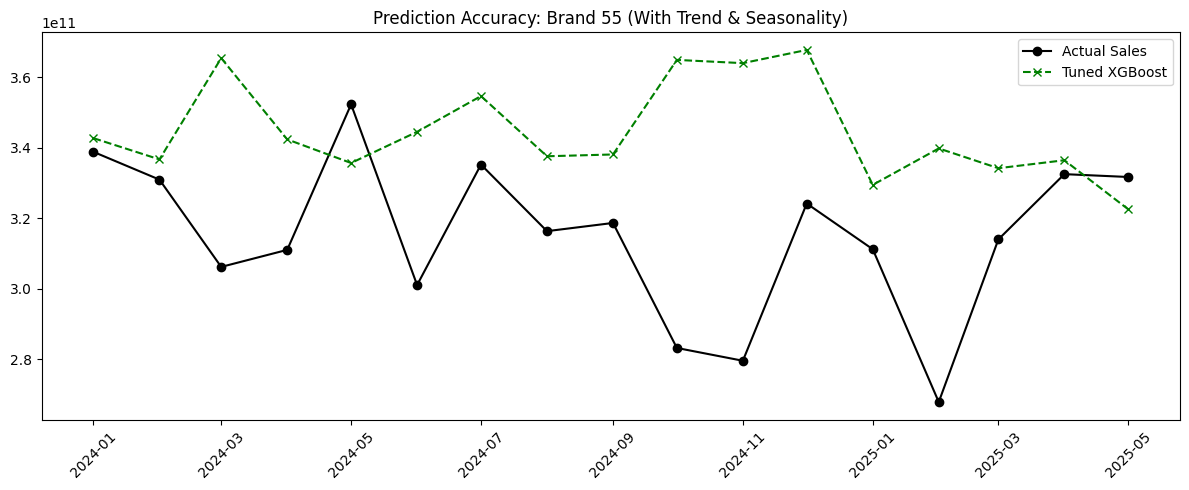

In [ ]:
df_model['Spend on tv_lag6'] = df_model['Spend on tv'].shift(6)
df_model['Spend on meta_lag2'] = df_model['Spend on meta'].shift(2)

# B. Add Time Features (XGBoost needs this to understand trends)
df_model.index = pd.to_datetime(df_model.index)
df_model['Month'] = df_model.index.month  # Captures Seasonality
df_model['Trend'] = range(len(df_model))  # Captures Growth over time

# Drop NaNs
df_model.dropna(inplace=True)

# Define Features
target_col = 'Sales'
feature_cols = [
    'Spend on tv_lag6', 
    'Spend on meta_lag2',
    'Month',
    'Trend'
]
# Add other channels at Lag 0
other_spends = [c for c in df_model.columns if 'Spend' in c 
                and c not in ['Spend on tv', 'Spend on meta', 'Spend on tv_lag6', 'Spend on meta_lag2']]
feature_cols.extend(other_spends)

X = df_model[feature_cols]
y = df_model[target_col]

# 3. TRAIN TUNED XGBOOST
# ----------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Simpler Hyperparameters to prevent overfitting
model_xgb = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,      # Reduced from 1000 to 100
    learning_rate=0.1,     # Increased slightly
    max_depth=2,           # Shallow trees to avoid memorizing noise
    subsample=0.8,         # Use only 80% of data per tree (adds randomness)
    random_state=42
)

model_xgb.fit(X_train, y_train)

# 4. EVALUATE
predictions = model_xgb.predict(X_test)
r2 = r2_score(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)

print(f"Tuned XGBoost Performance:")
print(f"R-Squared: {r2:.3f}")
print(f"MAPE: {mape:.1%}")

# 5. VISUALIZATION
plt.figure(figsize=(12, 5))
plt.plot(y_test.index, y_test, label='Actual Sales', color='black', marker='o')
plt.plot(y_test.index, predictions, label='Tuned XGBoost', color='green', linestyle='--', marker='x')
plt.title(f'Prediction Accuracy: {target_brand} (With Trend & Seasonality)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

OLS + Trend Performance:
R-Squared: -1.471
MAPE: 9.0%
------------------------------
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     11.42
Date:                Thu, 18 Dec 2025   Prob (F-statistic):           2.32e-06
Time:                        11:15:19   Log-Likelihood:                -1178.7
No. Observations:                  47   AIC:                             2367.
Df Residuals:                      42   BIC:                             2377.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

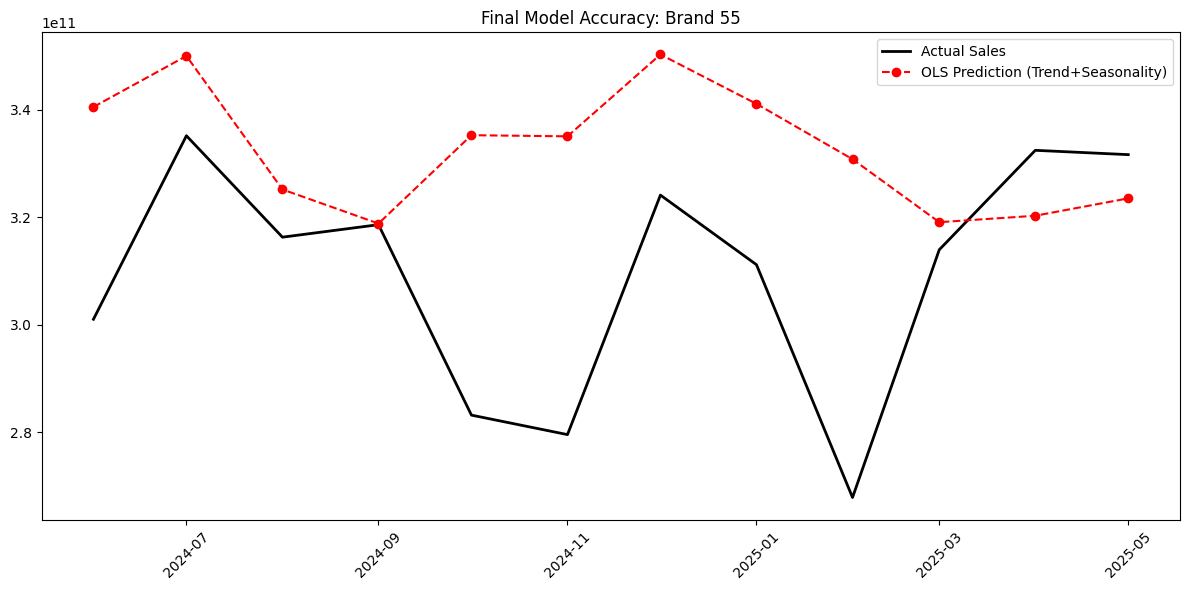

In [ ]:
df_model['Spend on tv_lag6'] = df_model['Spend on tv'].shift(6)
df_model['Spend on meta_lag2'] = df_model['Spend on meta'].shift(2)

# B. Trend (Captures year-over-year growth)
df_model['Trend'] = range(len(df_model))

# C. Seasonality (Captures monthly cycles)
df_model.index = pd.to_datetime(df_model.index)
# Create dummy variables for Month (Jan=1, Feb=0, etc.)
month_dummies = pd.get_dummies(df_model.index.month, prefix='Month', drop_first=True).astype(float)
# Join dummies to the main table. We must reset index to join cleanly, then set it back.
df_model = pd.concat([df_model, month_dummies.set_index(df_model.index)], axis=1)

# Drop NaNs from shifting
df_model.dropna(inplace=True)

# 3. DEFINE FEATURES
target_col = 'Sales'
# Select: Specific Lags + Trend + All Month columns
feature_cols = ['Spend on tv_lag6', 'Spend on meta_lag2']
# feature_cols += [c for c in df_model.columns if 'Month_' in c]

# Add other spends at Lag 0 (Optional, but recommended)
other_spends = [c for c in df_model.columns if 'Spend' in c 
                and c not in ['Spend on tv', 'Spend on meta', 'Spend on tv_lag6', 'Spend on meta_lag2']]
feature_cols.extend(other_spends)

X = df_model[feature_cols]
y = df_model[target_col]

# Ensure Numeric
X = X.astype(float)
y = y.astype(float)

# 4. TRAIN OLS (Linear Regression)
# --------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Add Constant
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test, has_constant='add')

model_ols_trend = sm.OLS(y_train, X_train_const).fit()

# 5. EVALUATE
predictions = model_ols_trend.predict(X_test_const)
r2 = r2_score(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)

print(f"OLS + Trend Performance:")
print(f"R-Squared: {r2:.3f}")
print(f"MAPE: {mape:.1%}")
print("-" * 30)
# Check coefficients to see what is driving sales
print(model_ols_trend.summary())

# 6. VISUALIZE
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Sales', color='black', linewidth=2)
plt.plot(y_test.index, predictions, label='OLS Prediction (Trend+Seasonality)', color='red', linestyle='--', marker='o')
plt.title(f'Final Model Accuracy: {target_brand}')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df_model

Sales  Spend on meta  Spend on tiktok   Spend on tv  \
monthyear                                                                
2020-01-01  3.502720e+11   4.461058e+09              0.0  2.677432e+10   
2020-02-01  3.771942e+11   4.508182e+09              0.0  2.816968e+10   
2020-03-01  3.891537e+11   7.594034e+09              0.0  1.921719e+10   
2020-04-01  3.545796e+11   4.855957e+09              0.0  1.509049e+10   
2020-05-01  2.998460e+11   6.377428e+09              0.0  1.388522e+10   
...                  ...            ...              ...           ...   
2025-01-01  3.111888e+11   1.234846e+10              0.0  1.931752e+10   
2025-02-01  2.678593e+11   1.680870e+10              0.0  2.353797e+10   
2025-03-01  3.139762e+11   1.510010e+10              0.0  2.170861e+10   
2025-04-01  3.324821e+11   1.502753e+10              0.0  2.278057e+10   
2025-05-01  3.316757e+11   1.225843e+10              0.0  1.415132e+10   

            Spend on ucontent  Spend on youtube  Month  Spend on tv_lag6  \
monthyear                                                                  
2020-01-01       3.557819e+08      7.853975e+08      1      1.591950e+10   
2020-02-01       3.557819e+08      0.000000e+00      2      1.475104e+10   
2020-03-01       2.106229e+08      0.000000e+00      3      1.726075e+10   
2020-04-01       2.106229e+08      2.356192e+09      4      1.816549e+10   
2020-05-01       3.920716e+08      2.356192e+09      5      2.394147e+10   
...                       ...               ...    ...               ...   
2025-01-01       0.000000e+00      5.526057e+09      1      1.070765e+10   
2025-02-01       0.000000e+00      1.469636e+10      2      1.377751e+10   
2025-03-01       0.000000e+00      1.144638e+10      3      2.030226e+10   
2025-04-01       0.000000e+00      7.428918e+09      4      2.239600e+10   
2025-05-01       0.000000e+00      4.581661e+09      5      2.815988e+10   

            Spend on meta_lag2  Trend  ...  Month_3  Month_4  Month_5  \
monthyear                              ...                              
2020-01-01        4.261148e+09      6  ...      0.0      0.0      0.0   
2020-02-01        3.546000e+09      7  ...      0.0      0.0      0.0   
2020-03-01        4.461058e+09      8  ...      1.0      0.0      0.0   
2020-04-01        4.508182e+09      9  ...      0.0      1.0      0.0   
2020-05-01        7.594034e+09     10  ...      0.0      0.0      1.0   
...                        ...    ...  ...      ...      ...      ...   
2025-01-01        1.002786e+10     66  ...      0.0      0.0      0.0   
2025-02-01        1.104269e+09     67  ...      0.0      0.0      0.0   
2025-03-01        1.234846e+10     68  ...      1.0      0.0      0.0   
2025-04-01        1.680870e+10     69  ...      0.0      1.0      0.0   
2025-05-01        1.510010e+10     70  ...      0.0      0.0      1.0   

            Month_6  Month_7  Month_8  Month_9  Month_10  Month_11  Month_12  
monthyear                                                                     
2020-01-01      0.0      0.0      0.0      0.0       0.0       0.0       0.0  
2020-02-01      0.0      0.0      0.0      0.0       0.0       0.0       0.0  
2020-03-01      0.0      0.0      0.0      0.0       0.0       0.0       0.0  
2020-04-01      0.0      0.0      0.0      0.0       0.0       0.0       0.0  
2020-05-01      0.0      0.0      0.0      0.0       0.0       0.0       0.0  
...             ...      ...      ...      ...       ...       ...       ...  
2025-01-01      0.0      0.0      0.0      0.0       0.0       0.0       0.0  
2025-02-01      0.0      0.0      0.0      0.0       0.0       0.0       0.0  
2025-03-01      0.0      0.0      0.0      0.0       0.0       0.0       0.0  
2025-04-01      0.0      0.0      0.0      0.0       0.0       0.0       0.0  
2025-05-01      0.0      0.0      0.0      0.0       0.0       0.0       0.0  

[65 rows x 36 columns]

Starting Recursive Loop...
Predicted 2024-12-01: 295,339,425,792
Predicted 2025-01-01: 321,383,038,976
Predicted 2025-02-01: 326,598,721,536
Predicted 2025-03-01: 315,025,457,152
Predicted 2025-04-01: 319,335,006,208
Predicted 2025-05-01: 325,639,962,624
------------------------------
Pseudolabeling R-Squared: -0.588


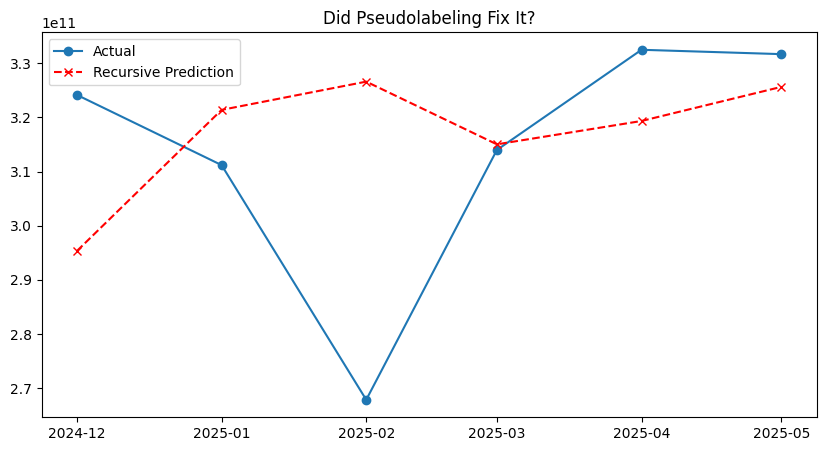

In [ ]:
df_model.index = pd.to_datetime(df_model.index)
df_model['Month'] = df_model.index.month
df_model['Trend'] = range(len(df_model))

# 2. SPLIT: TRAIN (History) vs UNLABELED (Future/Test)
# Let's pretend the last 6 months are "Unknown" that we need to pseudolabel
split_point = len(df_model) - 6
train_df = df_model.iloc[:split_point].copy()
future_df = df_model.iloc[split_point:].copy()

# 3. DEFINE MODEL
model = xgb.XGBRegressor(
    objective='reg:squarederror', n_estimators=100, learning_rate=0.05, max_depth=3
)

# 4. PSEUDOLABELING LOOP (Recursive Forecasting)
predictions = []

print("Starting Recursive Loop...")
for i in range(len(future_df)):
    # A. Feature Engineering on current Train Set
    # We must re-calculate lags every time because the "new" data (pseudolabel) changes the lags!
    
    # Create temporary copy to calculate rolling features
    current_data = pd.concat([train_df, future_df.iloc[:i]]) # History + Pseudo-labeled so far
    
    # Calculate Lags on the fly
    current_data['Spend on tv_lag6'] = current_data['Spend on tv'].shift(6)
    current_data['Spend on meta_lag2'] = current_data['Spend on meta'].shift(2)
    current_data.dropna(inplace=True)
    
    # B. Define X and y
    feature_cols = ['Spend on tv_lag6', 'Spend on meta_lag2', 'Month', 'Trend']
    X = current_data[feature_cols]
    y = current_data['Sales']
    
    # C. Train Model
    model.fit(X, y)
    
    # D. Predict NEXT Step
    # We need the features for the specific month we are predicting (future_df.iloc[i])
    # But we need to construct its lags based on the 'current_data' we just built
    
    # Grab the row we want to predict
    next_step_date = future_df.index[i]
    
    # Re-calculate lags for the WHOLE set including the row we want to predict
    # This is tricky: we append the target row (without sales) to calculate its lags
    temp_row = future_df.iloc[[i]].copy()
    temp_full = pd.concat([current_data, temp_row])
    
    temp_full['Spend on tv_lag6'] = temp_full['Spend on tv'].shift(6)
    temp_full['Spend on meta_lag2'] = temp_full['Spend on meta'].shift(2)
    
    # Extract the features for the prediction row
    X_next = temp_full.iloc[[-1]][feature_cols]
    
    # Predict
    pred_value = model.predict(X_next)[0]
    predictions.append(pred_value)
    
    # E. PSEUDOLABEL: Add prediction to 'train_df' as if it were real
    print(f"Predicted {next_step_date.date()}: {pred_value:,.0f}")
    
    # Update the future dataframe's Sales column with the prediction
    # so it can be used for the NEXT loop's lag
    future_df.iloc[i, future_df.columns.get_loc('Sales')] = pred_value
    
    # Add to training set for next iteration
    train_df = pd.concat([train_df, future_df.iloc[[i]]])

# 5. EVALUATE
actuals = df_model.iloc[split_point:]['Sales'] # The real values we hid
r2 = r2_score(actuals, predictions)
print("-" * 30)
print(f"Pseudolabeling R-Squared: {r2:.3f}")

# Plot
plt.figure(figsize=(10, 5))
plt.plot(actuals.index, actuals, label='Actual', marker='o')
plt.plot(actuals.index, predictions, label='Recursive Prediction', linestyle='--', marker='x', color='red')
plt.title("Did Pseudolabeling Fix It?")
plt.legend()
plt.show()

Ridge Regression (Simplified) Performance:
R-Squared: -2.406
MAPE: 11.3%
------------------------------
              Feature  Coefficient (Importance)
4                 Q_3              1.989269e+09
5                 Q_4              1.672630e+09
3                 Q_2              5.454914e+05
0    Spend on tv_lag6             -4.860322e+09
2               Trend             -5.168173e+09
1  Spend on meta_lag2             -8.143630e+09


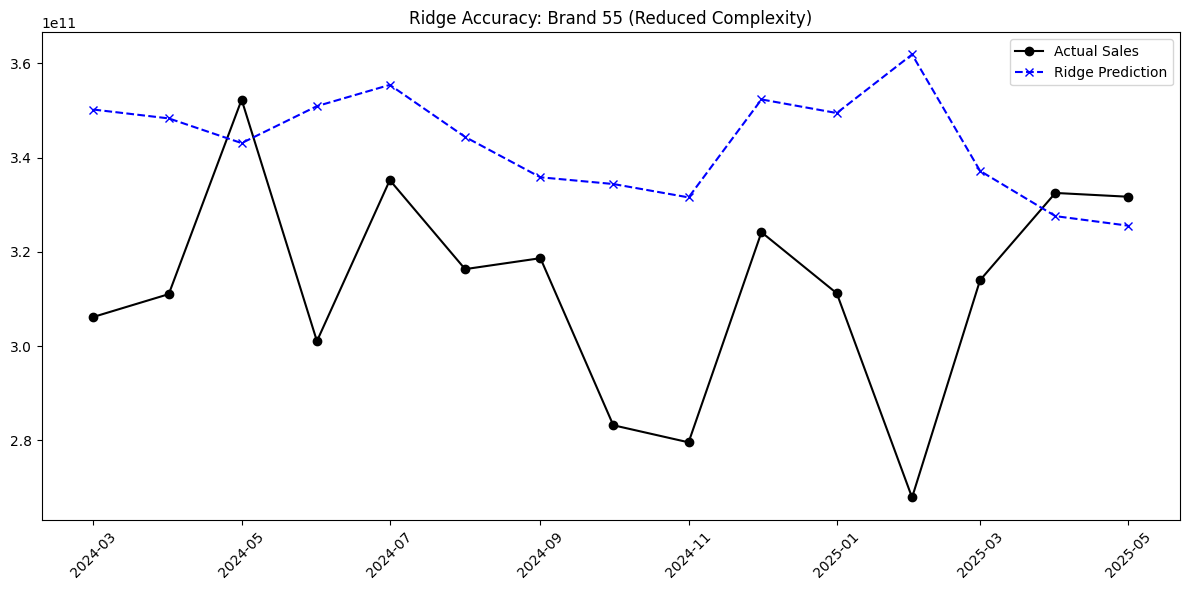

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_percentage_error
df_model['Spend on tv_lag6'] = df_model['Spend on tv'].shift(6)
df_model['Spend on meta_lag2'] = df_model['Spend on meta'].shift(2)

# B. Trend
df_model['Trend'] = range(len(df_model))

# C. Seasonality: QUARTERS instead of Months (Crucial Change)
df_model.index = pd.to_datetime(df_model.index)
df_model['Quarter'] = df_model.index.quarter
# Create dummies for Q1, Q2, Q3 (Q4 is the baseline)
quarter_dummies = pd.get_dummies(df_model['Quarter'], prefix='Q', drop_first=True)
df_model = pd.concat([df_model, quarter_dummies], axis=1)

# Drop NaNs
df_model.dropna(inplace=True)

# 3. DEFINE FEATURES
target_col = 'Sales'
# Now we have far fewer features: Trend + 2 Lags + 3 Quarter flags = ~6 features total
feature_cols = ['Spend on tv_lag6', 'Spend on meta_lag2', 'Trend']
feature_cols += [c for c in df_model.columns if 'Q_' in c]

X = df_model[feature_cols]
y = df_model[target_col]

# 4. TRAIN RIDGE REGRESSION
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# SCALE DATA: Ridge requires data to be on the same scale (0-1) to work correctly
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Ridge
# alpha=1.0 is the "penalty" strength. Higher alpha = simpler model (less overfitting).
model_ridge = Ridge(alpha=2.0) 
model_ridge.fit(X_train_scaled, y_train)

# 5. EVALUATE
predictions = model_ridge.predict(X_test_scaled)
r2 = r2_score(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)

print(f"Ridge Regression (Simplified) Performance:")
print(f"R-Squared: {r2:.3f}")
print(f"MAPE: {mape:.1%}")

# Show Coefficients (Drivers)
coef_df = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient (Importance)': model_ridge.coef_
}).sort_values(by='Coefficient (Importance)', ascending=False)
print("-" * 30)
print(coef_df)

# 6. VISUALIZE
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Sales', color='black', marker='o')
plt.plot(y_test.index, predictions, label='Ridge Prediction', color='blue', linestyle='--', marker='x')
plt.title(f'Ridge Accuracy: {target_brand} (Reduced Complexity)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Positive Regression Performance:
R-Squared: -6.562
MAPE: 14.0%
------------------------------
              Channel  ROI (Coefficient)
3   Spend on ucontent         141.334275
1  Spend on meta_lag2           7.473238
0    Spend on tv_lag6           3.942582
4    Spend on youtube           0.828953
2     Spend on tiktok           0.000000


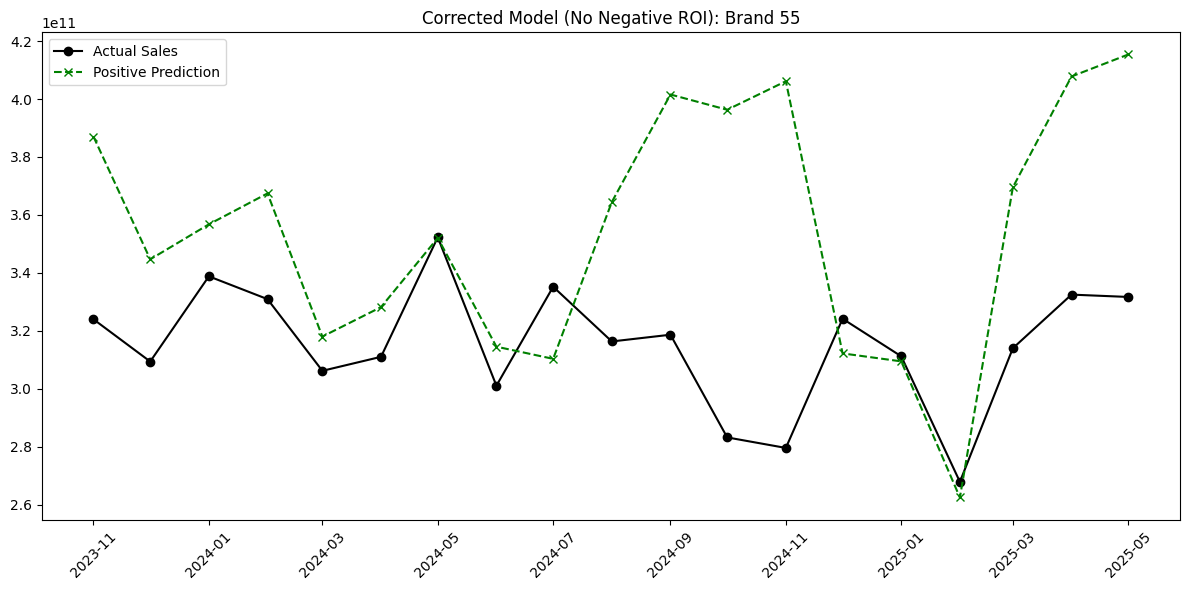

In [ ]:
from sklearn.linear_model import LinearRegression
df_model = df.pivot_table(index='monthyear', columns='variable', values='Amount', aggfunc='sum').fillna(0)

# Feature Engineering
df_model['Spend on tv_lag6'] = df_model['Spend on tv'].shift(6)
df_model['Spend on meta_lag2'] = df_model['Spend on meta'].shift(2)
df_model.dropna(inplace=True)

# 2. DEFINE FEATURES
target_col = 'Sales'
# Use the same features as before
feature_cols = ['Spend on tv_lag6', 'Spend on meta_lag2']
other_spends = [c for c in df_model.columns if 'Spend' in c 
                and c not in ['Spend on tv', 'Spend on meta', 'Spend on tv_lag6', 'Spend on meta_lag2']]
feature_cols.extend(other_spends)

X = df_model[feature_cols]
y = df_model[target_col]

# 3. TRAIN WITH POSITIVE CONSTRAINT
# ---------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# positive=True forces all coefficients to be >= 0
model = LinearRegression(positive=True) 
model.fit(X_train, y_train)

# 4. EVALUATE
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)

print(f"Positive Regression Performance:")
print(f"R-Squared: {r2:.3f}")
print(f"MAPE: {mape:.1%}")
print("-" * 30)

# Show Corrected Drivers
coef_df = pd.DataFrame({
    'Channel': feature_cols,
    'ROI (Coefficient)': model.coef_
}).sort_values(by='ROI (Coefficient)', ascending=False)
print(coef_df)

# 5. VISUALIZE
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Sales', color='black', marker='o')
plt.plot(y_test.index, predictions, label='Positive Prediction', color='green', linestyle='--', marker='x')
plt.title(f'Corrected Model (No Negative ROI): {target_brand}')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

XGBoost Performance (Monotonic):
R-Squared: -3.551
MAPE: 13.4%
------------------------------
              Channel  Importance
3   Spend on ucontent    0.600475
1  Spend on meta_lag2    0.196480
0    Spend on tv_lag6    0.195837
4    Spend on youtube    0.007209
2     Spend on tiktok    0.000000


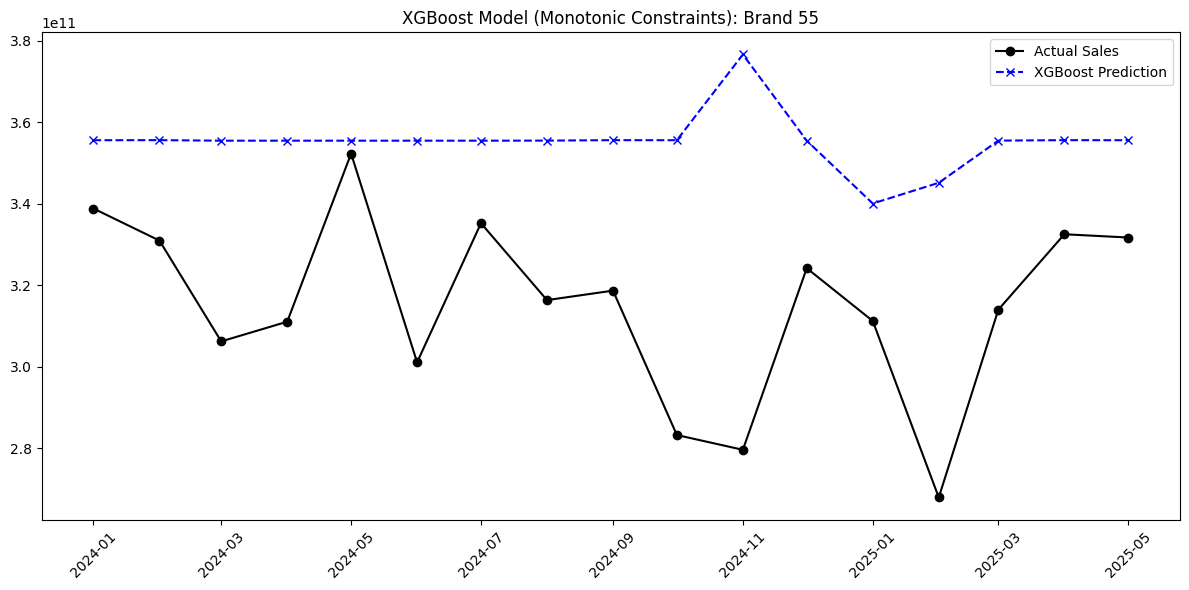

In [ ]:
df_model['Spend on tv_lag6'] = df_model['Spend on tv'].shift(6)
df_model['Spend on meta_lag2'] = df_model['Spend on meta'].shift(2)
df_model.dropna(inplace=True)

# 2. DEFINE FEATURES
target_col = 'Sales'
feature_cols = ['Spend on tv_lag6', 'Spend on meta_lag2']
other_spends = [c for c in df_model.columns if 'Spend' in c 
                and c not in ['Spend on tv', 'Spend on meta', 'Spend on tv_lag6', 'Spend on meta_lag2']]
feature_cols.extend(other_spends)

X = df_model[feature_cols]
y = df_model[target_col]

# 3. TRAIN WITH XGBOOST (Positive Constraints)
# ---------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Create a constraint tuple: (1, 1, ..., 1)
# '1' enforces a positive relationship (Increasing Spend >= Non-decreasing Sales)
# '0' would be no constraint, '-1' would be negative constraint
mono_constraints = "(" + ",".join(['1'] * len(feature_cols)) + ")"

model = xgb.XGBRegressor(
    objective='reg:squarederror',
    monotone_constraints=mono_constraints, 
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

model.fit(X_train, y_train)

# 4. EVALUATE
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)

print(f"XGBoost Performance (Monotonic):")
print(f"R-Squared: {r2:.3f}")
print(f"MAPE: {mape:.1%}")
print("-" * 30)

# Show Drivers (Feature Importance)
# NOTE: XGBoost outputs 'Importance', not direct 'ROI' coefficients.
import_df = pd.DataFrame({
    'Channel': feature_cols,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(import_df)

# 5. VISUALIZE
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Sales', color='black', marker='o')
plt.plot(y_test.index, predictions, label='XGBoost Prediction', color='blue', linestyle='--', marker='x')
plt.title(f'XGBoost Model (Monotonic Constraints): {target_brand}')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [61]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import xgboost as xgb
df_model = df_non_dup[df_non_dup['brand']=='Brand 55'].pivot_table(index='monthyear', columns='variable', values='Amount', aggfunc='sum').fillna(0)
df_model = df_model.sort_index()

# Scale Target (Billions -> Units) for stability
scale_factor = 1_000_000_000
df_model['Sales_Scaled'] = df_model['Sales'] / scale_factor

# FEATURE ENGINEERING
# Lags
df_model['Spend on tv_lag6'] = df_model['Spend on tv'].shift(6)
df_model['Spend on meta_lag2'] = df_model['Spend on meta'].shift(2)

# SEASONALITY (One-Hot Encoding)
# This creates columns like 'Month_2', 'Month_3'... so the model can learn specific monthly effects
df_model['Month'] = df_model.index.month
df_dummies = pd.get_dummies(df_model['Month'], prefix='Month', drop_first=True)
df_model = pd.concat([df_model, df_dummies], axis=1)

df_model.dropna(inplace=True)

# 2. DEFINE FEATURES
target_col = 'Sales_Scaled'

# REMOVE 'ucontent' if it's junk, or keep it but Regularization will kill it later
# We list spend channels explicitly
spend_cols = [
    'Spend on meta', 'Spend on tiktok', 'Spend on tv', 
    'Spend on youtube', 'Spend on tv_lag6', 'Spend on meta_lag2',
    'Spend on ucontent', 'Spend on meta', 'Spend on tv'
]

# Add the seasonal dummy columns (Month_2, Month_3, etc.)
# seasonal_cols = [c for c in df_dummies.columns]
feature_cols = spend_cols 

X = df_model[feature_cols]
y = df_model[target_col]

# 3. TRAIN
# ---------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# CONSTRAINTS
# Spend cols get '1' (Positive constraint)
# Seasonal cols get '0' (No constraint - months can be neg or pos)
constraint_map = {col: 1 if col in spend_cols else 0 for col in feature_cols}
mono_constraints = "(" + ",".join([str(constraint_map[c]) for c in feature_cols]) + ")"

model = xgb.XGBRegressor(
    objective='reg:squarederror',
    monotone_constraints=mono_constraints,
    n_estimators=100,
    learning_rate=0.05,
    max_depth=4,
    
    # REGULARIZATION (The Noise Killer)
    reg_alpha=10,   # L1 Regularization: Forces weak features (like ucontent) to 0
    reg_lambda=1,   # L2 Regularization
    
    random_state=42
)

model.fit(X_train, y_train)

# 4. EVALUATE
# ---------------------------------
predictions = model.predict(X_test)
# Scale back up
y_test_real = y_test * scale_factor
pred_real = predictions * scale_factor

r2 = r2_score(y_test_real, pred_real)
mape = mean_absolute_percentage_error(y_test_real, pred_real)

print(f"XGBoost (Regularized + OneHot Months):")
print(f"R-Squared: {r2:.3f}")
print(f"MAPE: {mape:.1%}")
print("-" * 30)

# Feature Importance
import_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(import_df)

# 5. VISUALIZE
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test_real, label='Actual Sales', color='black', marker='o')
plt.plot(y_test.index, pred_real, label='XGBoost Prediction', color='green', linestyle='--', marker='x')
plt.title('Corrected Model: Regularized to remove noise')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [62]:
X

Spend on meta  Spend on tiktok   Spend on tv  Spend on youtube  \
monthyear                                                                    
2017-07-01   4.795958e+09              0.0  1.193370e+10      0.000000e+00   
2017-08-01   4.353313e+09              0.0  1.072662e+10      0.000000e+00   
2017-09-01   2.665364e+09              0.0  9.832041e+09      1.570795e+09   
2017-10-01   2.896526e+09              0.0  8.124053e+09      1.256636e+09   
2017-11-01   1.118482e+10              0.0  9.548524e+09      3.160832e+09   
...                   ...              ...           ...               ...   
2025-01-01   1.234846e+10              0.0  1.931752e+10      5.526057e+09   
2025-02-01   1.680870e+10              0.0  2.353797e+10      1.469636e+10   
2025-03-01   1.510010e+10              0.0  2.170861e+10      1.144638e+10   
2025-04-01   1.502753e+10              0.0  2.278057e+10      7.428918e+09   
2025-05-01   1.225843e+10              0.0  1.415132e+10      4.581661e+09   

            Spend on tv_lag6  Spend on meta_lag2  Spend on ucontent  \
monthyear                                                             
2017-07-01      3.924506e+09        3.372289e+09                0.0   
2017-08-01      4.072843e+09        4.548680e+09                0.0   
2017-09-01      3.573264e+09        4.795958e+09                0.0   
2017-10-01      5.116979e+09        4.353313e+09                0.0   
2017-11-01      1.392929e+10        2.665364e+09                0.0   
...                      ...                 ...                ...   
2025-01-01      1.070765e+10        1.002786e+10                0.0   
2025-02-01      1.377751e+10        1.104269e+09                0.0   
2025-03-01      2.030226e+10        1.234846e+10                0.0   
2025-04-01      2.239600e+10        1.680870e+10                0.0   
2025-05-01      2.815988e+10        1.510010e+10                0.0   

            Spend on meta   Spend on tv  
monthyear                                
2017-07-01   4.795958e+09  1.193370e+10  
2017-08-01   4.353313e+09  1.072662e+10  
2017-09-01   2.665364e+09  9.832041e+09  
2017-10-01   2.896526e+09  8.124053e+09  
2017-11-01   1.118482e+10  9.548524e+09  
...                   ...           ...  
2025-01-01   1.234846e+10  1.931752e+10  
2025-02-01   1.680870e+10  2.353797e+10  
2025-03-01   1.510010e+10  2.170861e+10  
2025-04-01   1.502753e+10  2.278057e+10  
2025-05-01   1.225843e+10  1.415132e+10  

[95 rows x 9 columns]

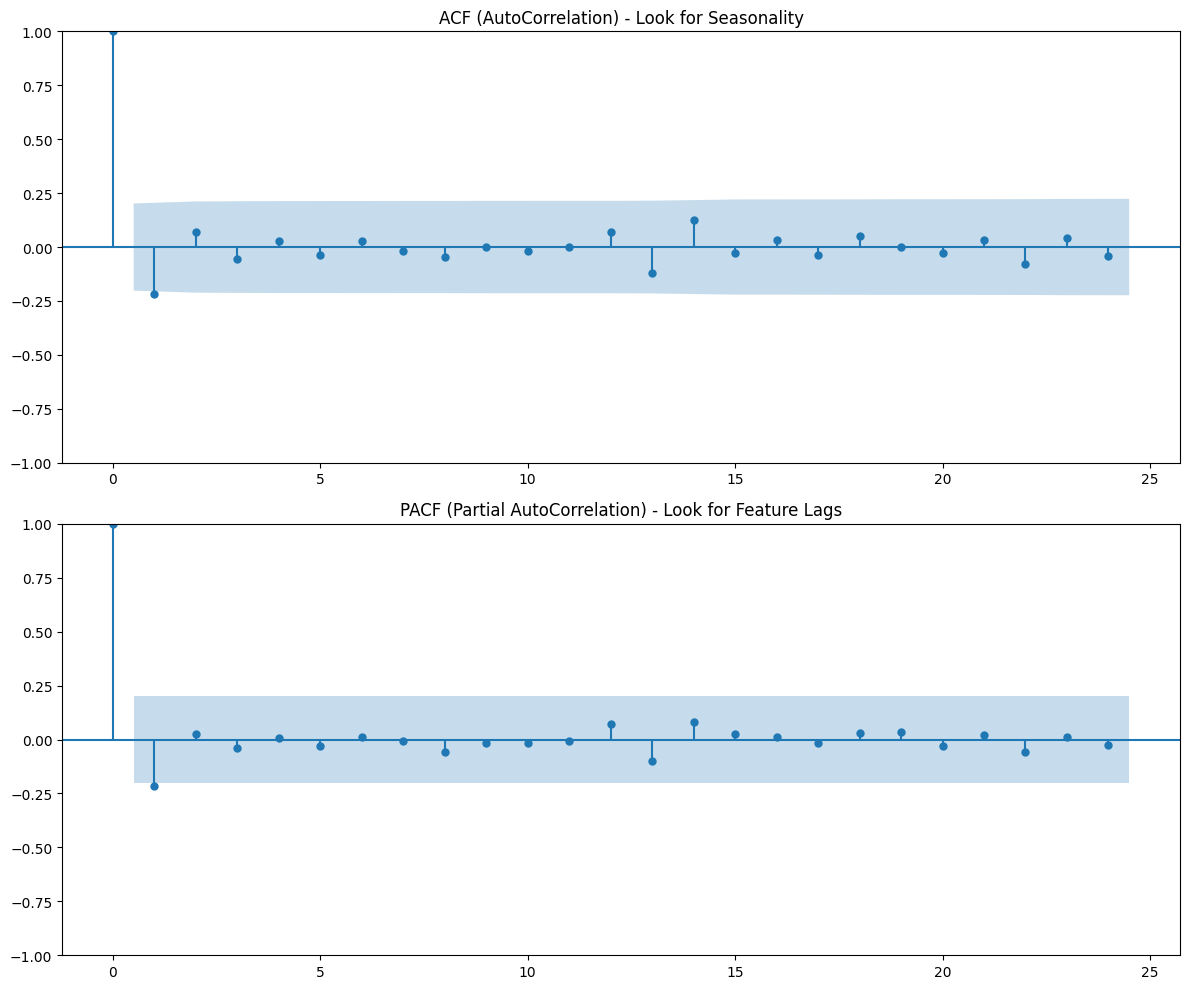

In [188]:
# Ensure data is sorted and we look at the Target (Sales)
ts_data = df_model['Sales'].sort_index()

# 2. MAKE STATIONARY (Difference the data)
# We want to see how "Change in Sales" relates to past changes
# .diff() removes the trend
ts_diff = ts_data.diff().dropna()

# 3. PLOT ACF & PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# ACF: Shows 'Indirect' correlations (Momentum + Seasonality)
sm.graphics.tsa.plot_acf(ts_diff, lags=24, ax=ax1, title='ACF (AutoCorrelation) - Look for Seasonality')

# PACF: Shows 'Direct' correlations (The actual useful lags)
sm.graphics.tsa.plot_pacf(ts_diff, lags=24, ax=ax2, title='PACF (Partial AutoCorrelation) - Look for Feature Lags')

plt.tight_layout()
plt.show()